# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Importing packages

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# importing necessary data

In [99]:
# importing data
data=pd.read_csv('train.csv')

# Exploring data 

In [100]:
# number of rows and columns
print('Number of records: ',data.shape[0])
print()
print('Number of features: ',data.shape[1])

Number of records:  1460

Number of features:  81


In [101]:
# looking at a few records 
data.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
170    171          50       RM          NaN    12358   Pave   NaN      IR1   
260    261          80       RL        120.0    19296   Pave   NaN      Reg   
1337  1338          30       RM        153.0     4118   Pave  Grvl      IR1   
358    359          80       RL         92.0     6930   Pave   NaN      IR1   
876    877          20       RL         94.0    25286   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
170          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
260          Lvl    AllPub  ...        0    NaN  GdWo         NaN       0   
1337         Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
358          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
876          HLS    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
170       5   2007        WD         Normal     128500  
260       5   2009        WD         Normal     176000  
1337      3   2006        WD         Normal      52500  
358       7   2006        WD        Abnorml     130000  
876       1   2007        WD         Normal     132250  

[5 rows x 81 columns]

In [102]:
#using info() to understand the data types of the columns
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> observation
1. There are a total of 1460 enteries with 81 columns
2. Of the 81 columns, 3 are of float type, 35 int type and 43 are object (text) type

In [103]:
# Having a look at the numerical variables
num_cols=data.describe().columns.to_list()
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

> Observation 
1. LotArea appears to be highly skewed.
2. The total rooms above ground is also higly skewed with around 75 % of the houses having less than 7 rooms
3. Almost all of the houses were sold in the 4 years (2006-2010).
4. Sale price has a range of $720100.0

In [104]:
# Looking at object columns
cat_cols=data.describe(include=['O']).columns.to_list()
data.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

> Observation
1. Northwest Ames is the most frequent 
2. Most of the houses are under the zone of Residential Low Density
3. 1 Storied buildings appears to be very popular
4. Almost all houses have heating Gas forced warm air furnace


In [105]:
# CHecking for duplicate rows
data[data.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

Observation : There are no duplicate rows

In [106]:
# Adding new variable
data['Age']=data['YrSold']-data['YearBuilt']

In [107]:
# understanding the number of unique values in each column
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [108]:
#looking at only numerical cols, if they are categorical in nature
data[num_cols].nunique()

Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        97
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

In [109]:
# segregating columns according to data

num_cols_but_categorical=['MSSubClass']
num_discrete_cols=['id','OverallQual','OverallCond',
                   'BsmtFullBath','BsmtHalfBath',
                   'FullBath','HalfBath','BedroomAbvGr',
                   'KitchenAbvGr','TotRmsAbvGrd',
                   'Fireplaces','GarageCars','MoSold']
num_cont_cols=['LotFrontage','LotArea','YearBuilt',
               'YearRemodAdd','MasVnrArea','BsmtFinSF1',
               'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
               '1stFlrSF','2ndFlrSF','LowQualFinSF',
               'GrLivArea','GarageYrBlt','GarageArea',
               'WoodDeckSF','OpenPorchSF','OpenPorchSF',
               'EnclosedPorch','3SsnPorch','ScreenPorch',
               'PoolArea','MiscVal','YrSold','SalePrice','Age']
cat_cols=['MSZoning', 'Street', 'Alley', 'LotShape',
 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
 'SaleType', 'SaleCondition', 'MSSubClass']


In [110]:
# We found MSSubClass to be categorical but already encoded, hence we add it to  the list of categorical type
cat_cols.extend(num_cols_but_categorical)

In [111]:
# We drop id from numerical cols as it does not help in our analysis
num_discrete_cols.remove('id')

# Checking for missing values

Before checking for missing values, we need to understand the data first. On going through the data dictionary, we can see that for certain columns, NA is not "unavailable or missing" but rather carries some meaning to it

In [112]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [113]:
# hence we impute proper variables to such columns 
data['Alley'].fillna('No alley access',inplace=True)
data['BsmtQual'].fillna('No Basement',inplace=True)
data['BsmtCond'].fillna('No Basement',inplace=True)
data['BsmtExposure'].fillna('No Basement',inplace=True)
data['BsmtFinType1'].fillna('No Basement',inplace=True)
data['BsmtFinType2'].fillna('No Basement',inplace=True)
data['FireplaceQu'].fillna('No Fireplace',inplace=True)
data['GarageType'].fillna('No Garage',inplace=True)
data['GarageFinish'].fillna('No Garage',inplace=True)
data['GarageQual'].fillna('No Garage',inplace=True)
data['GarageCond'].fillna('No Garage',inplace=True)
data['PoolQC'].fillna('No Pool',inplace=True)
data['Fence'].fillna('No Fence',inplace=True)
data['MiscFeature'].fillna('No Extra feature',inplace=True)

In [114]:
#Dropping rows with more than 70% values missing. 81 * 0.70 = 57 variables
data.dropna(axis=0,how='any',thresh=57,inplace=True)

In [115]:
# percentage of missing data
100*(data.isna().sum().sort_values(ascending=False).head(10))/len(data)
#only top 10 are displayed as there are a large number of columns

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
KitchenQual     0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
dtype: float64

In [116]:
data[(data['GarageType']=='No Garage')]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
39      40          90       RL         65.0     6040   Pave  No alley access   
48      49         190       RM         33.0     4456   Pave  No alley access   
78      79          90       RL         72.0    10778   Pave  No alley access   
88      89          50  C (all)        105.0     8470   Pave  No alley access   
89      90          20       RL         60.0     8070   Pave  No alley access   
99     100          20       RL         77.0     9320   Pave  No alley access   
108    109          50       RM         85.0     8500   Pave  No alley access   
125    126         190       RM         60.0     6780   Pave  No alley access   
127    128          45       RM         55.0     4388   Pave  No alley access   
140    141          20       RL         70.0    10500   Pave  No alley access   
148    149          20       RL         63.0     7500   Pave  No alley access   
155    156          50       RL         60.0     9600   Pave  No alley access   
163    164          45       RL         55.0     5500   Pave  No alley access   
165    166         190       RL         62.0    10106   Pave  No alley access   
198    199          75       RM         92.0     5520   Pave  No alley access   
210    211          30       RL         67.0     5604   Pave  No alley access   
241    242          30       RM         40.0     3880   Pave  No alley access   
250    251          30       RL         55.0     5350   Pave  No alley access   
287    288          20       RL          NaN     8125   Pave  No alley access   
291    292         190       RL         55.0     5687   Pave             Grvl   
307    308          50       RM          NaN     7920   Pave             Grvl   
375    376          30       RL          NaN    10020   Pave  No alley access   
386    387          50       RL         58.0     8410   Pave  No alley access   
393    394          30       RL          NaN     7446   Pave  No alley access   
431    432          50       RM         60.0     5586   Pave  No alley access   
434    435         180       RM         21.0     1890   Pave  No alley access   
441    442          90       RL         92.0    12108   Pave  No alley access   
464    465          20       RL         60.0     8430   Pave  No alley access   
495    496          30  C (all)         60.0     7879   Pave  No alley access   
520    521         190       RL         60.0    10800   Pave             Grvl   
528    529          30       RL         58.0     9098   Pave  No alley access   
533    534          20       RL         50.0     5000   Pave  No alley access   
535    536         190       RL         70.0     7000   Pave  No alley access   
562    563          30       RL         63.0    13907   Pave  No alley access   
582    583          90       RL         81.0    11841   Grvl  No alley access   
613    614          20       RL         70.0     8402   Pave  No alley access   
614    615         180       RM         21.0     1491   Pave  No alley access   
620    621          30       RL         45.0     8248   Pave             Grvl   
635    636         190       RH         60.0    10896   Pave             Pave   
636    637          30       RM         51.0     6120   Pave  No alley access   
638    639          30       RL         67.0     8777   Pave  No alley access   
649    650         180       RM         21.0     1936   Pave  No alley access   
705    706         190       RM         70.0     5600   Pave  No alley access   
710    711          30       RL         56.0     4130   Pave  No alley access   
738    739          90       RL         60.0    10800   Pave  No alley access   
750    751          50       RM         55.0     8800   Pave             Grvl   
784    785          75       RM         35.0     6300   Pave             Grvl   
826    827          45       RM         50.0     6130   Pave  No alley access   
843    844          90       RL        

> Observation
It can be seen that wherever the garage type is "no basement", the garage year built is also missing. As the values are not missing in random. we choose to impute the year built itself as the garage year built

In [117]:
year_built_no_garage=data['YearBuilt'][data['GarageYrBlt'].isna()==True]
data['GarageYrBlt'].fillna(year_built_no_garage,inplace=True)

In [118]:
# It is observed that the data for masvnrtype, masvnrarea and electrical is missing at random. 
#Hence they are imputed with either median or mode as suitable
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0],inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(),inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)



In [119]:
# percentage of missing data
100*(data.isna().sum().sort_values(ascending=False).head(10))/len(data)
#only top 10 are displayed as there are a large number of columns

LotFrontage     17.739726
Id               0.000000
KitchenAbvGr     0.000000
GarageFinish     0.000000
GarageYrBlt      0.000000
GarageType       0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
dtype: float64

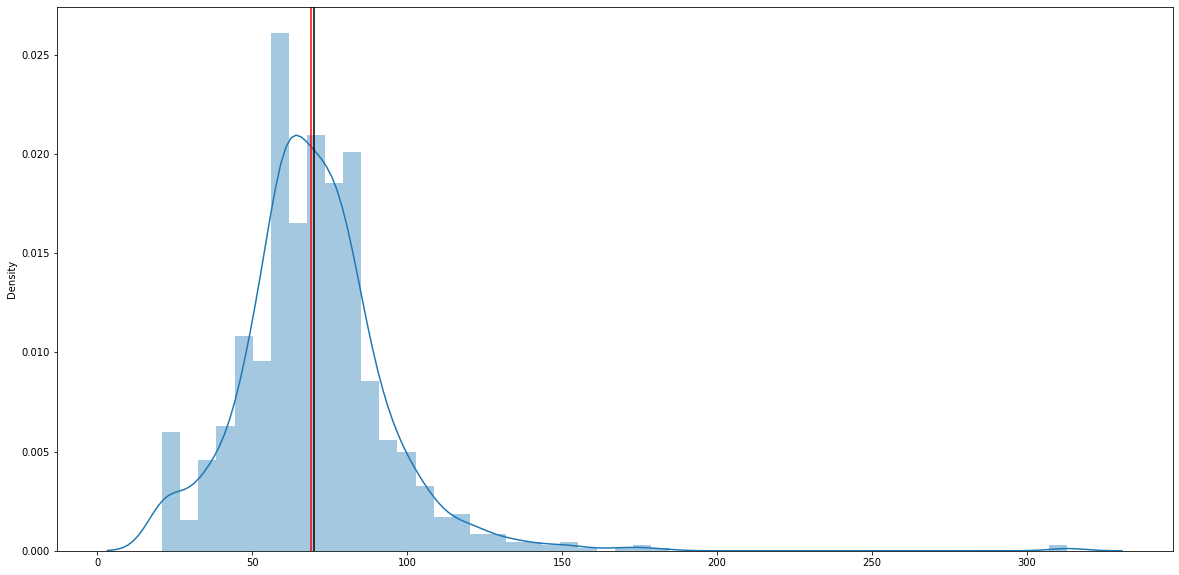

Skewness 2.163569142324884
Kurtosis 17.452867259818404


In [120]:
plt.figure(figsize=(20,10))
sns.distplot(x=data['LotFrontage'])
plt.axvline(data['LotFrontage'].mean(),c='black')
plt.axvline(data['LotFrontage'].median(),c='red')
plt.show()

from scipy import stats
print("Skewness",data['LotFrontage'].skew())
print("Kurtosis",data['LotFrontage'].kurt())

> Observation 
It can be seen that the variable lotfrontage area is positively skewed. Hence we impute the median instead of mean

In [121]:
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

In [122]:
# percentage of missing data
100*(data.isna().sum().sort_values(ascending=False).head(10))/len(data)
#only top 10 are displayed as there are a large number of columns

Id              0.0
GarageCars      0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
dtype: float64

> Observation
It can be seen that all the missing values have been dealt with

# Performing EDA

**NOTE**

All the important graphs are plotted in the next section and infered

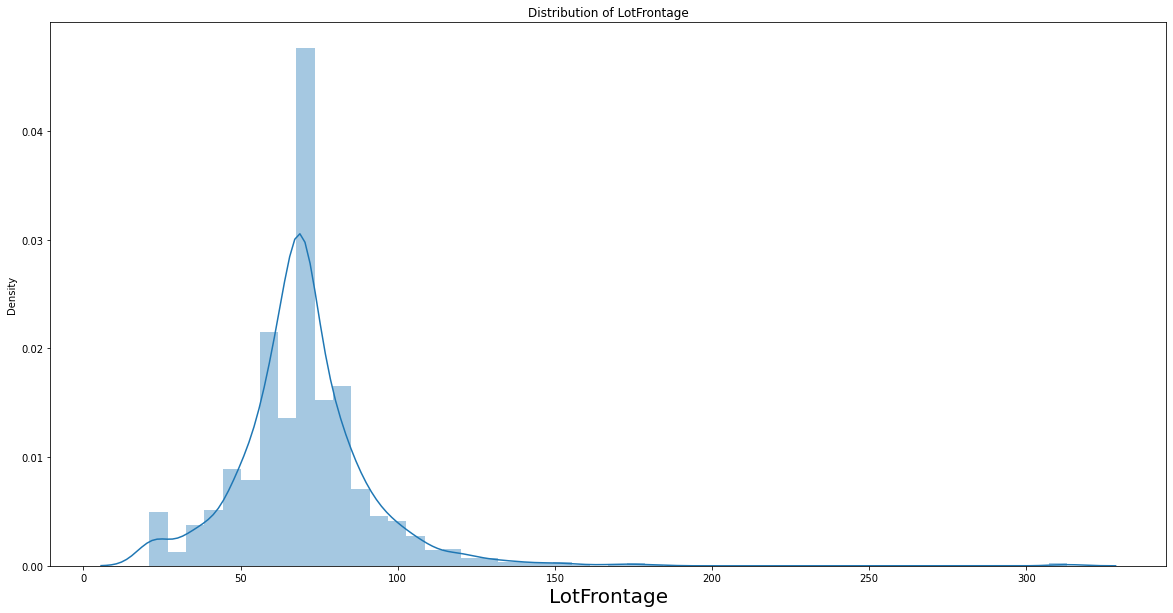

Skewness 2.4091466665496006
Kurtosis 21.91295419680548


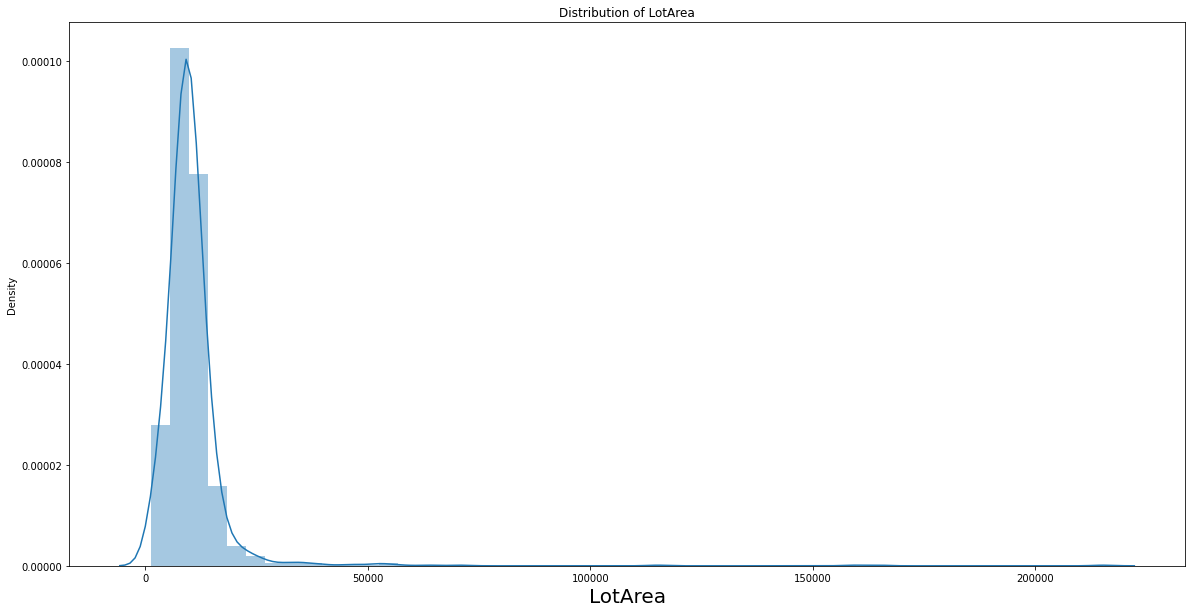

Skewness 12.207687851233496
Kurtosis 203.24327101886033


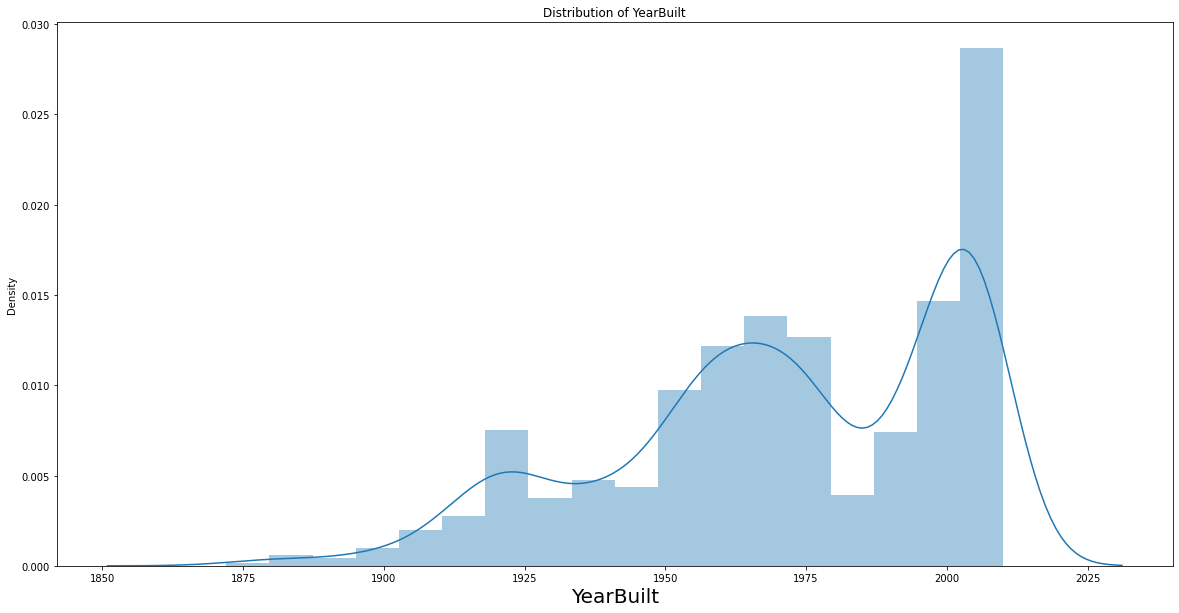

Skewness -0.613461172488183
Kurtosis -0.43955194159361977


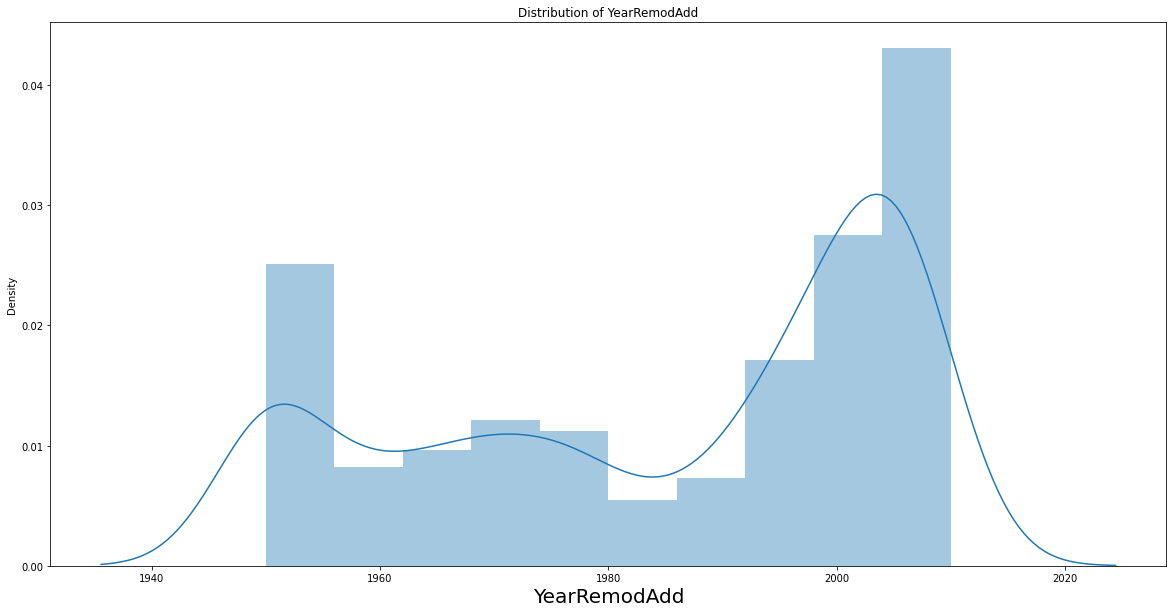

Skewness -0.5035620027004709
Kurtosis -1.2722451924732956


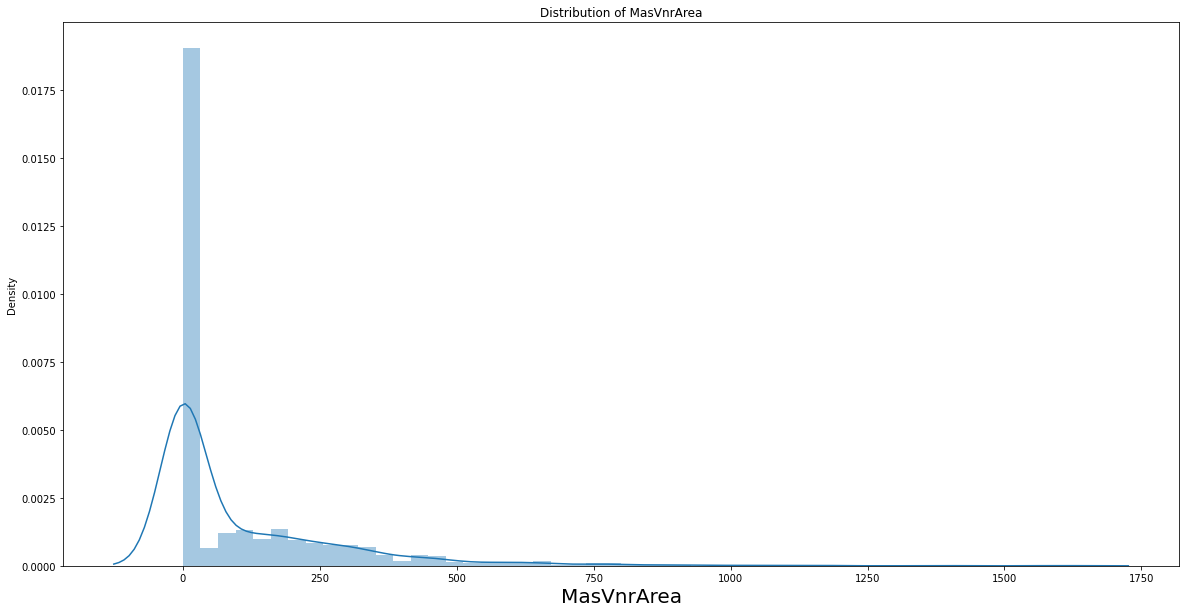

Skewness 2.6776164510820997
Kurtosis 10.141416177298794


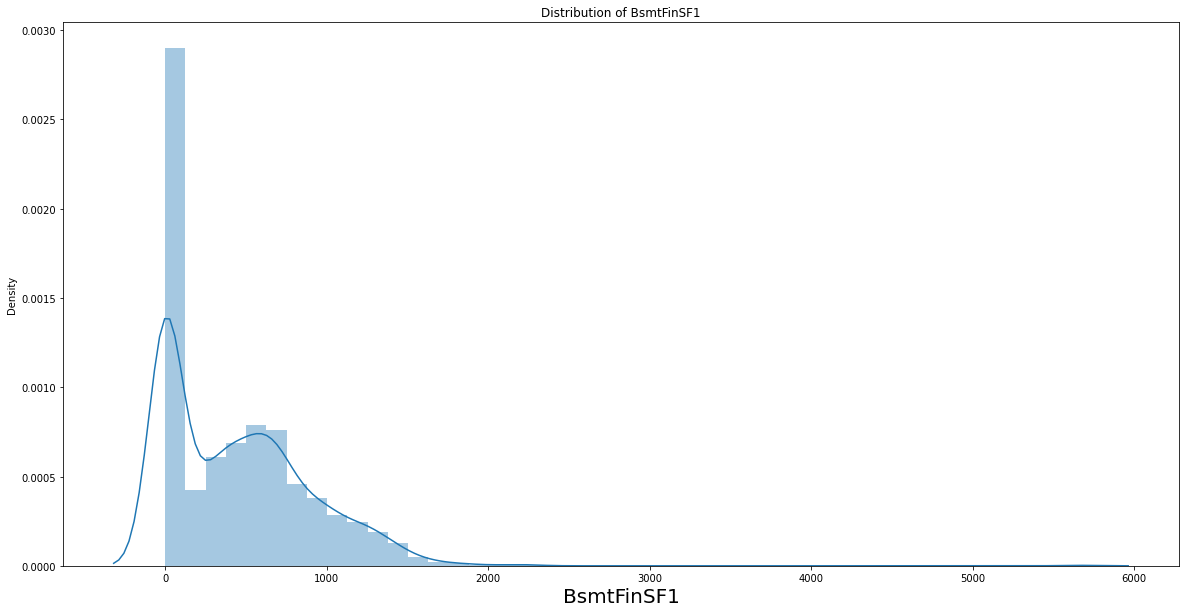

Skewness 1.685503071910789
Kurtosis 11.118236291964712


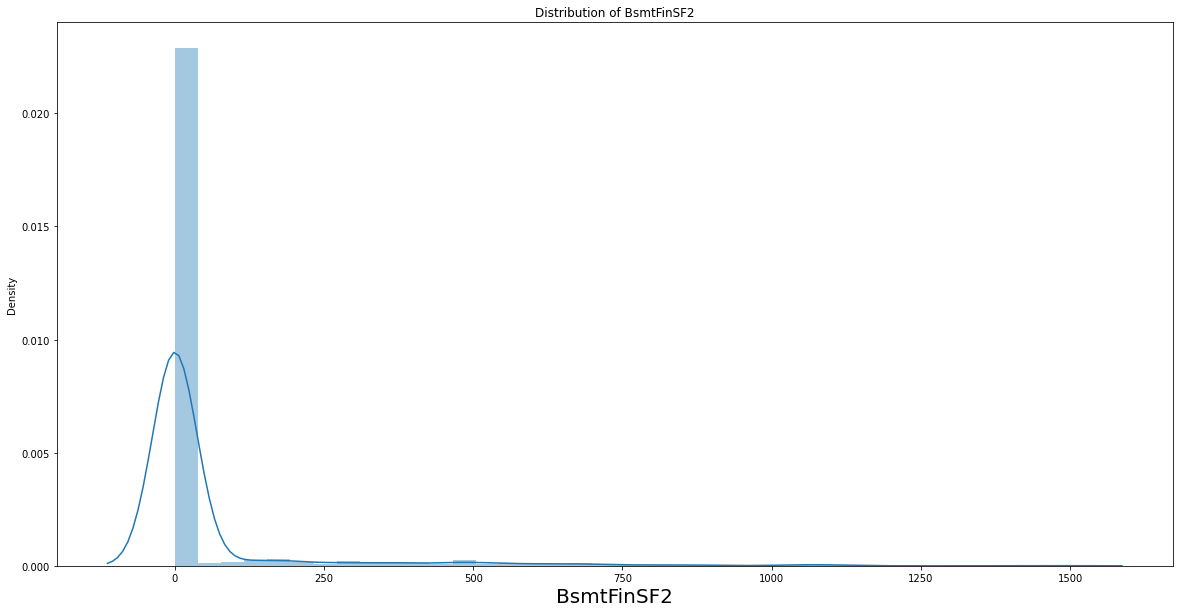

Skewness 4.255261108933303
Kurtosis 20.11333754558646


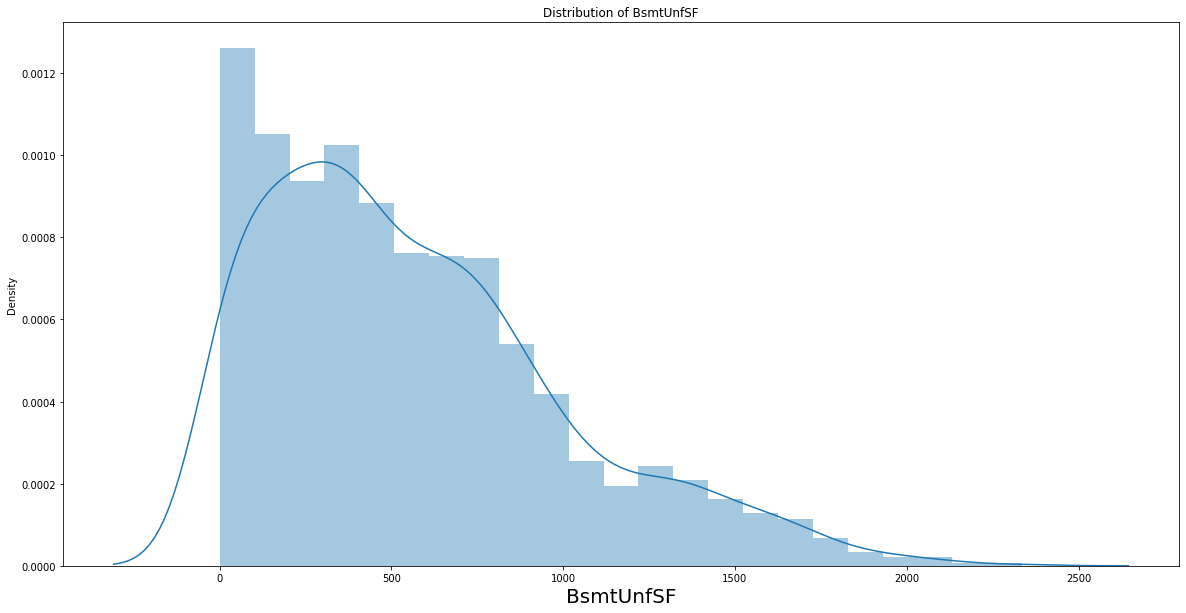

Skewness 0.9202684528039037
Kurtosis 0.47499398780908475


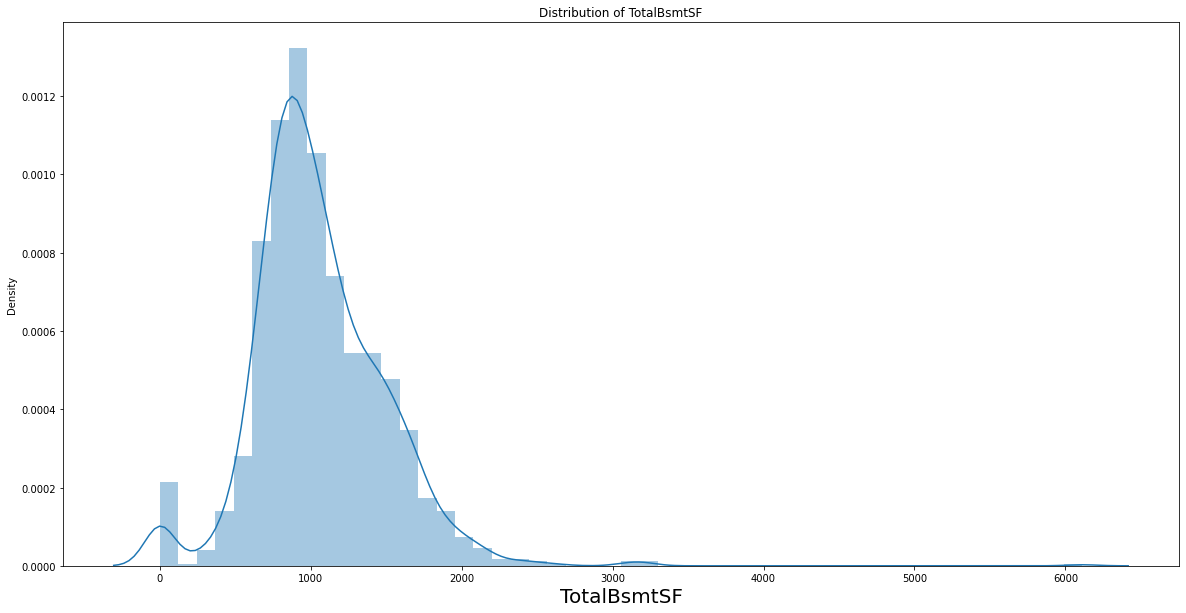

Skewness 1.5242545490627664
Kurtosis 13.250483281984796


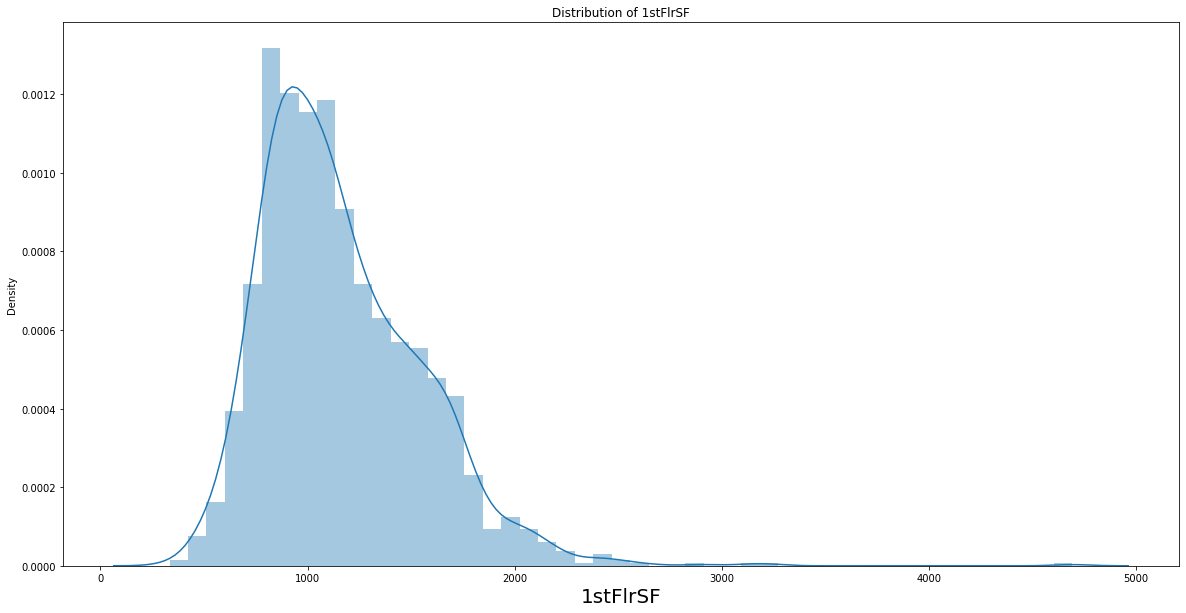

Skewness 1.3767566220336365
Kurtosis 5.74584148244079


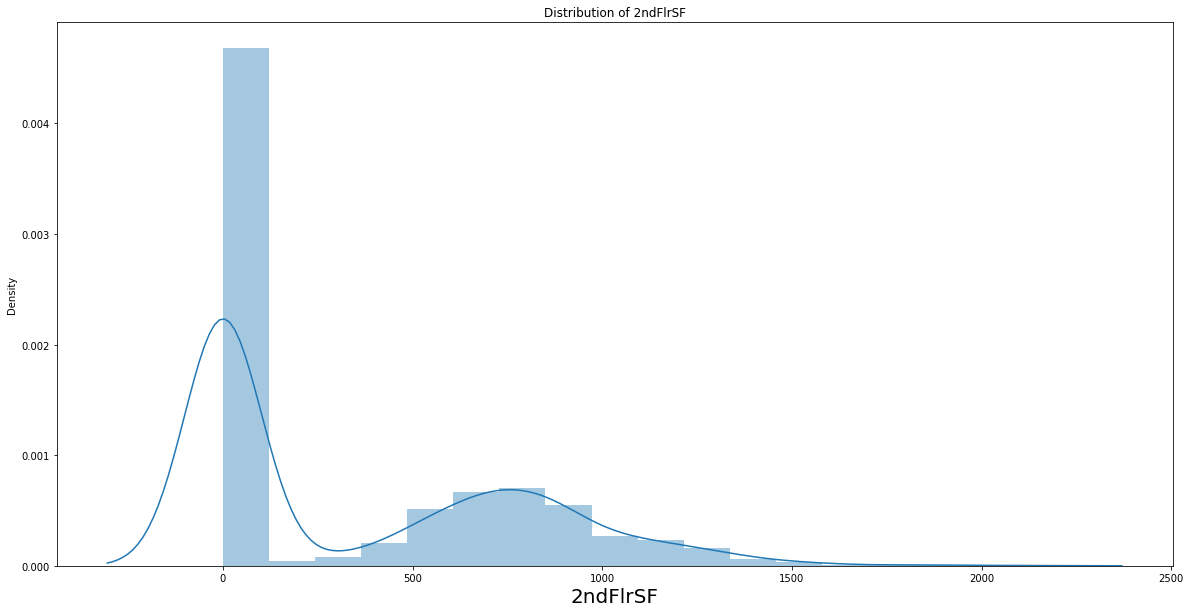

Skewness 0.8130298163023265
Kurtosis -0.5534635576075795


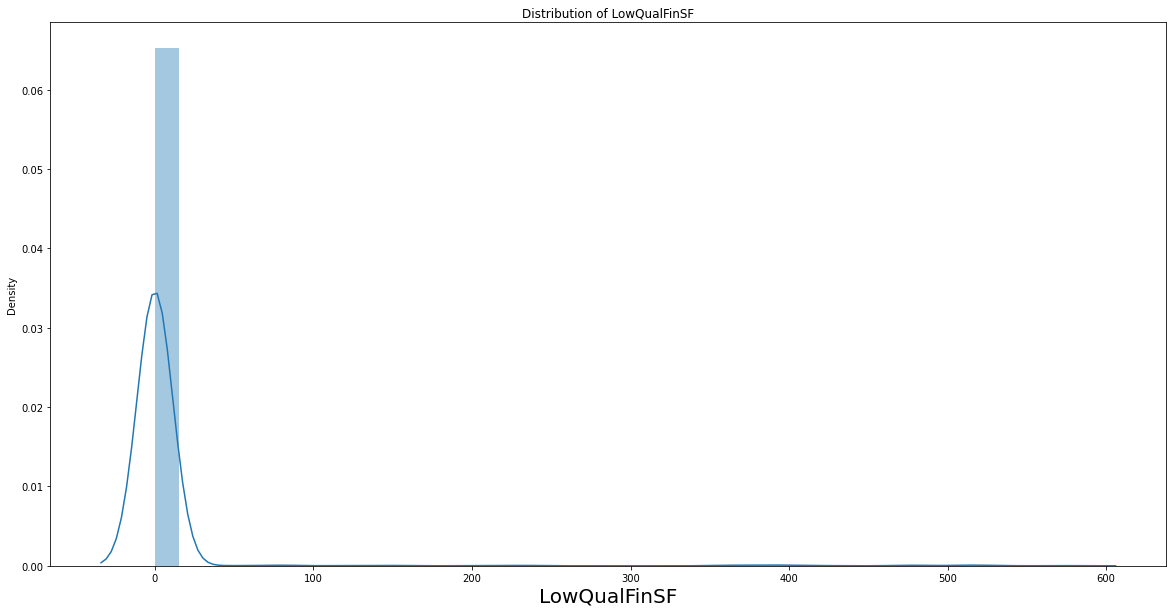

Skewness 9.011341288465387
Kurtosis 83.2348166744174


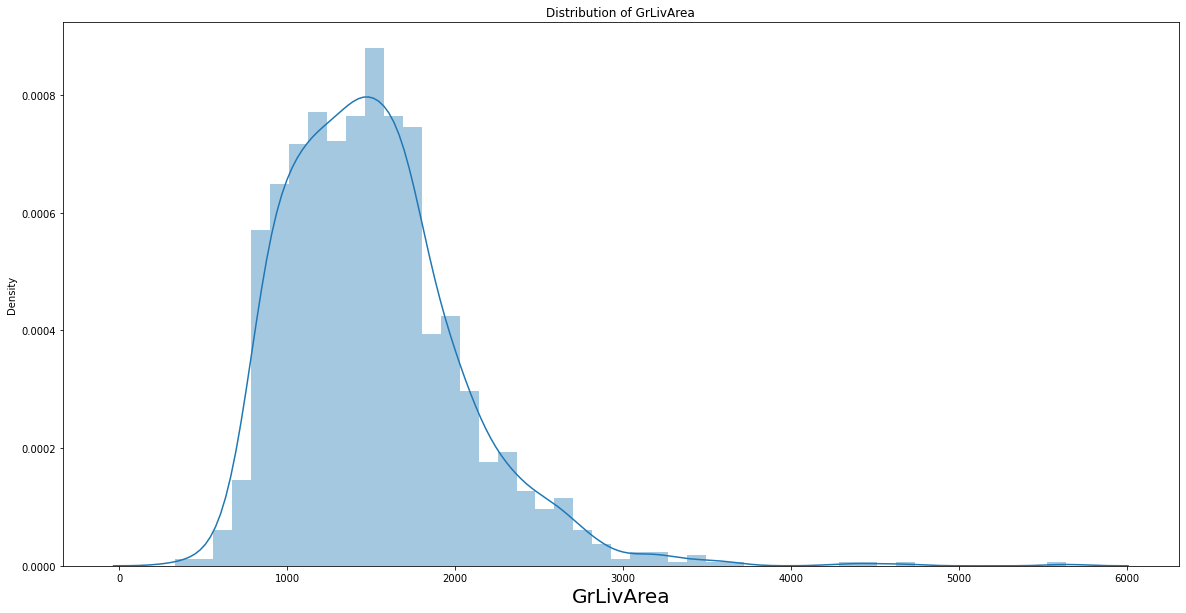

Skewness 1.3665603560164552
Kurtosis 4.895120580693174


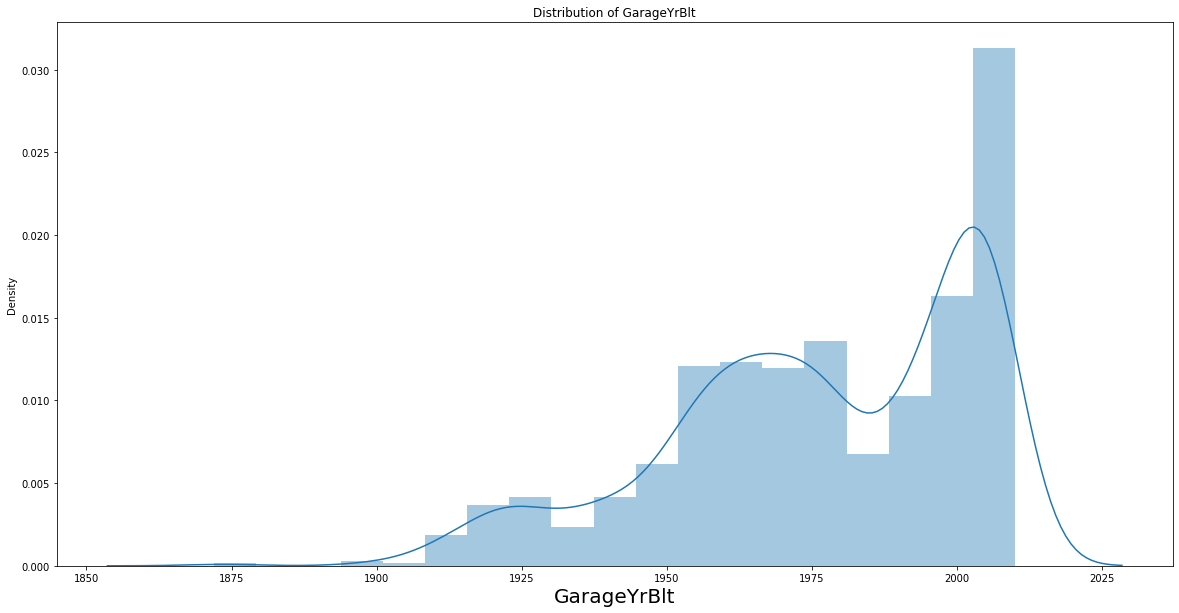

Skewness -0.6943289665837774
Kurtosis -0.22963823155496277


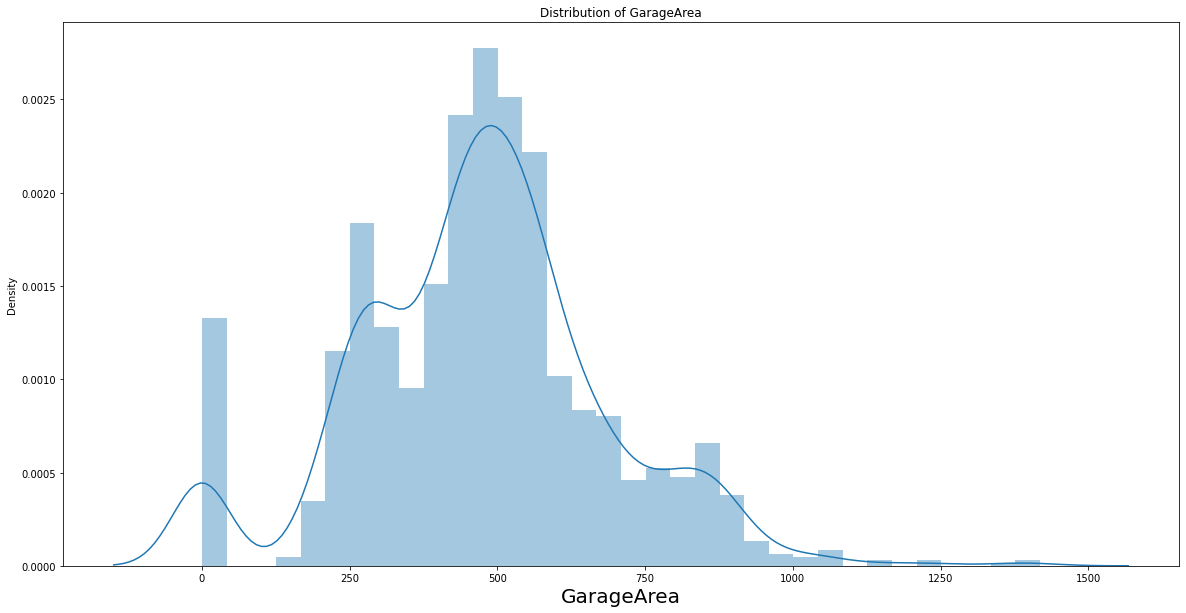

Skewness 0.17998090674623907
Kurtosis 0.9170672022708684


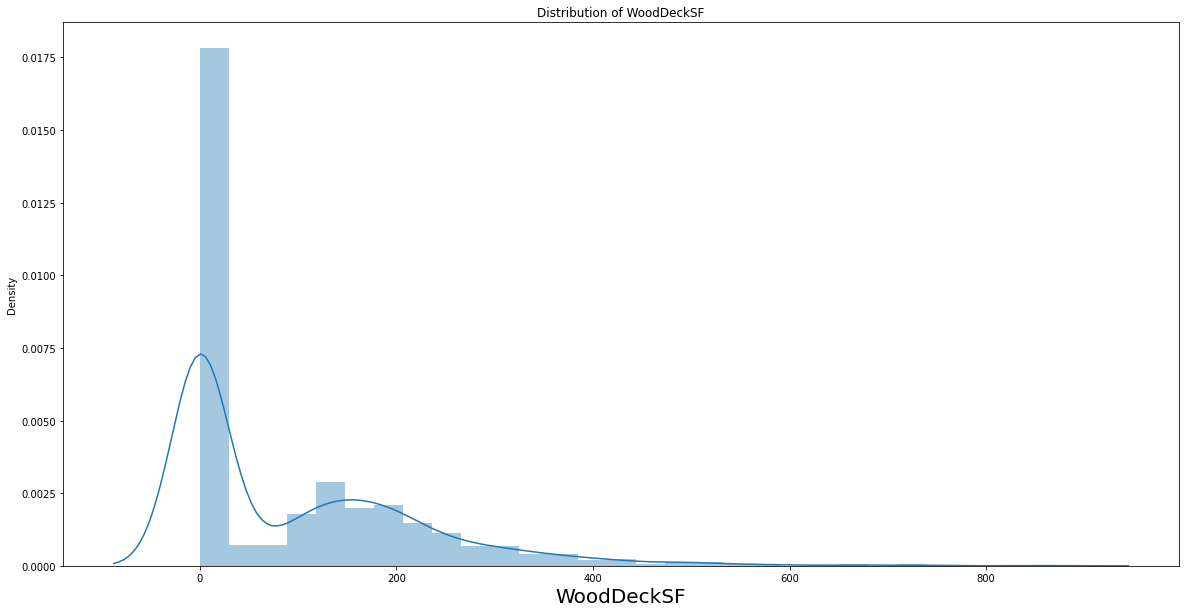

Skewness 1.5413757571931312
Kurtosis 2.992950924703908


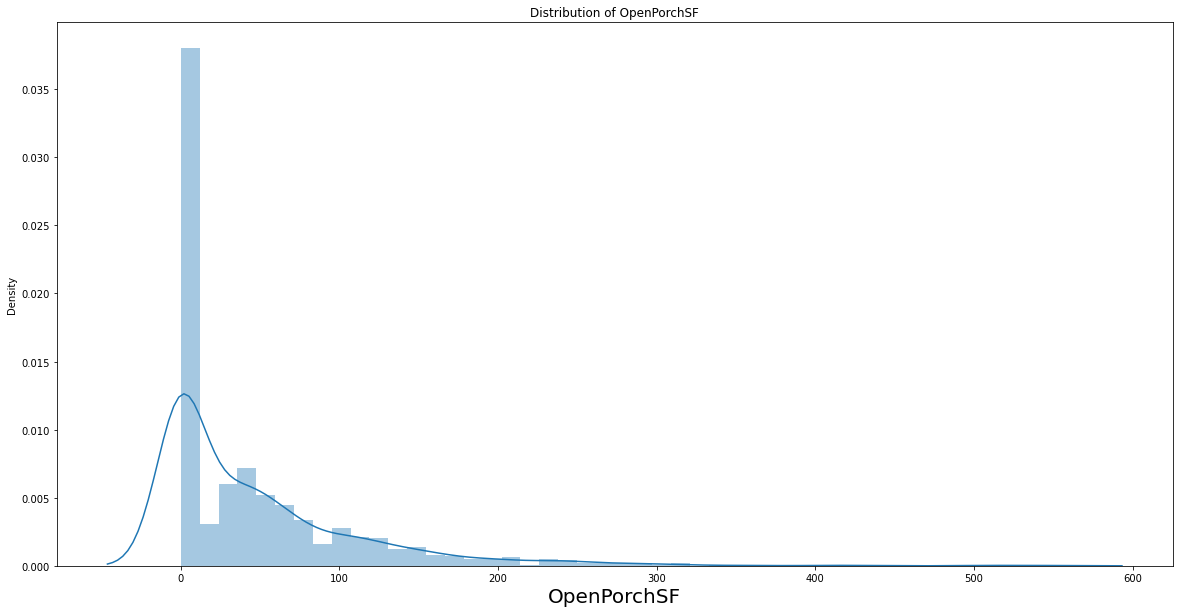

Skewness 2.3643417403694404
Kurtosis 8.490335805910506


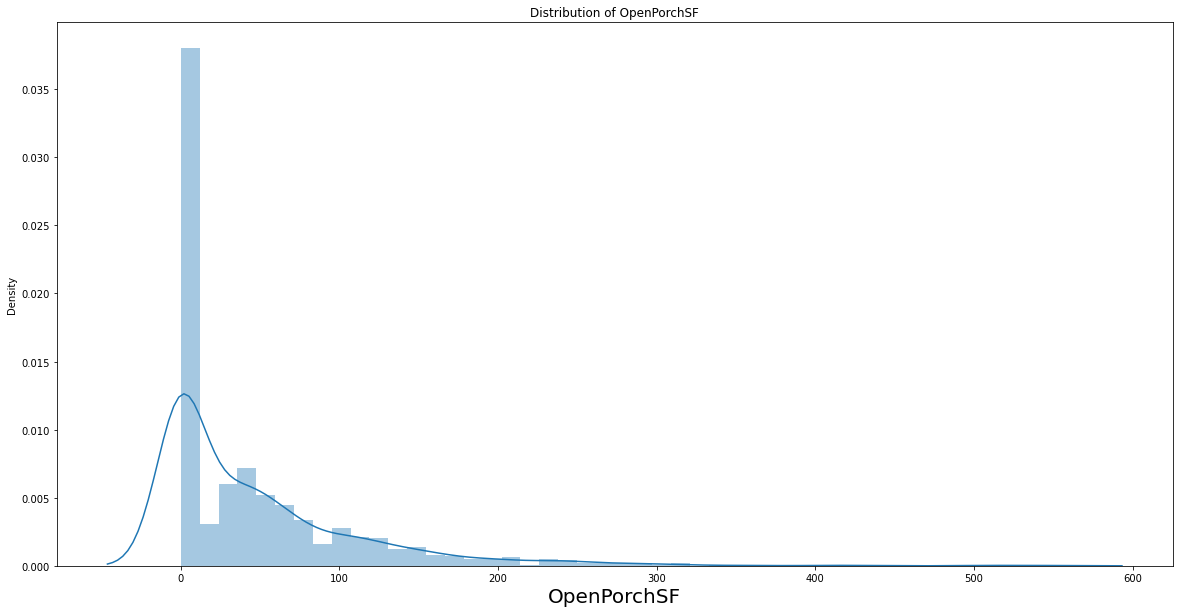

Skewness 2.3643417403694404
Kurtosis 8.490335805910506


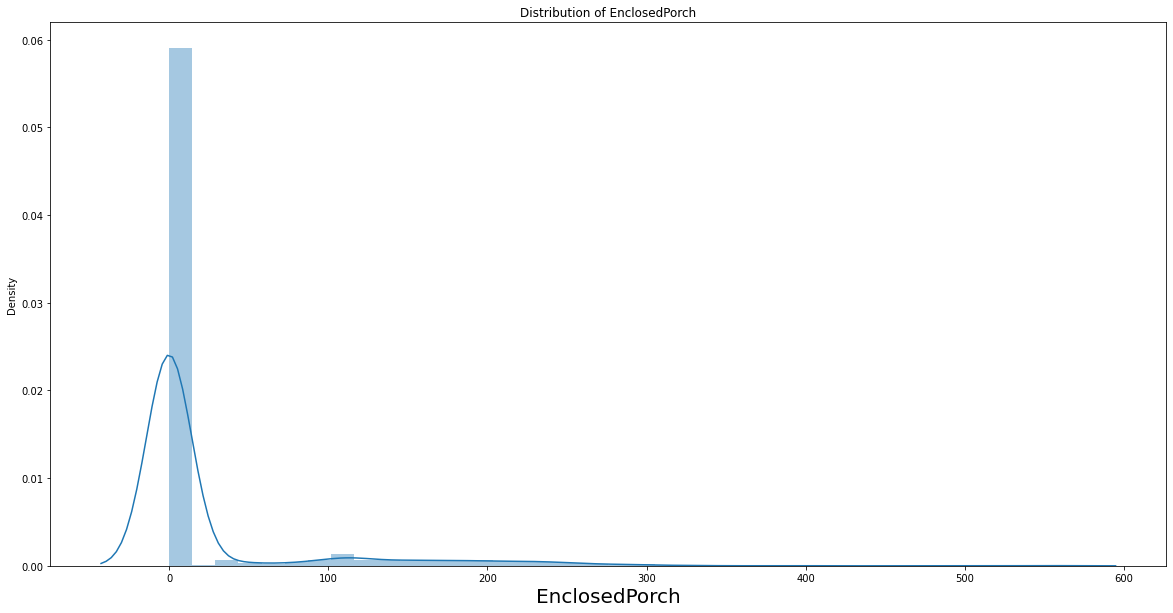

Skewness 3.08987190371177
Kurtosis 10.430765944030428


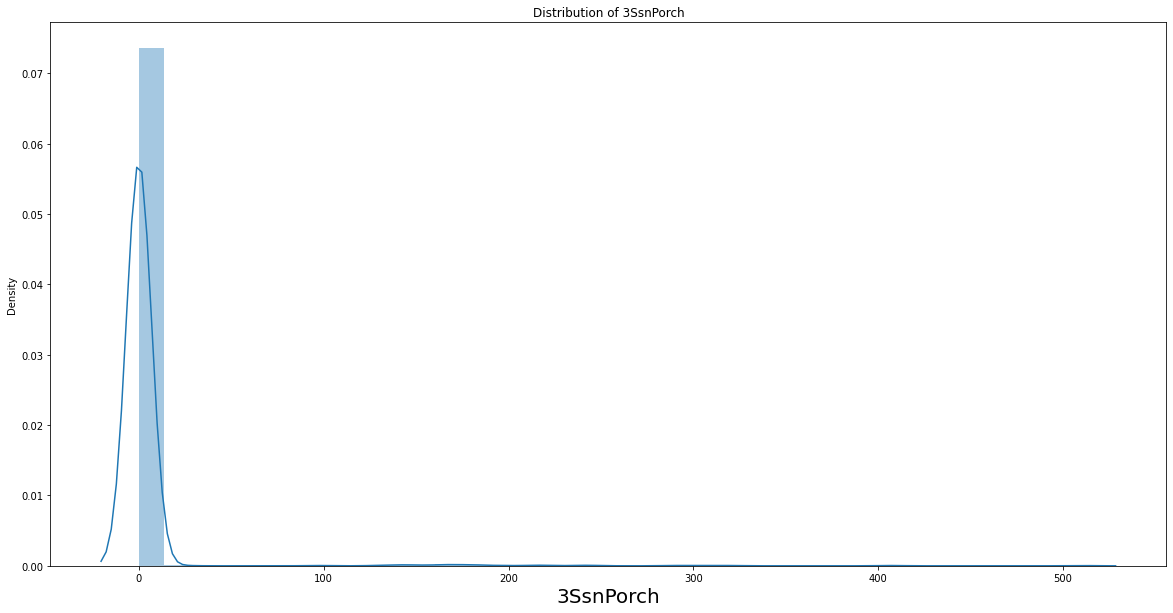

Skewness 10.304342032693112
Kurtosis 123.66237944970538


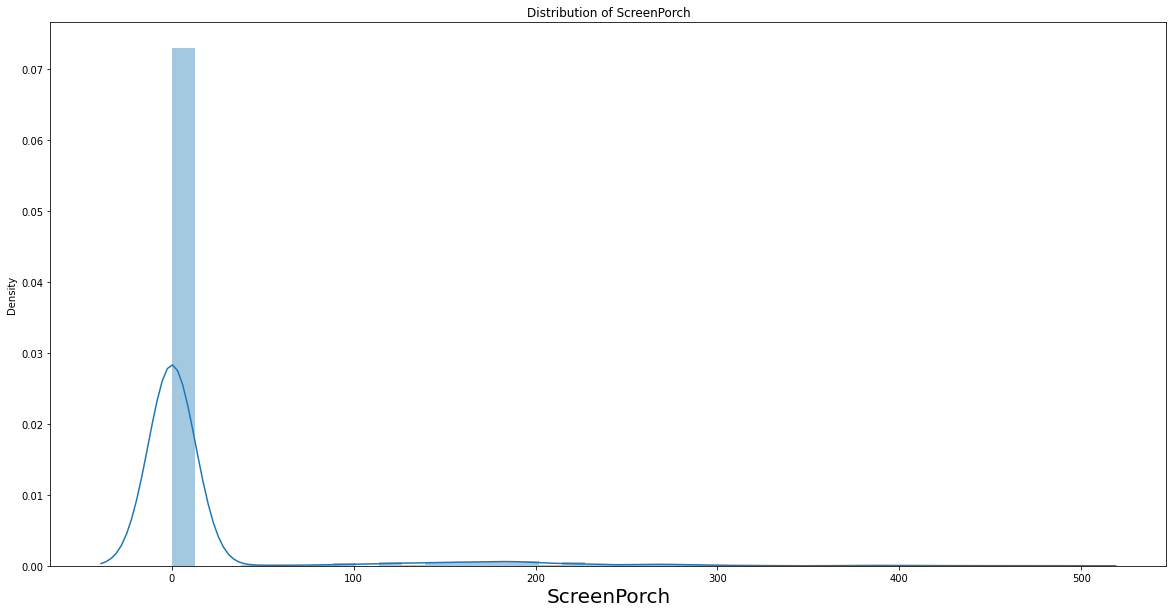

Skewness 4.122213743143115
Kurtosis 18.43906784486968


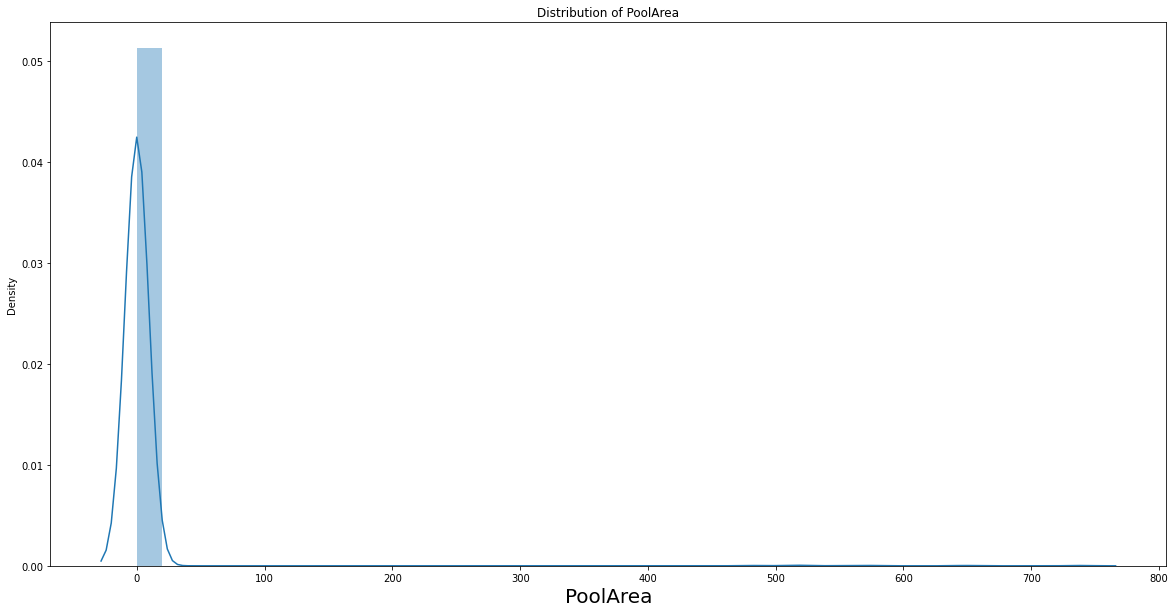

Skewness 14.828373640750588
Kurtosis 223.2684989181717


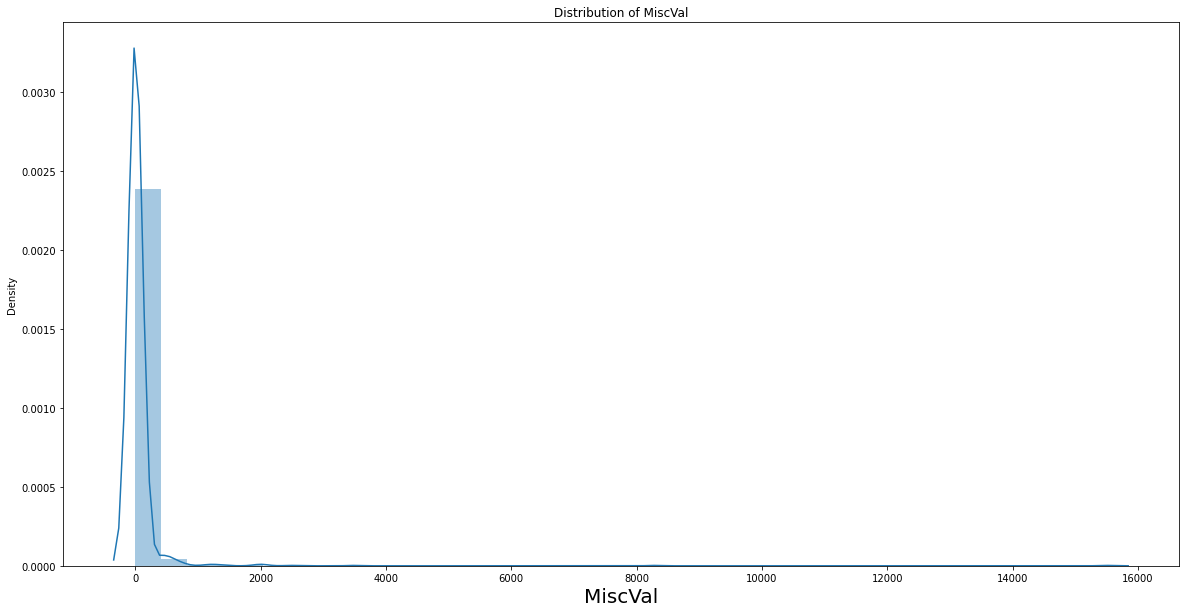

Skewness 24.476794188821916
Kurtosis 701.0033422801193


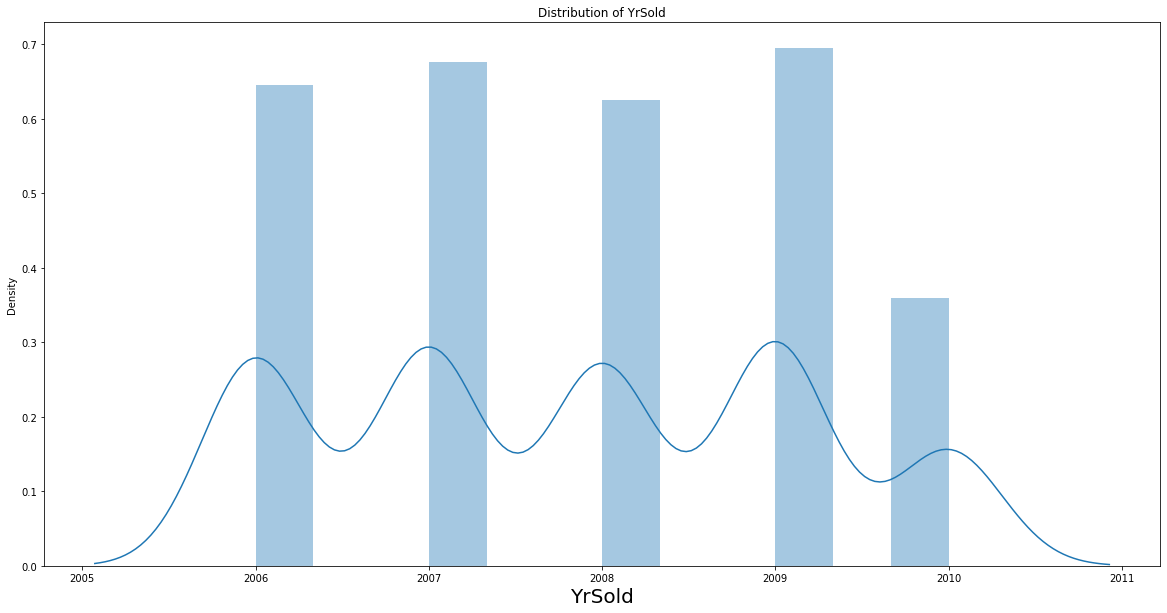

Skewness 0.09626851386568028
Kurtosis -1.1906005711948109


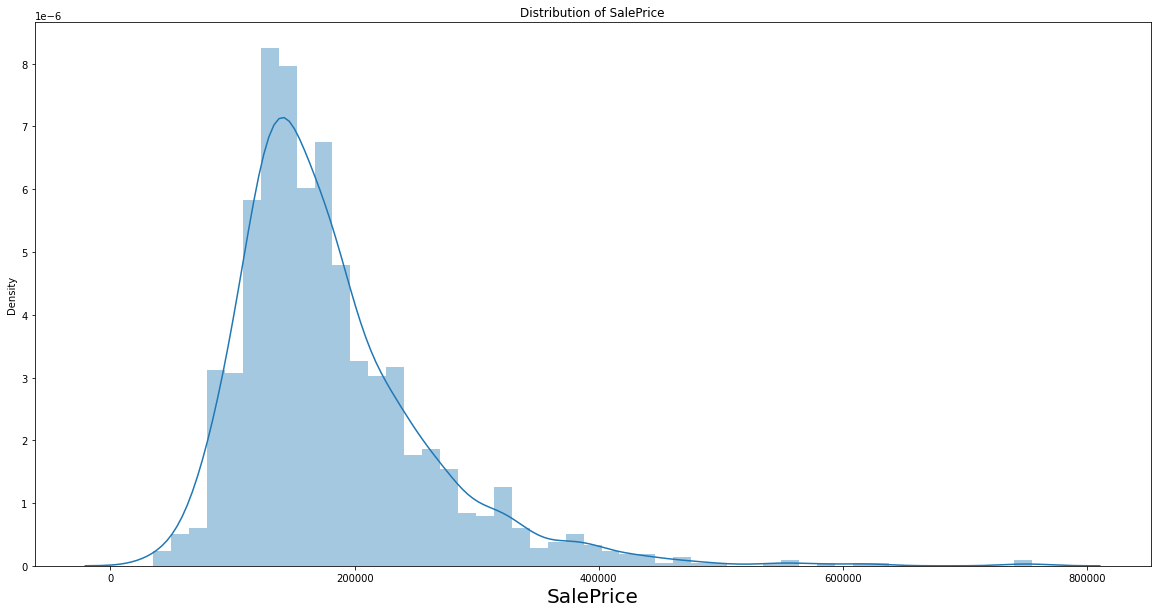

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


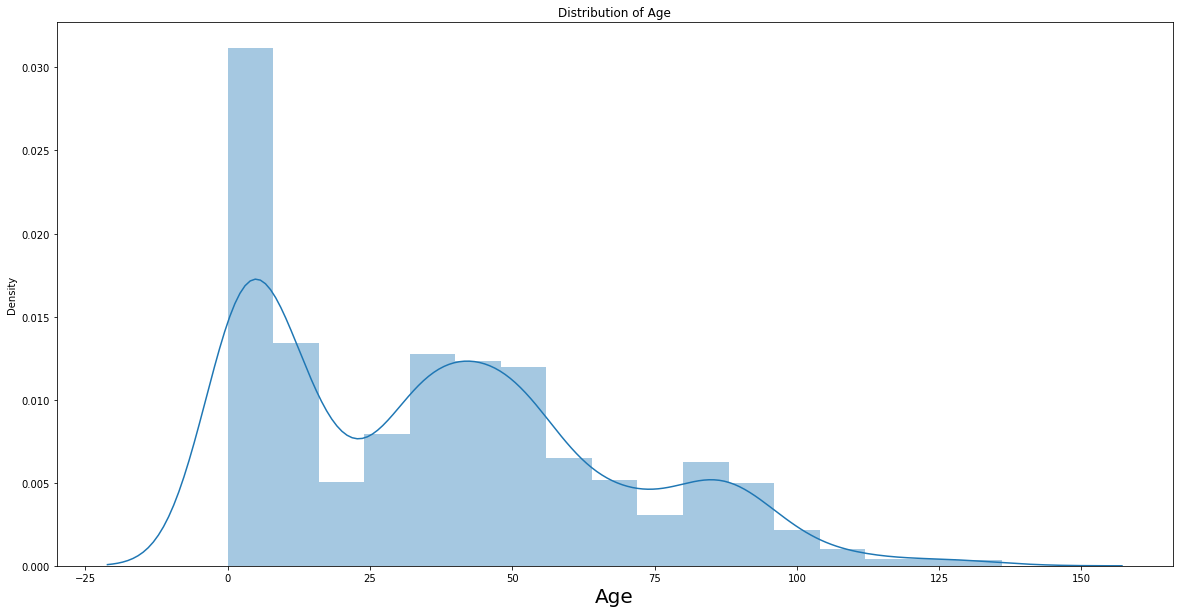

Skewness 0.609030229450241
Kurtosis -0.43682934062758916


In [123]:
# The following code was used to viualise all the columns and identify important patterns. 


for col in num_cont_cols:
    plt.figure(figsize=(20,10))
    sns.distplot(x=data[col])
    plt.xlabel(col,fontsize=20)
    plt.title('Distribution of {}'.format(col))
    plt.show()
    print("Skewness",data[col].skew())
    print("Kurtosis",data[col].kurt())


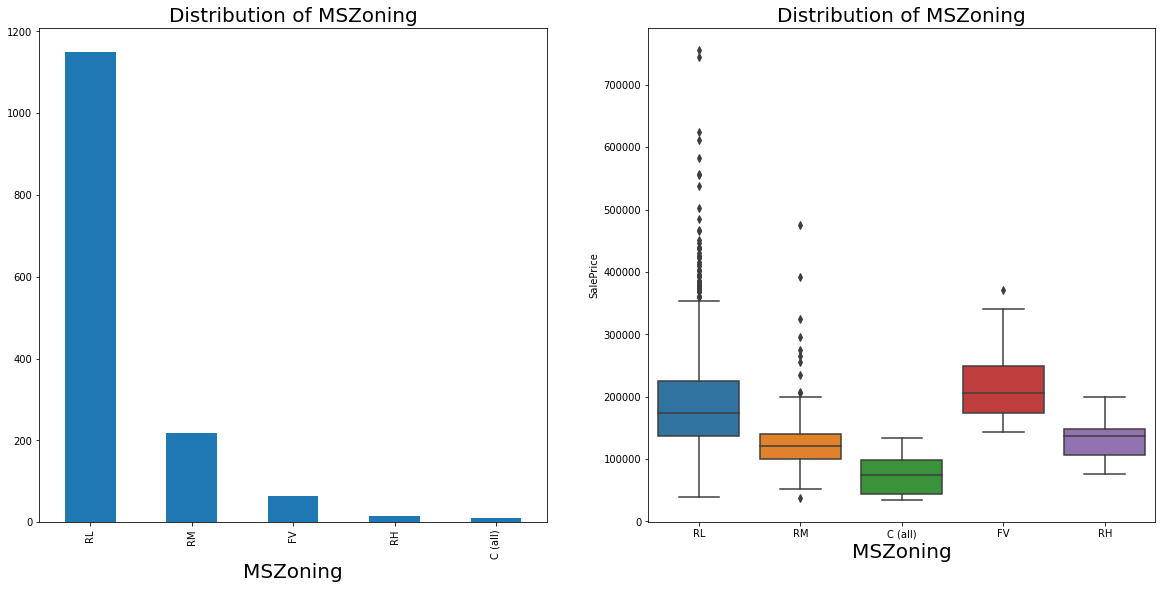

116


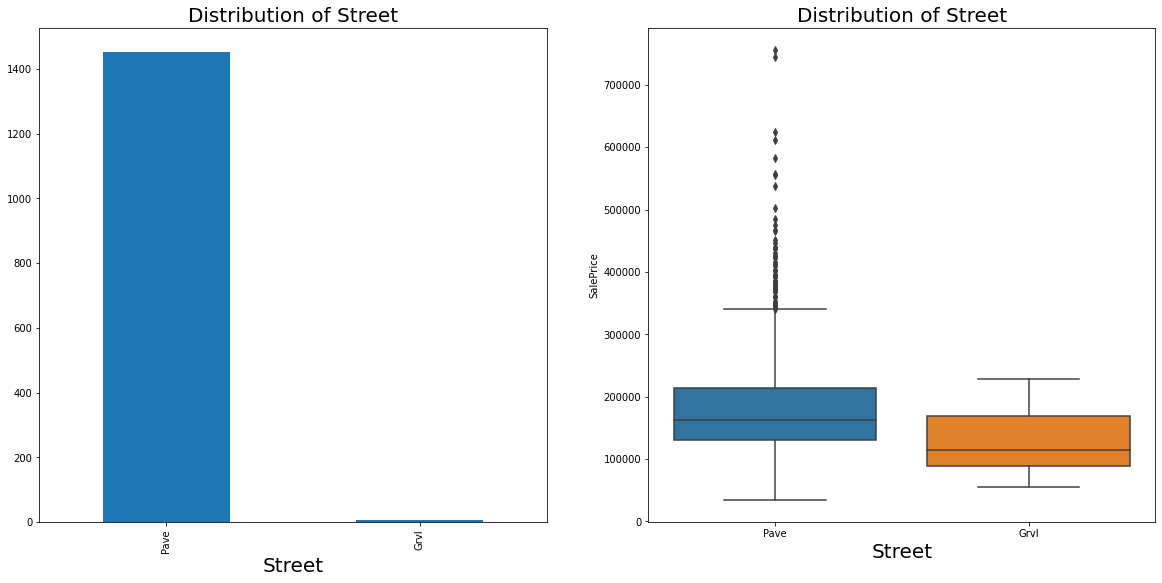

116


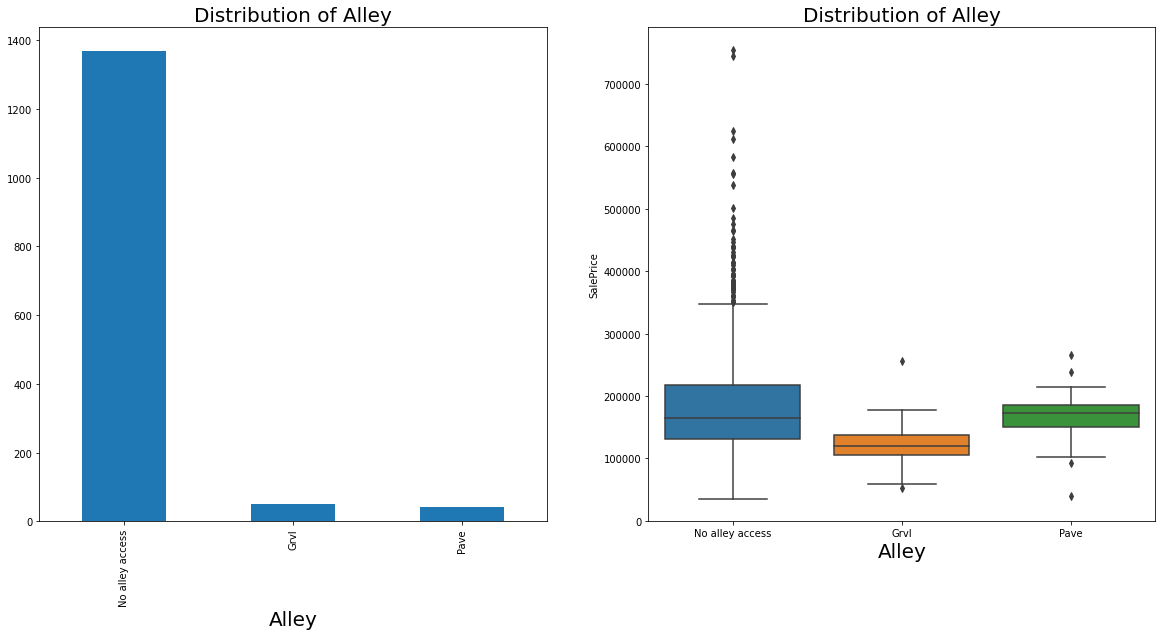

116


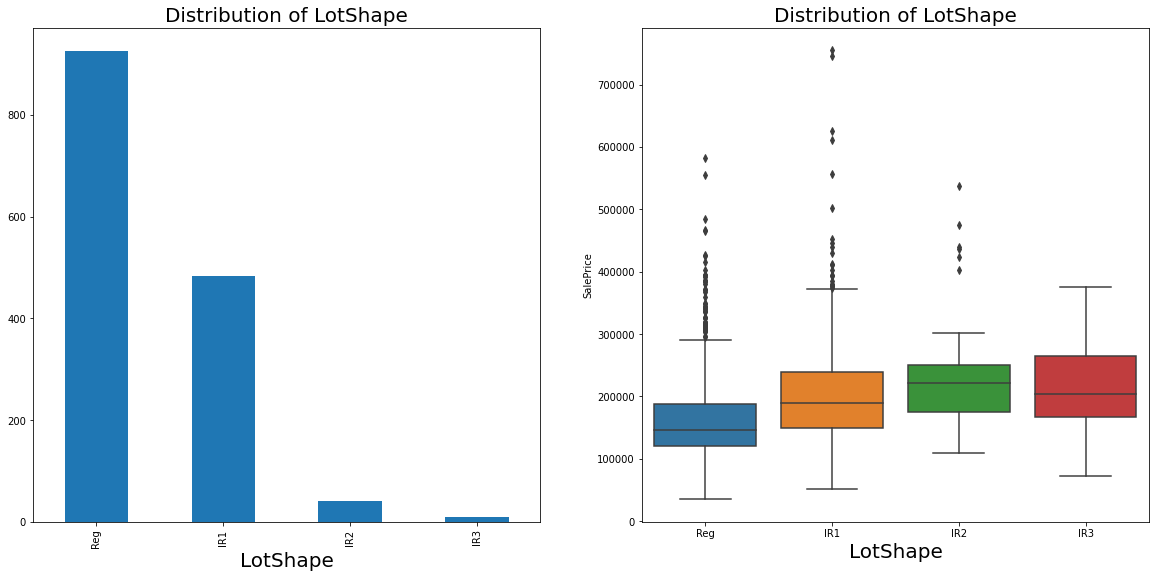

116


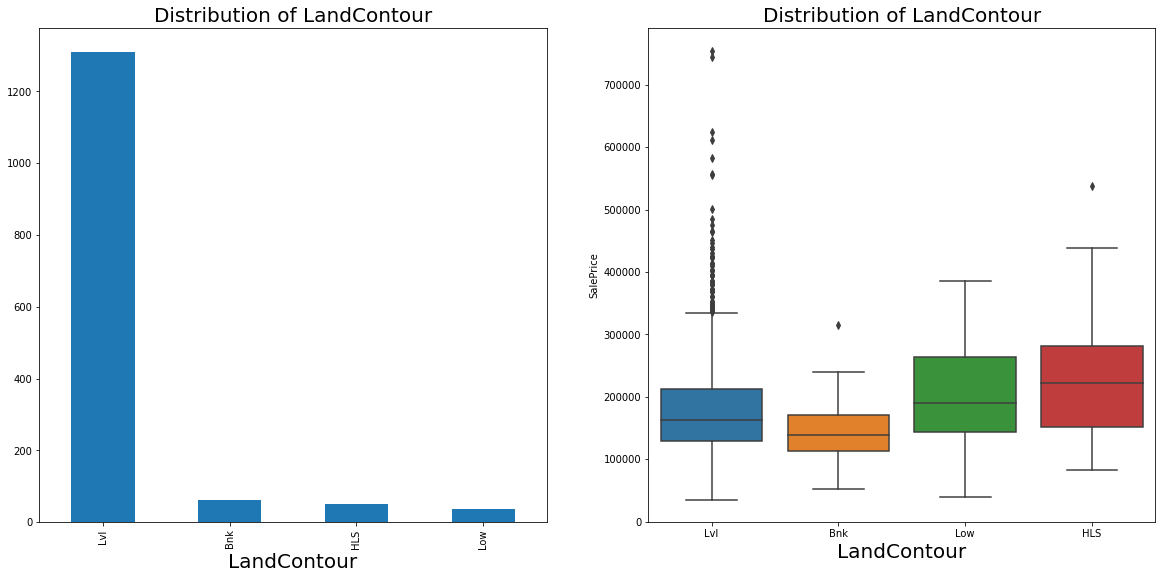

116


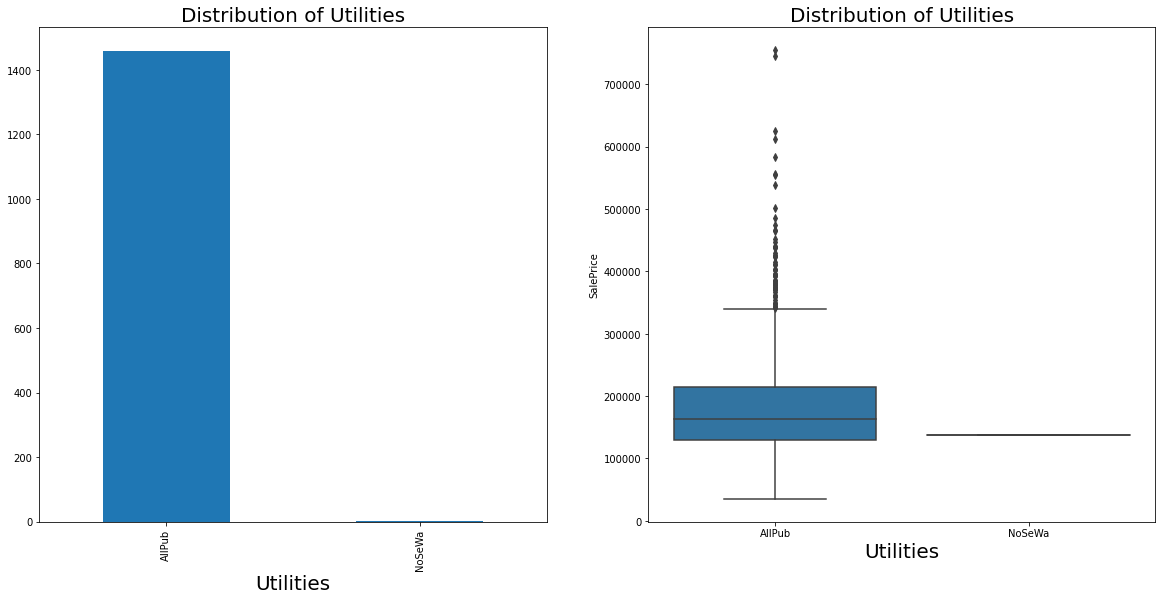

116


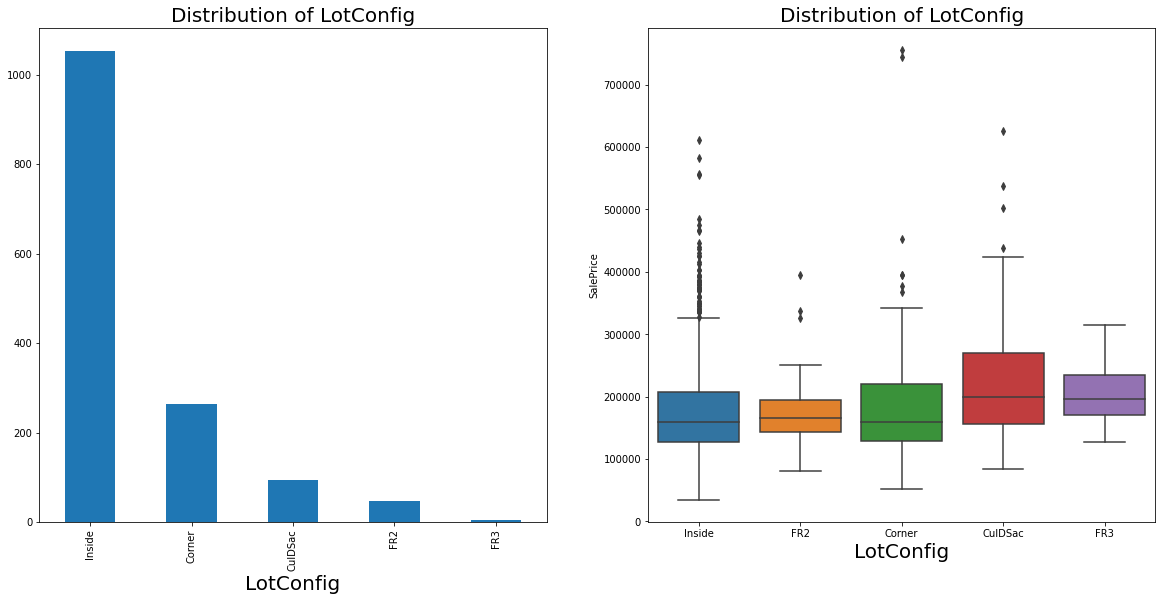

116


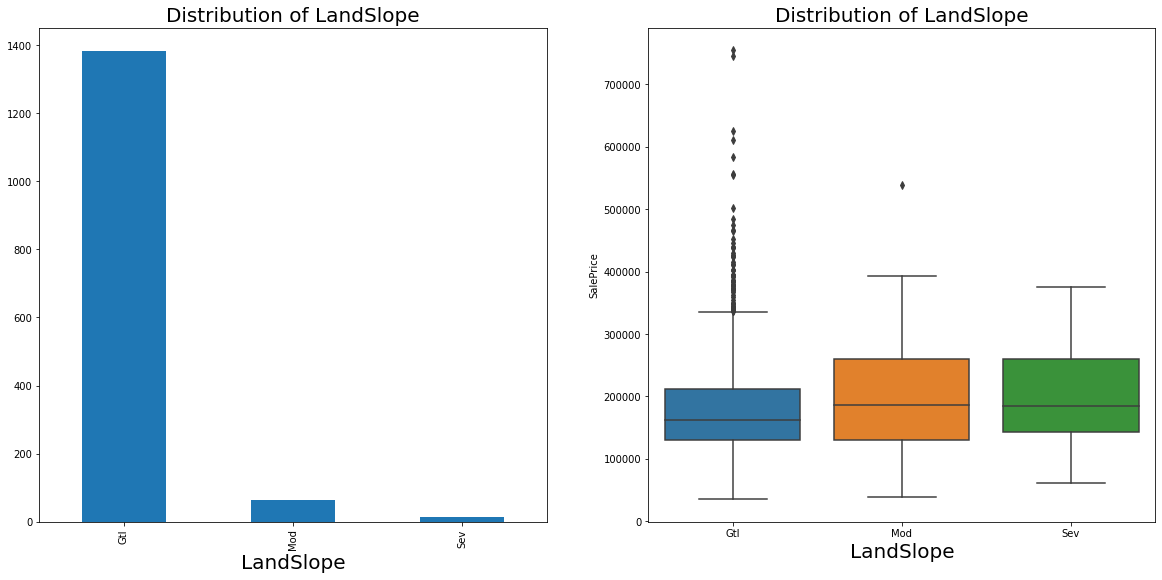

116


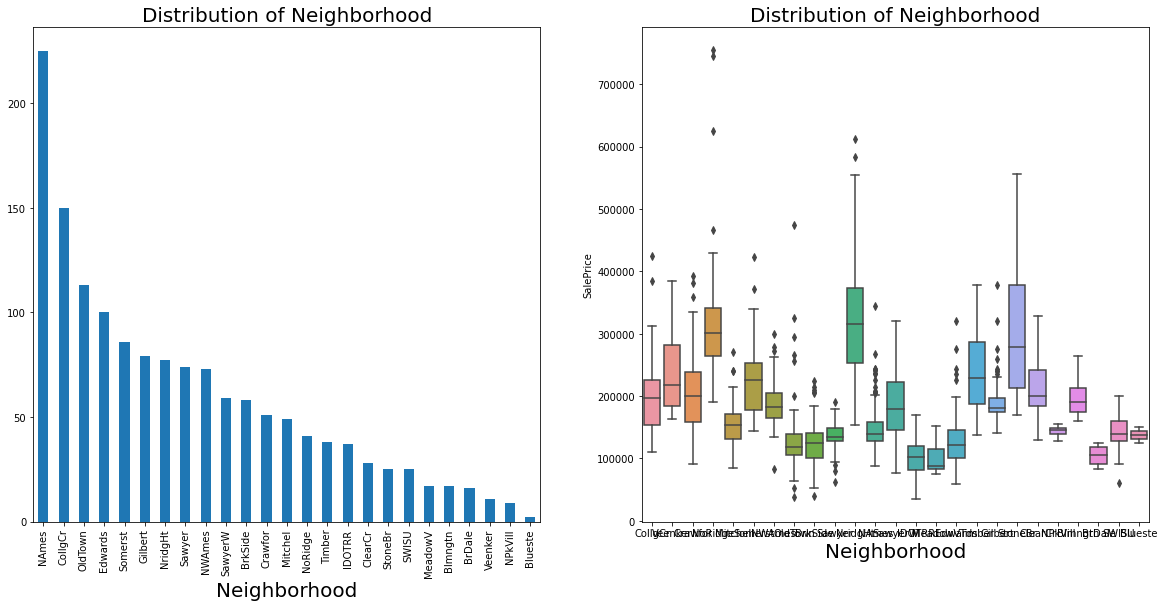

116


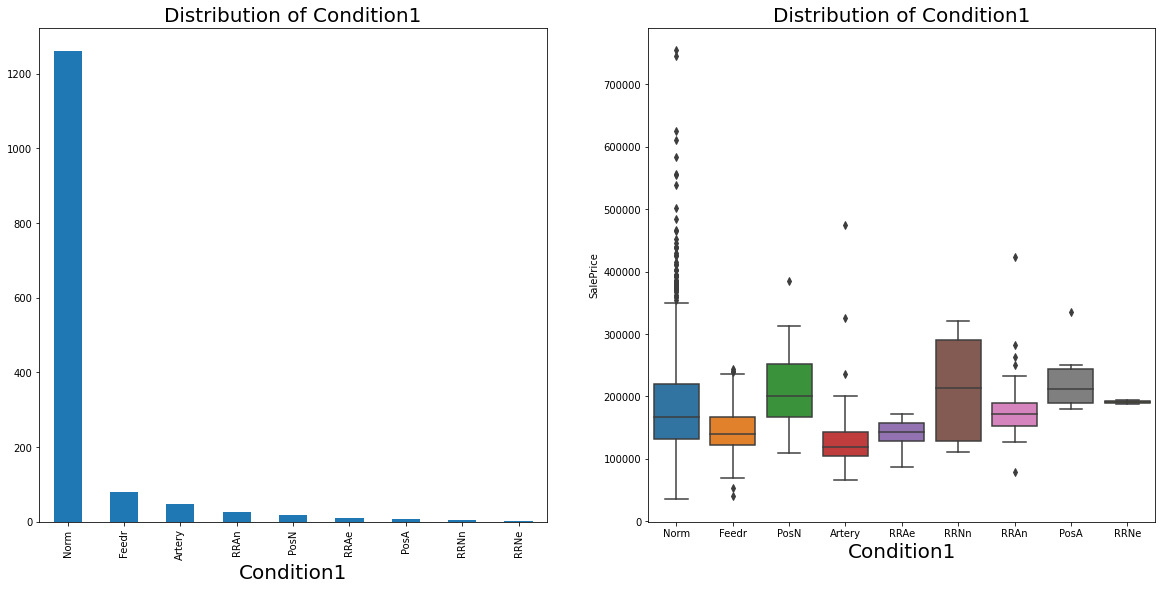

116


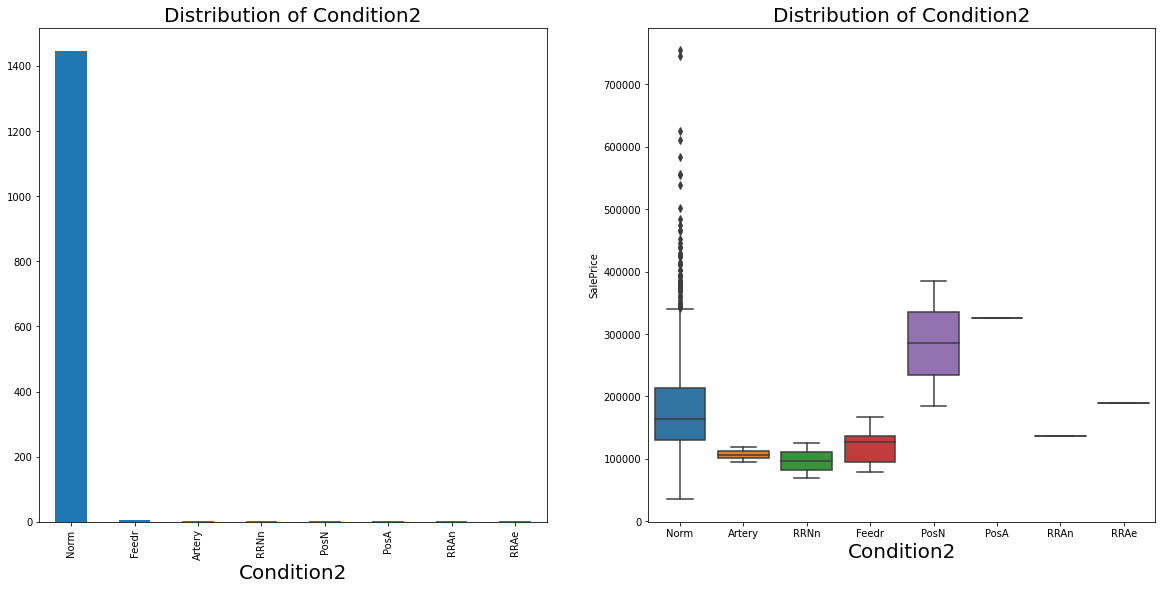

116


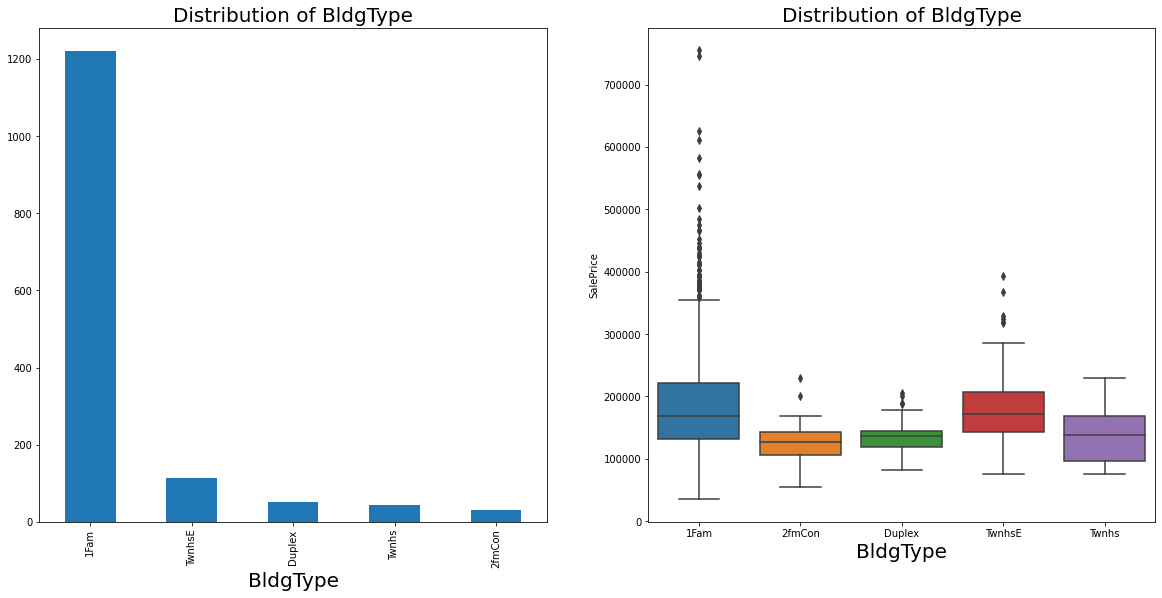

116


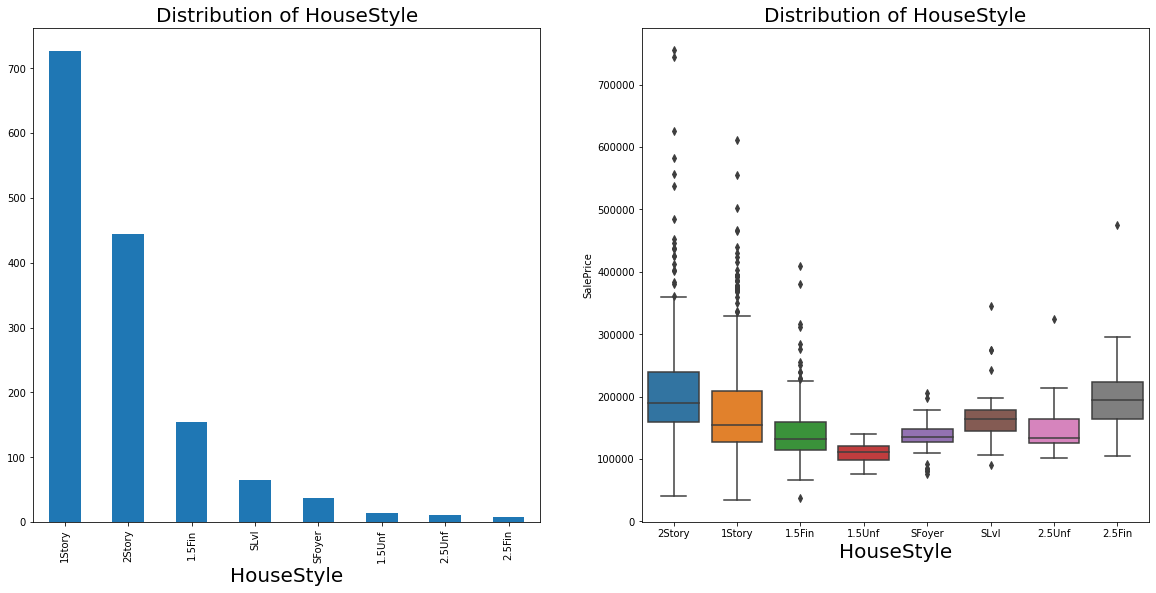

116


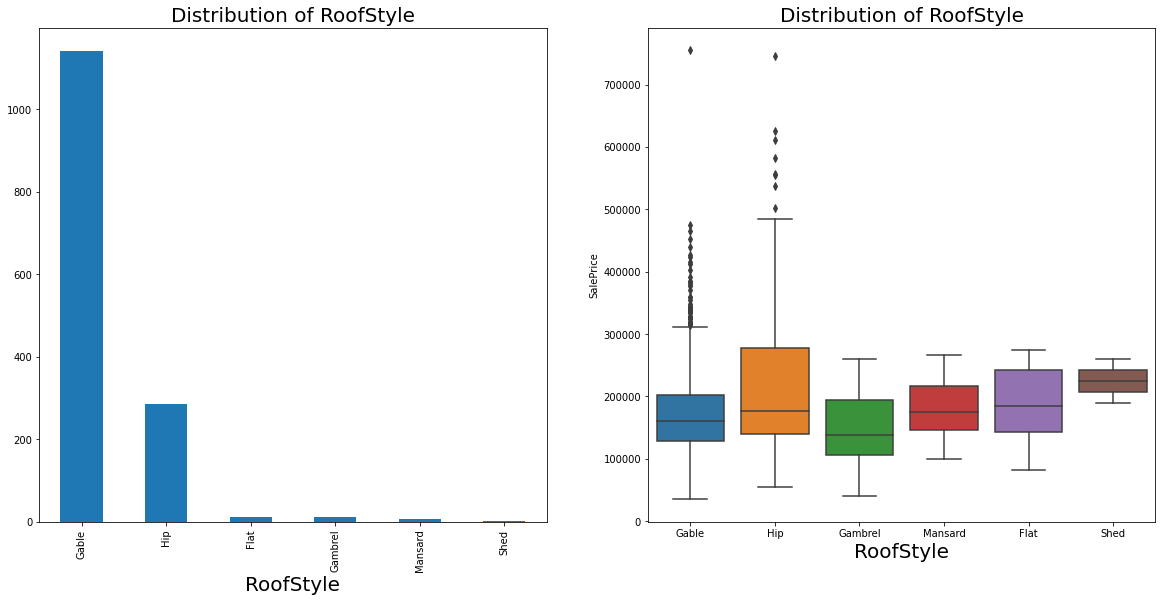

116


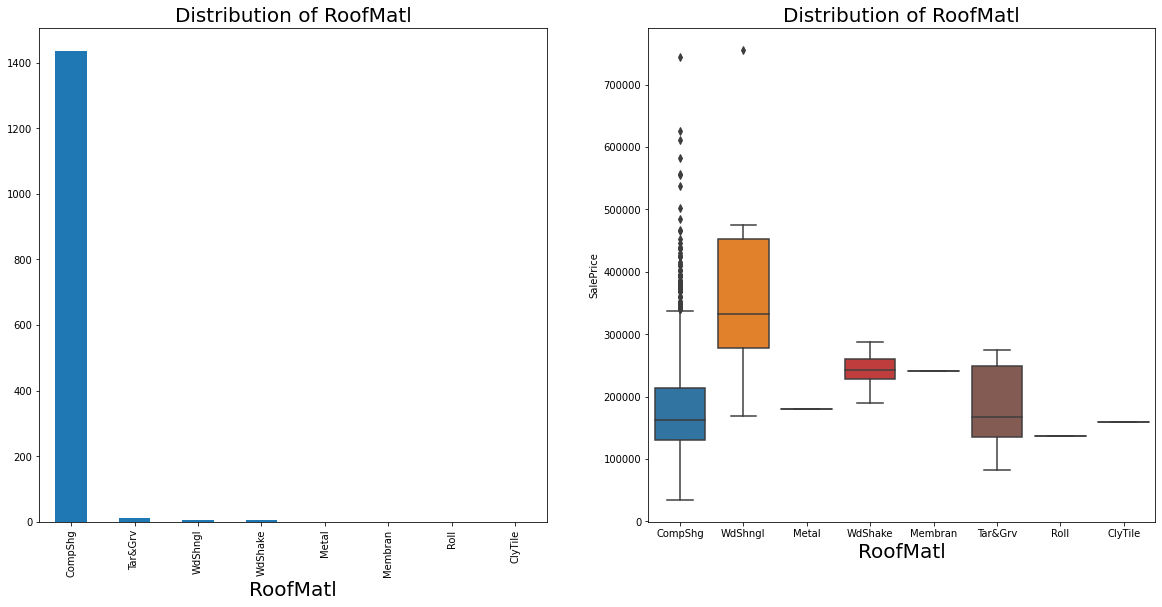

116


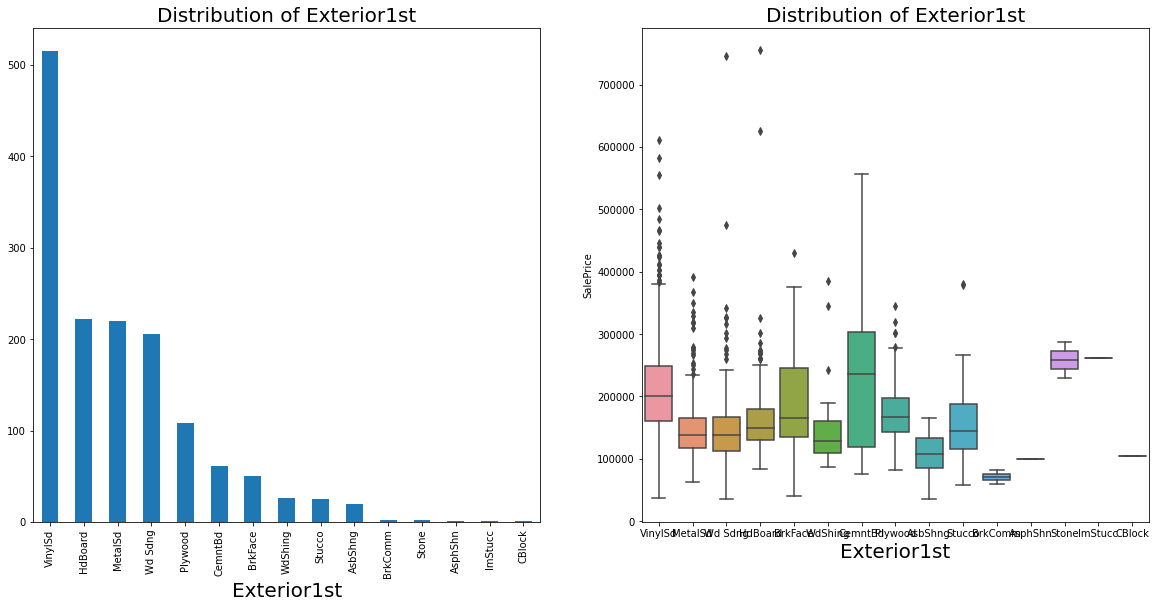

116


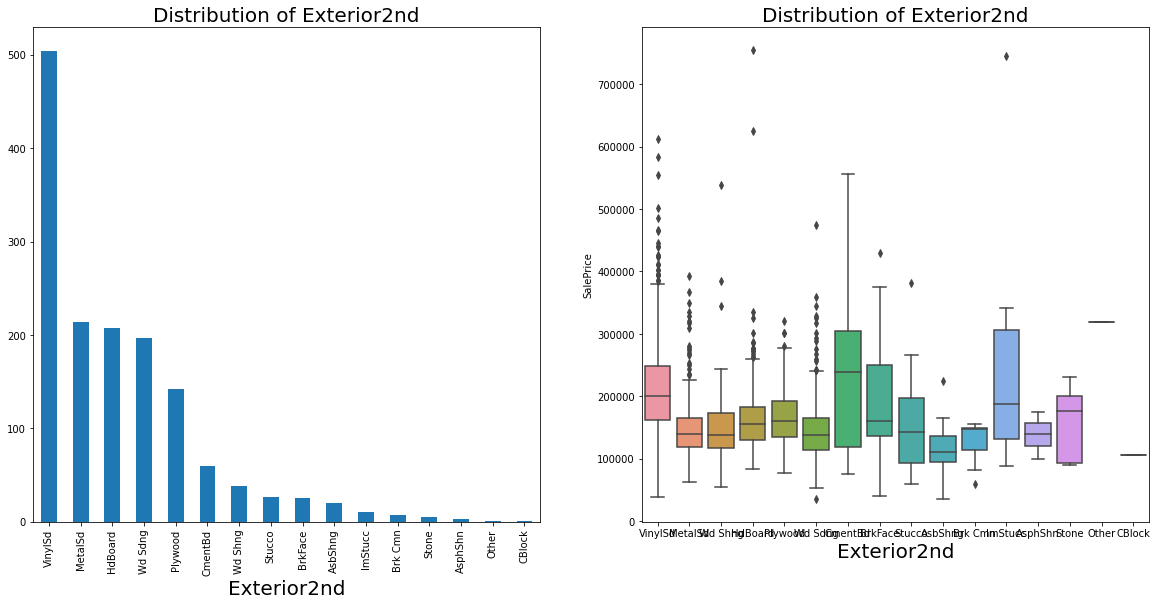

116


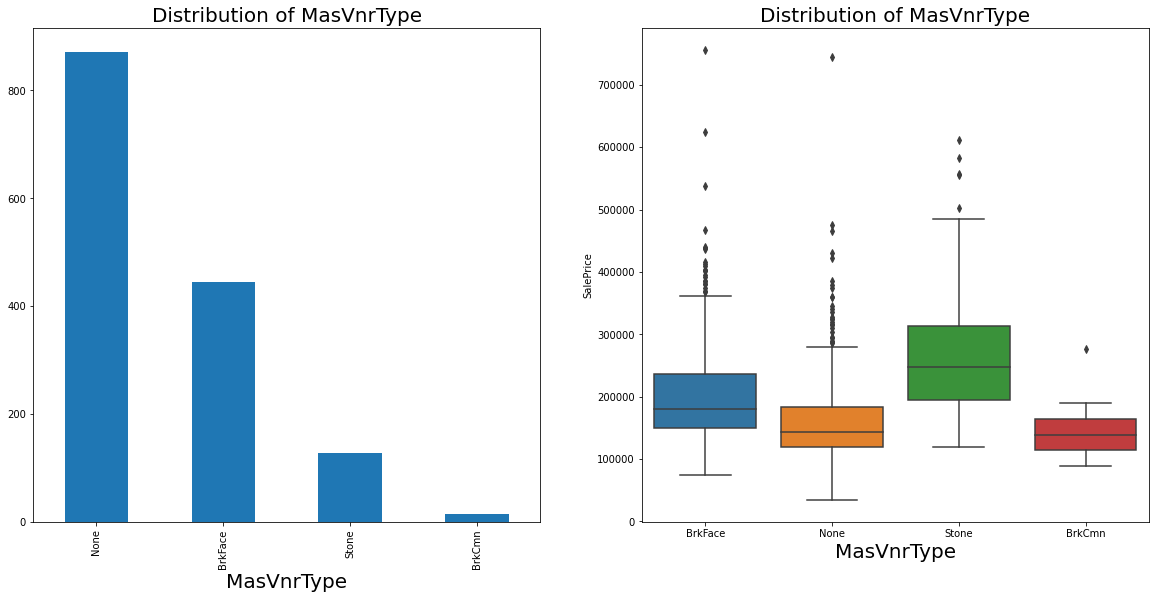

116


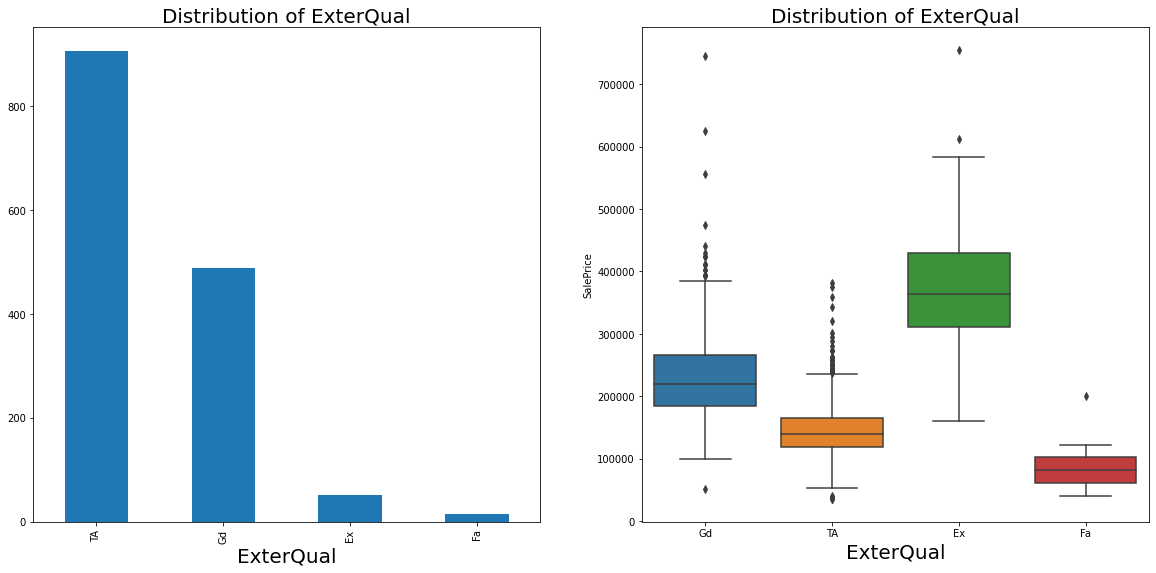

116


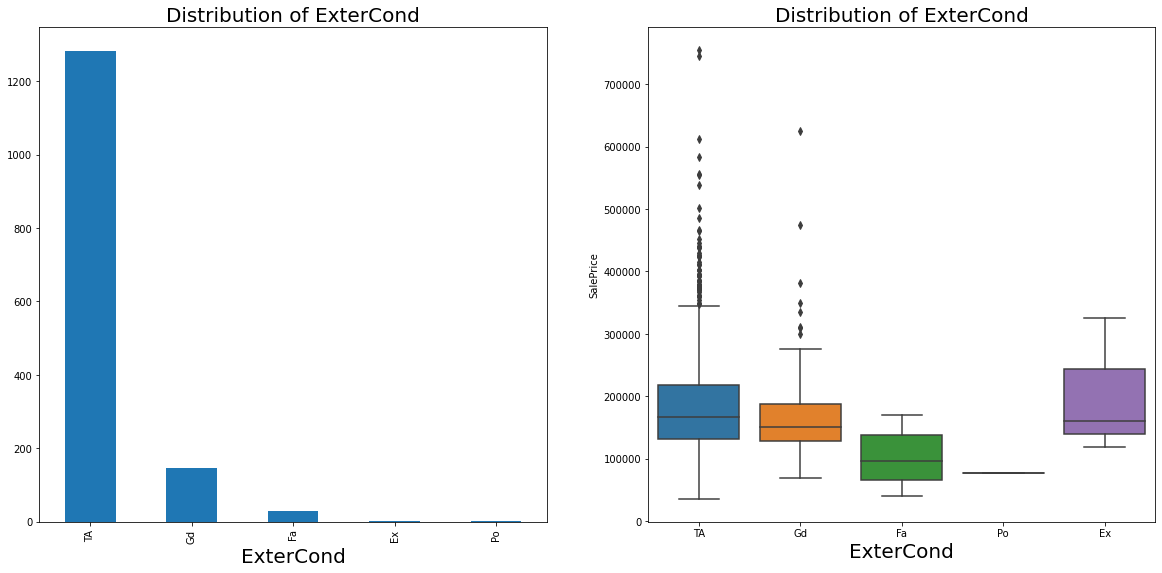

116


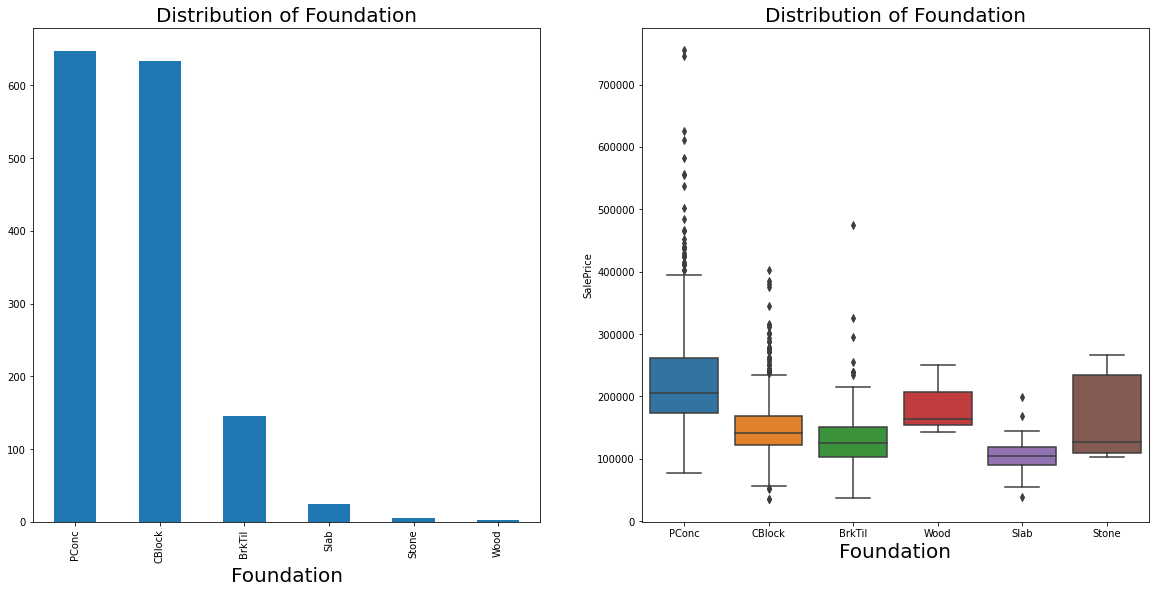

116


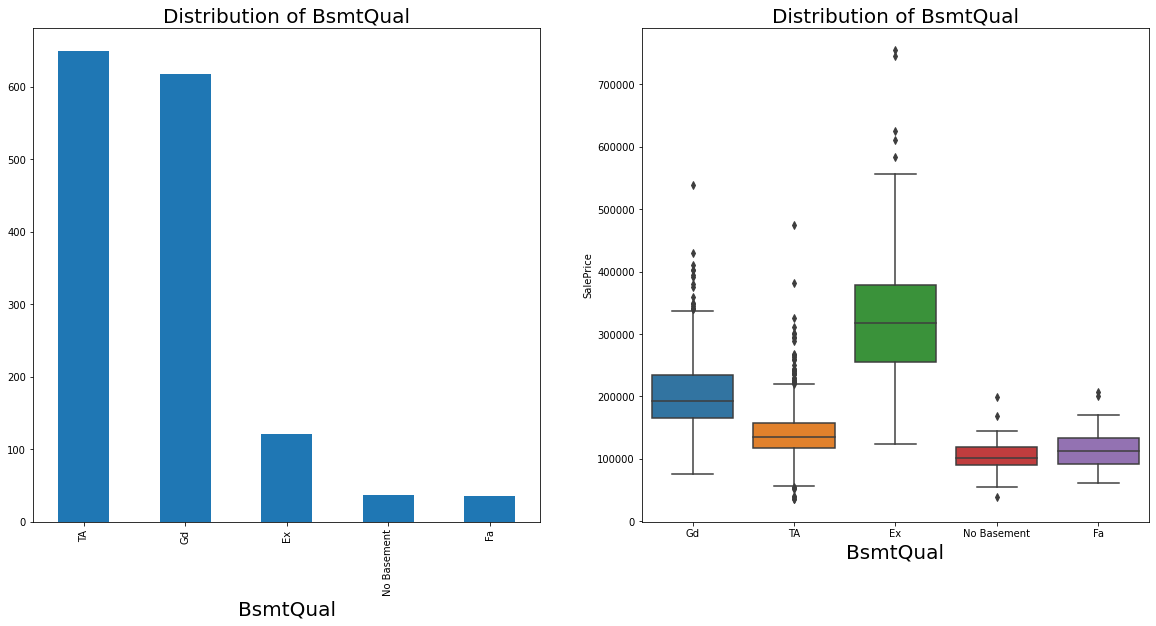

116


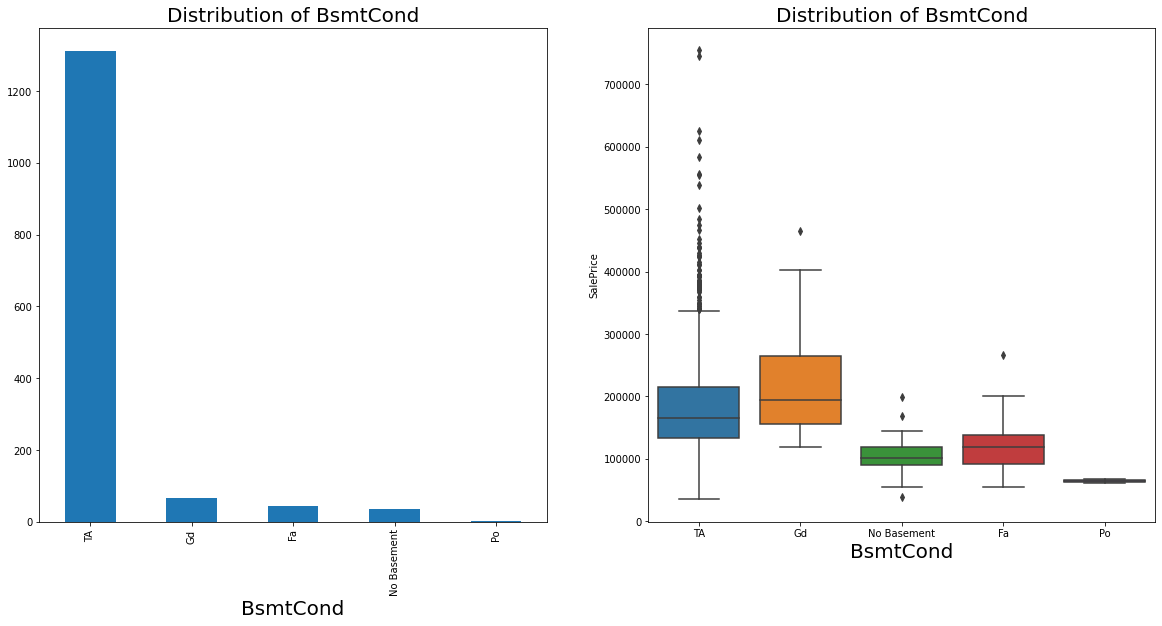

116


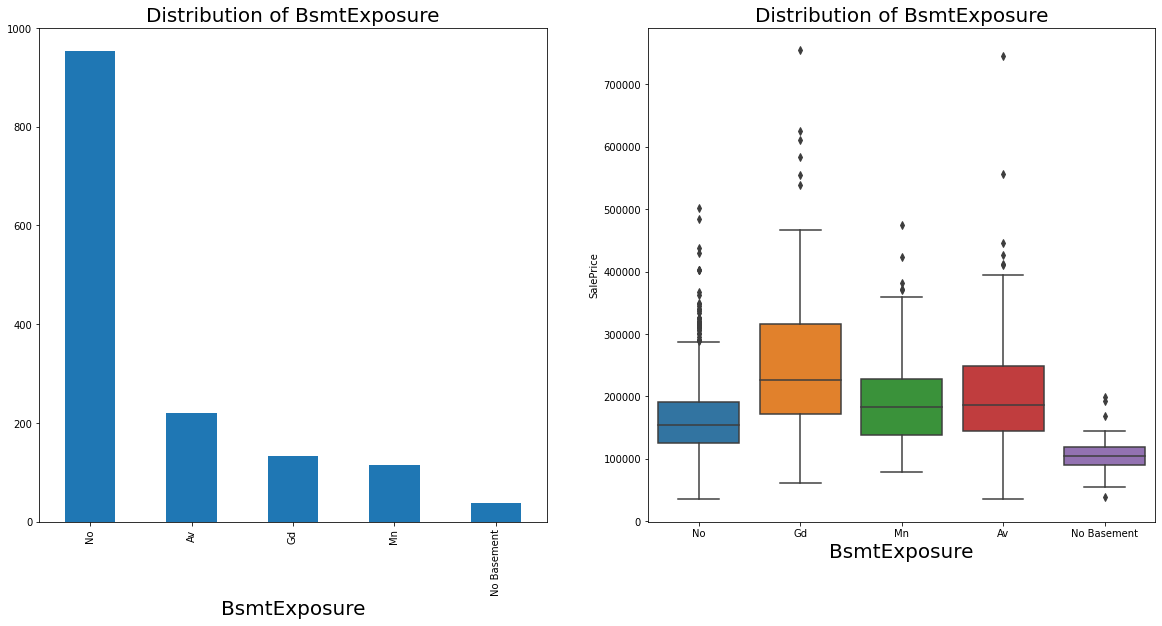

116


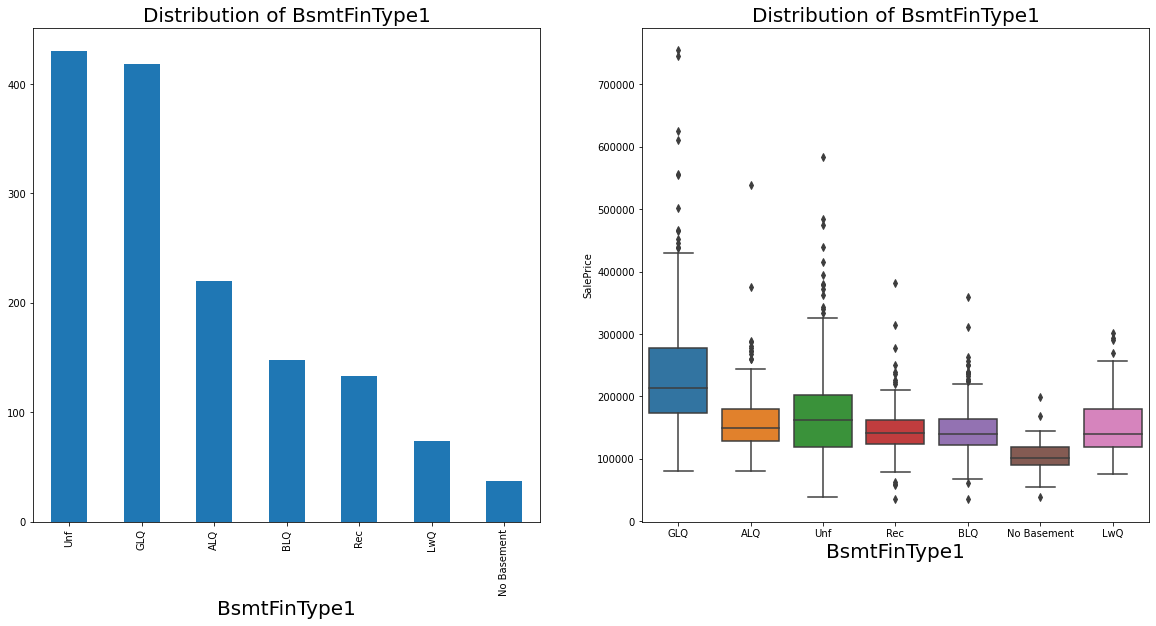

116


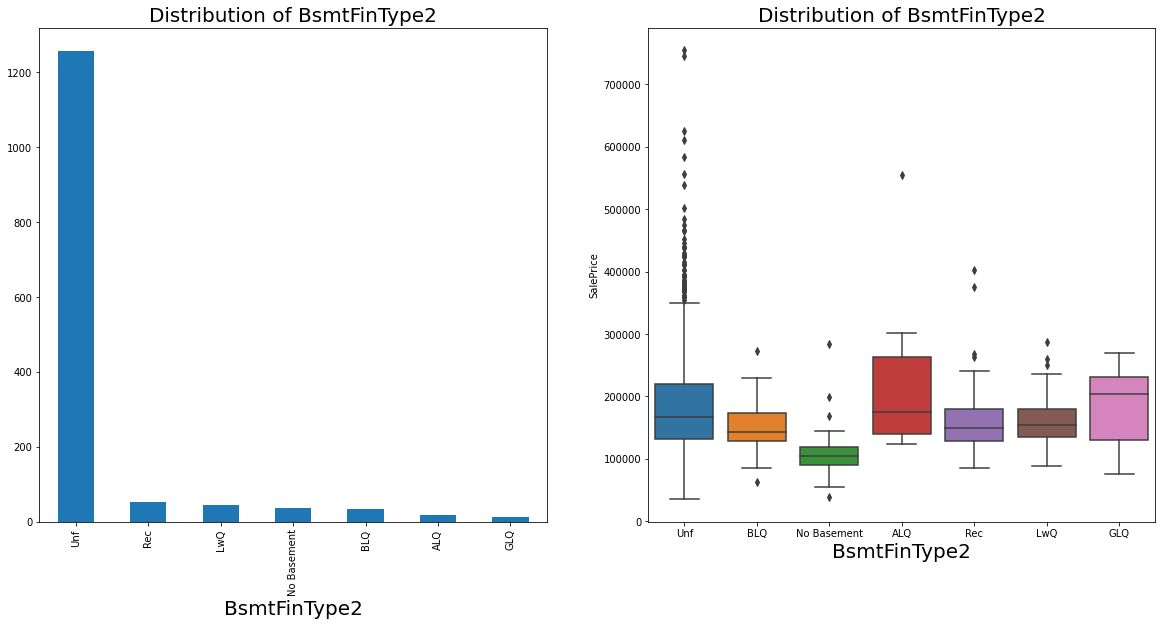

116


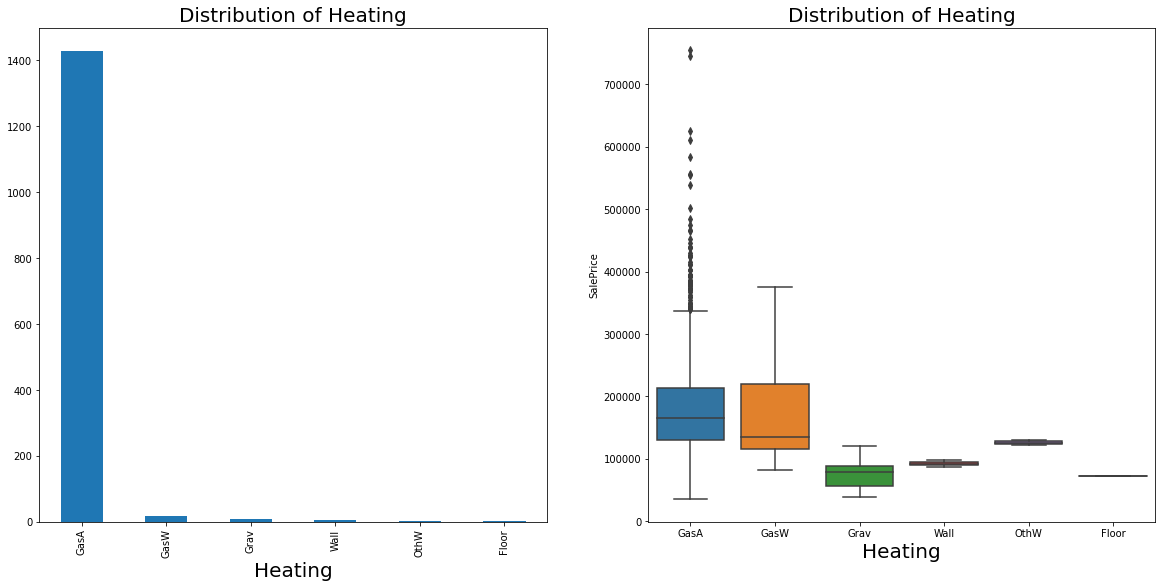

116


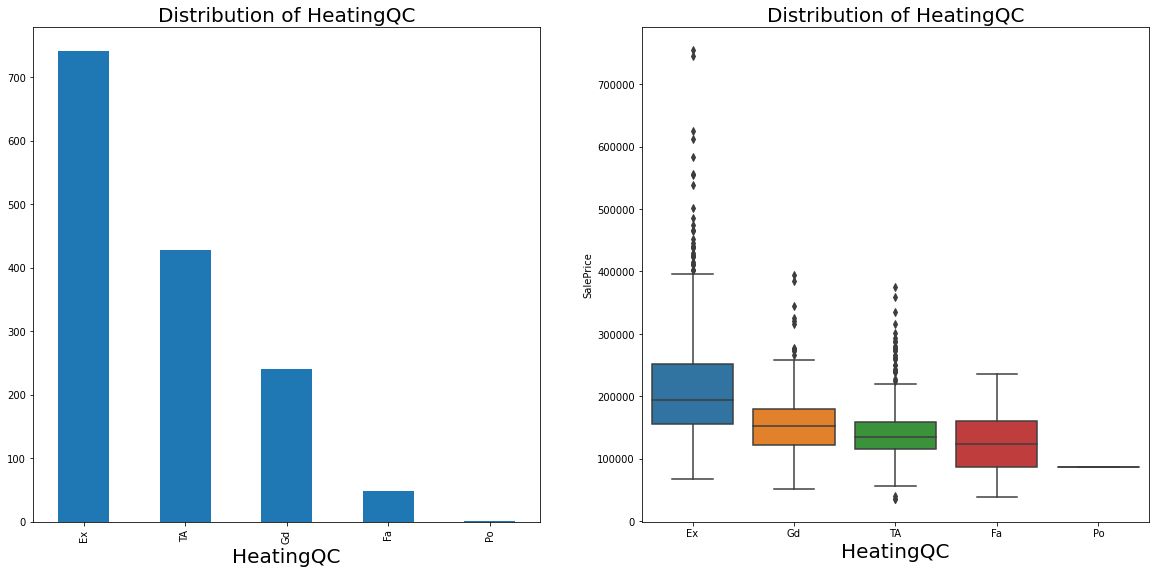

116


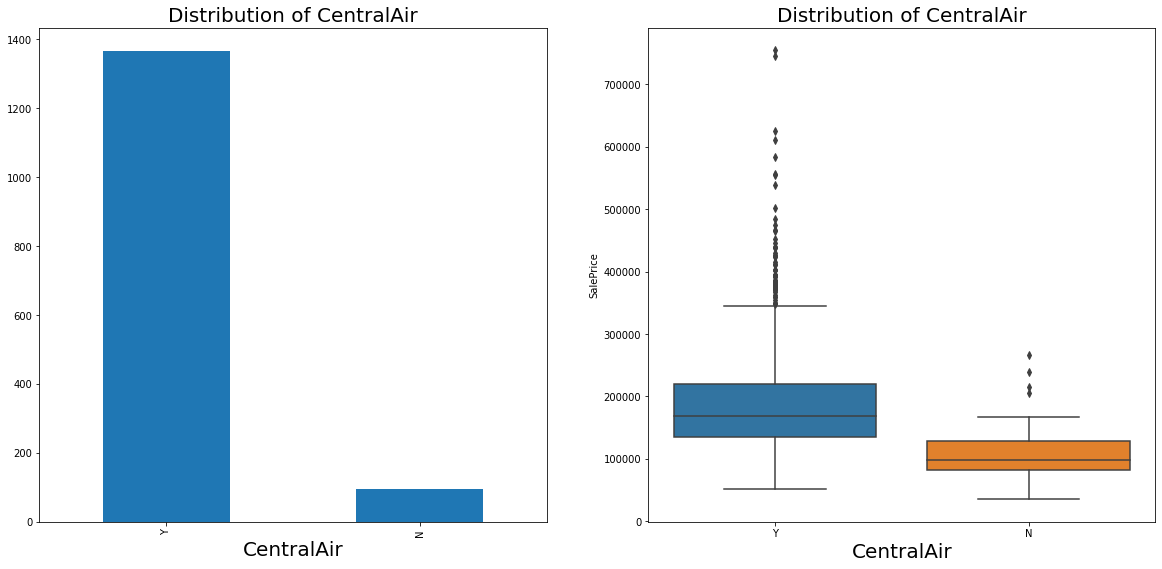

116


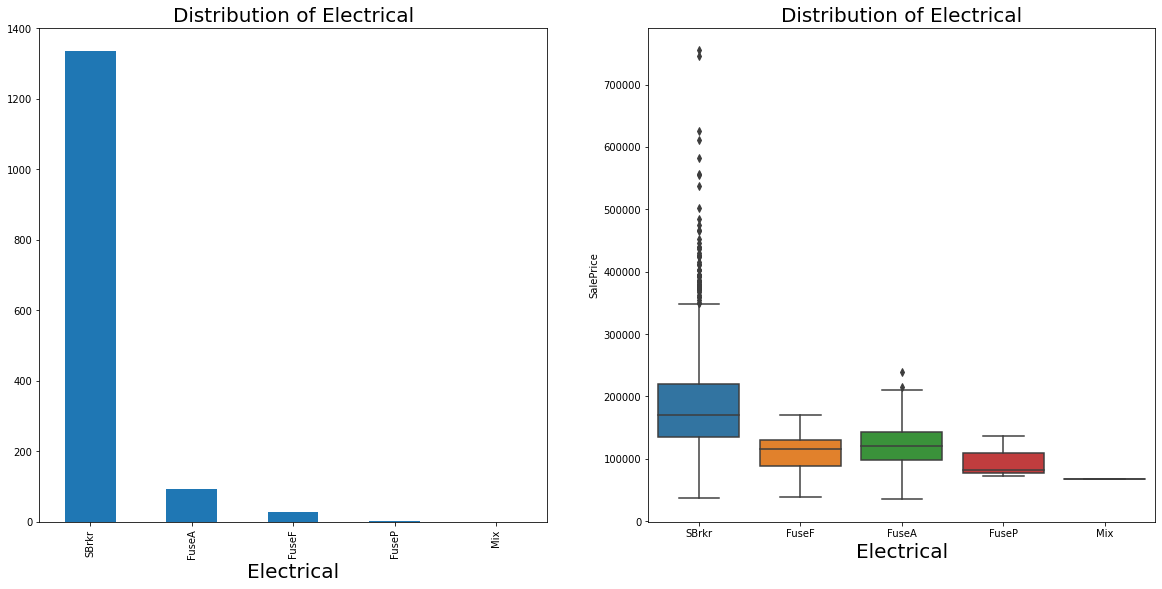

116


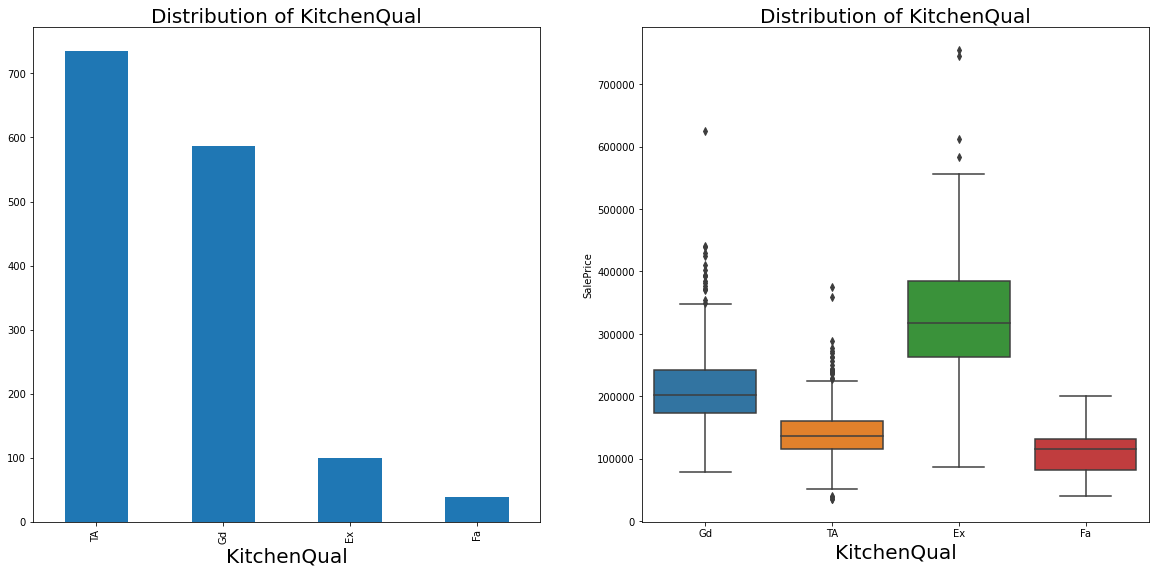

116


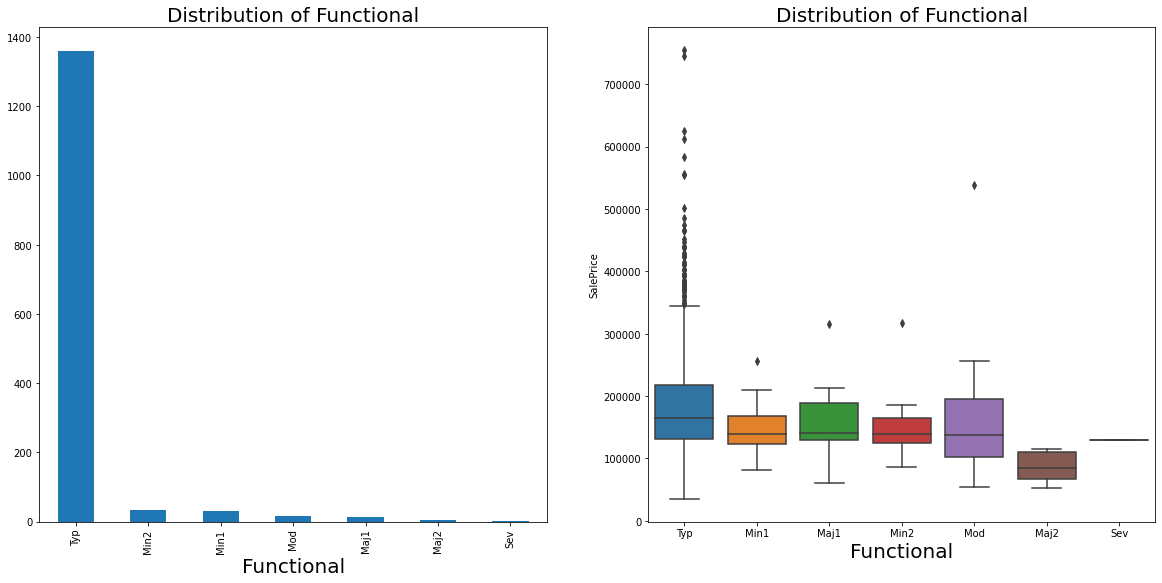

116


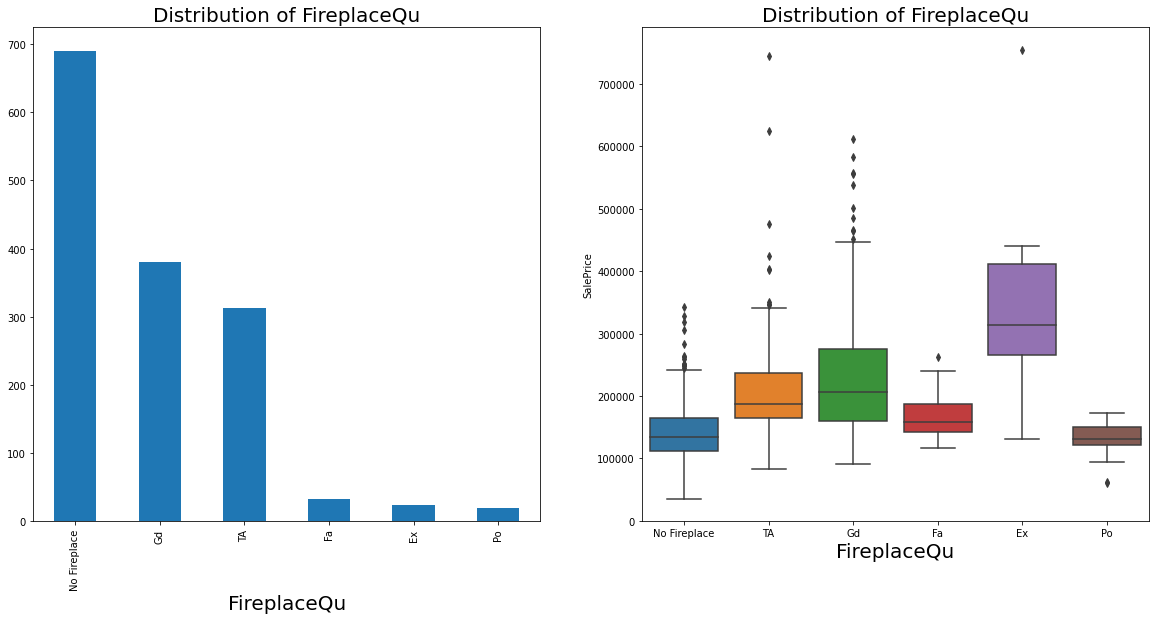

116


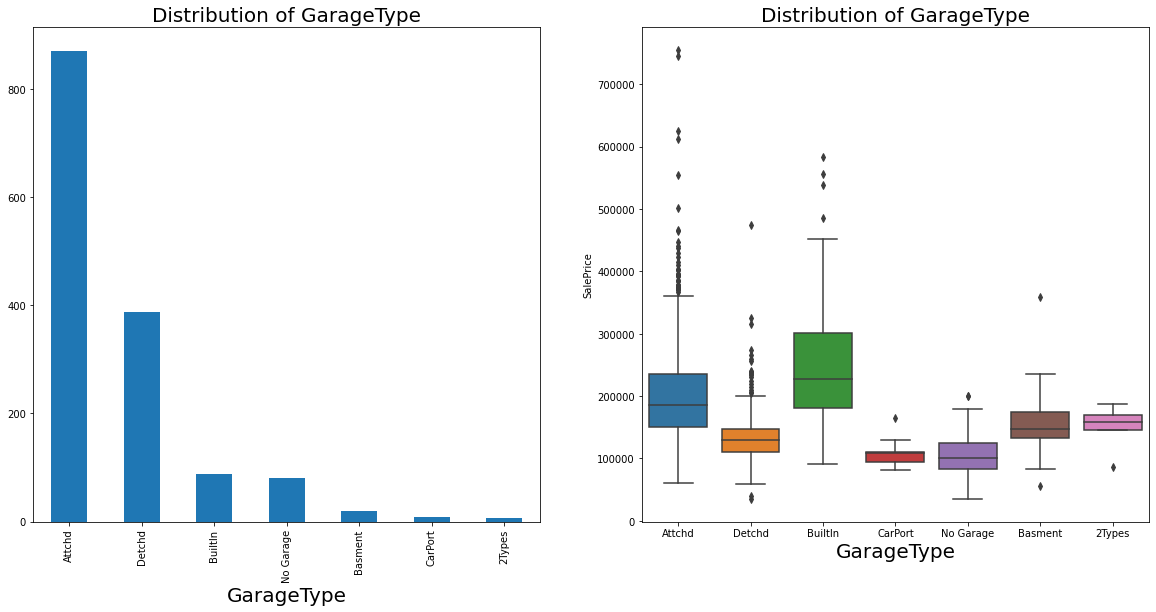

116


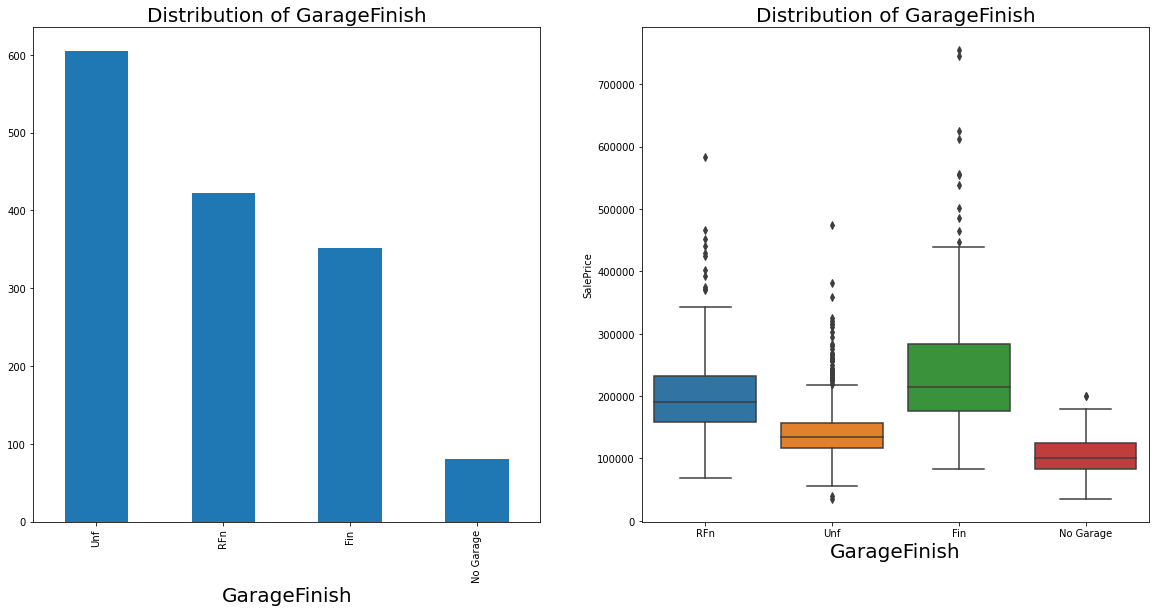

116


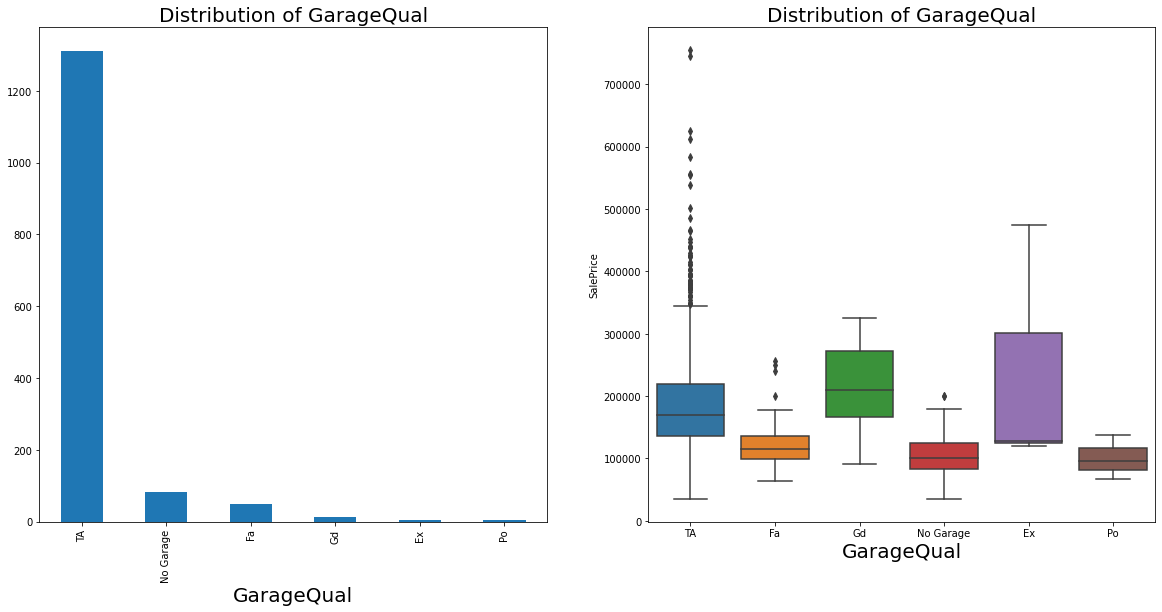

116


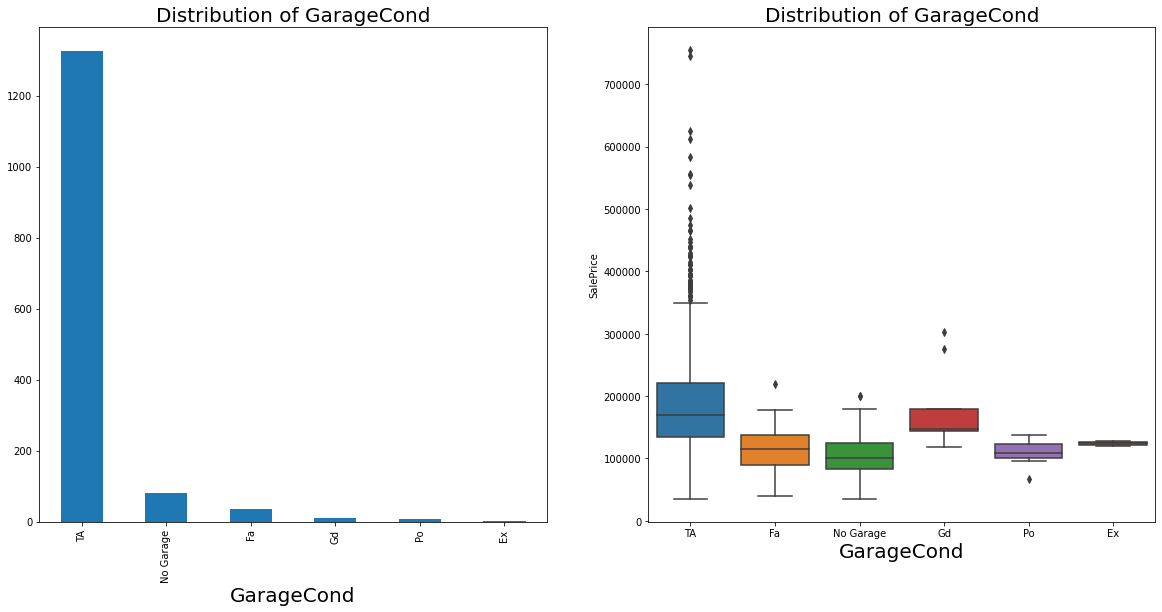

116


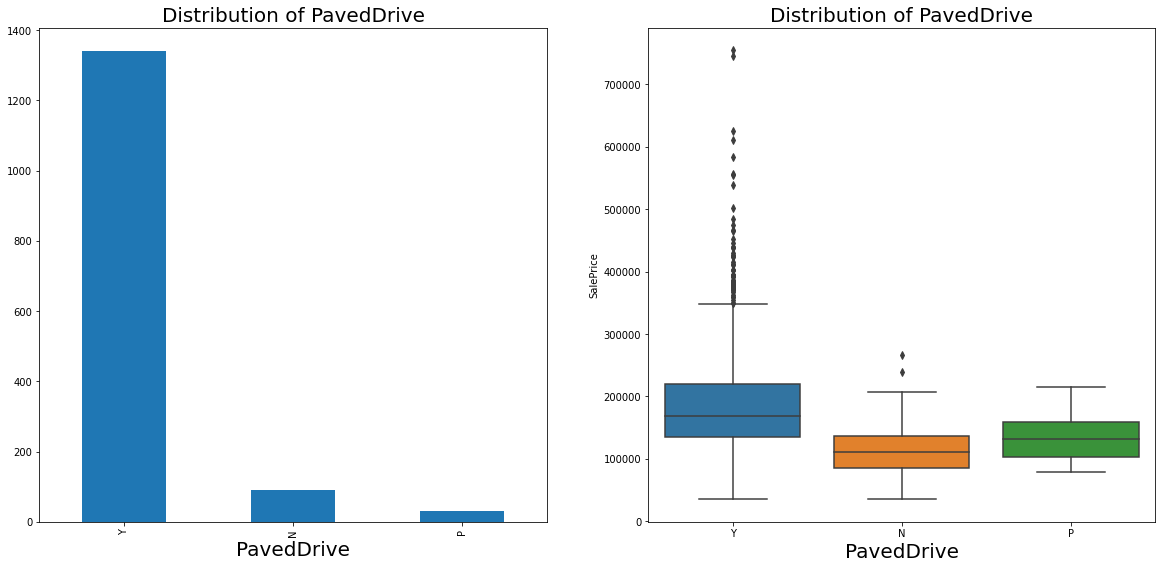

116


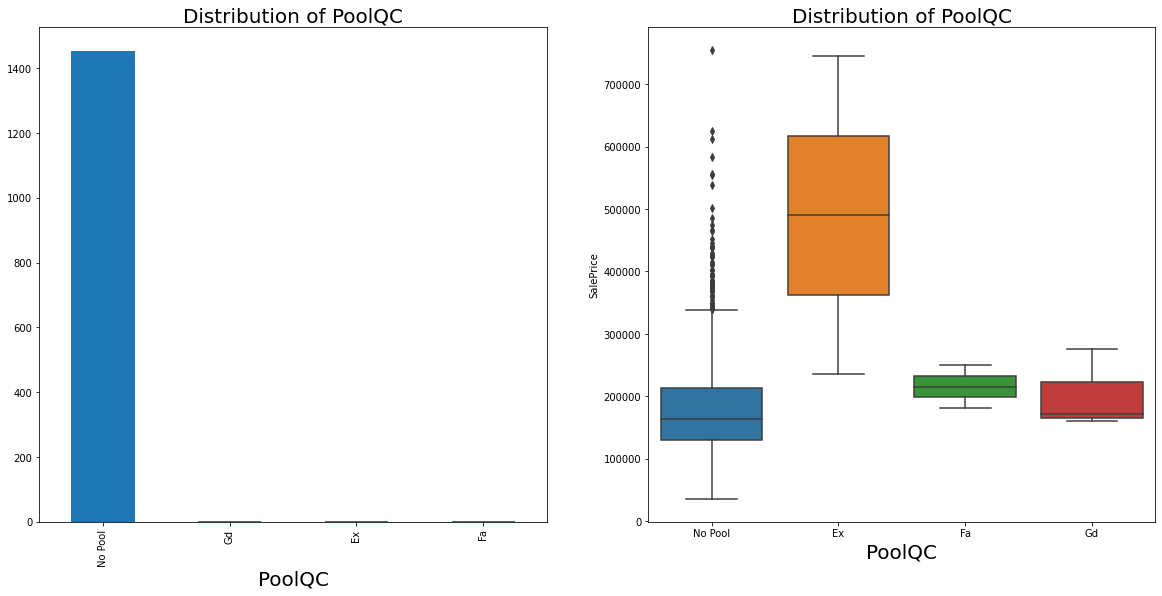

116


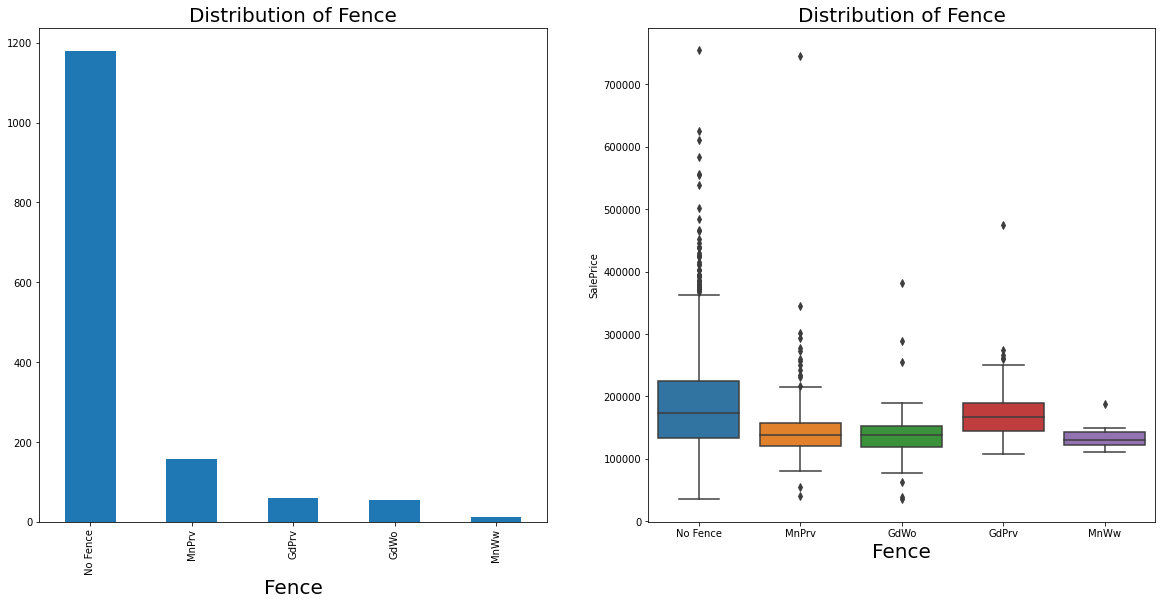

116


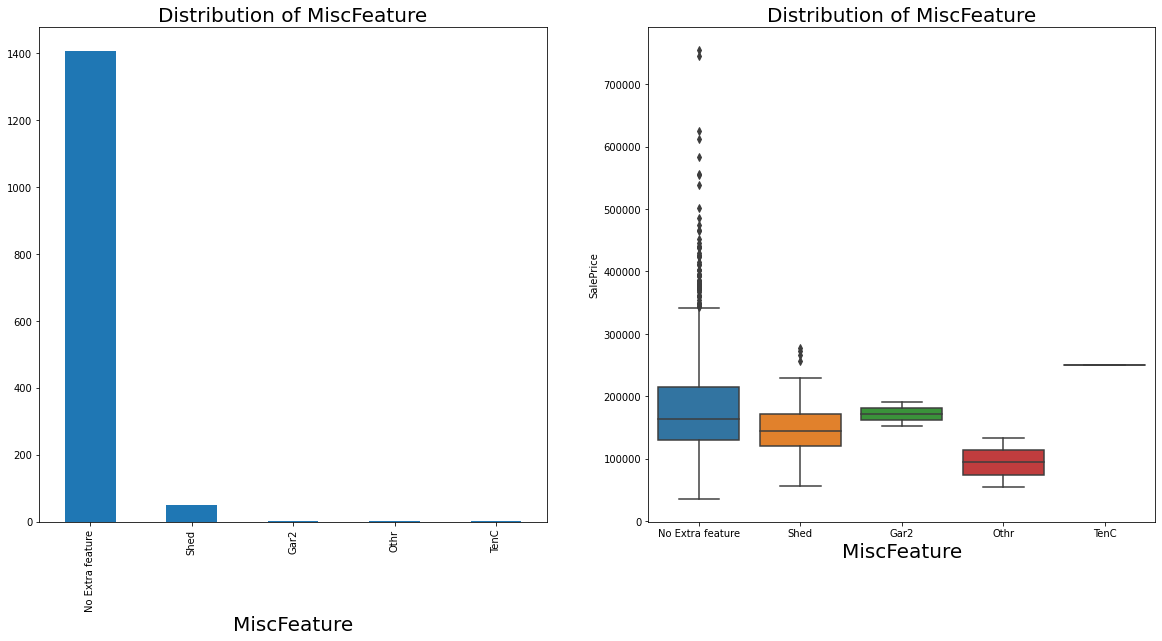

116


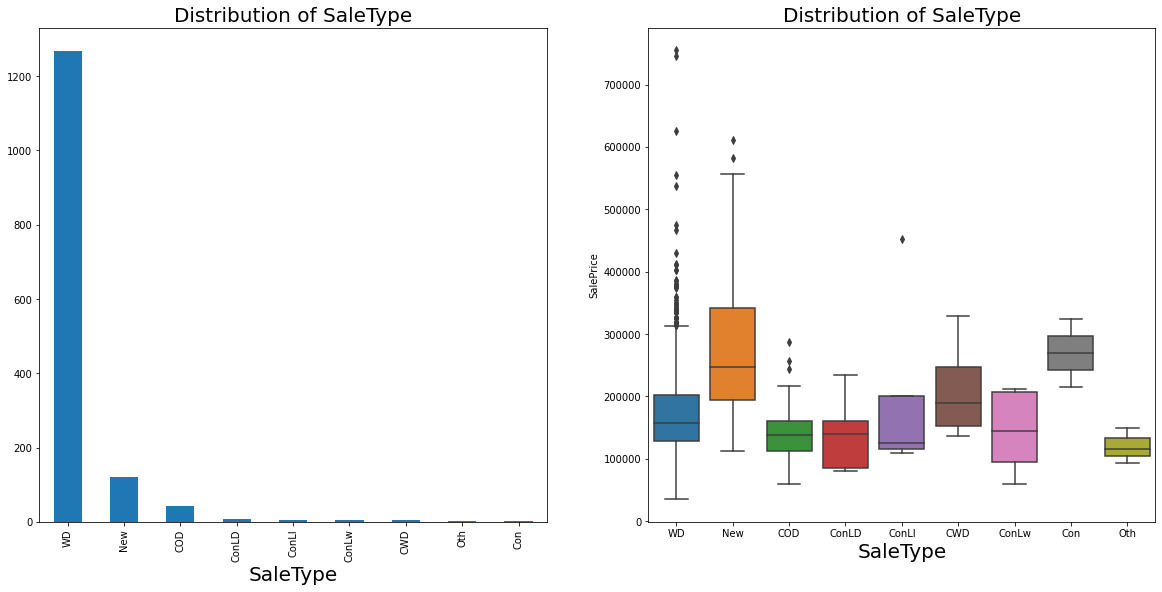

116


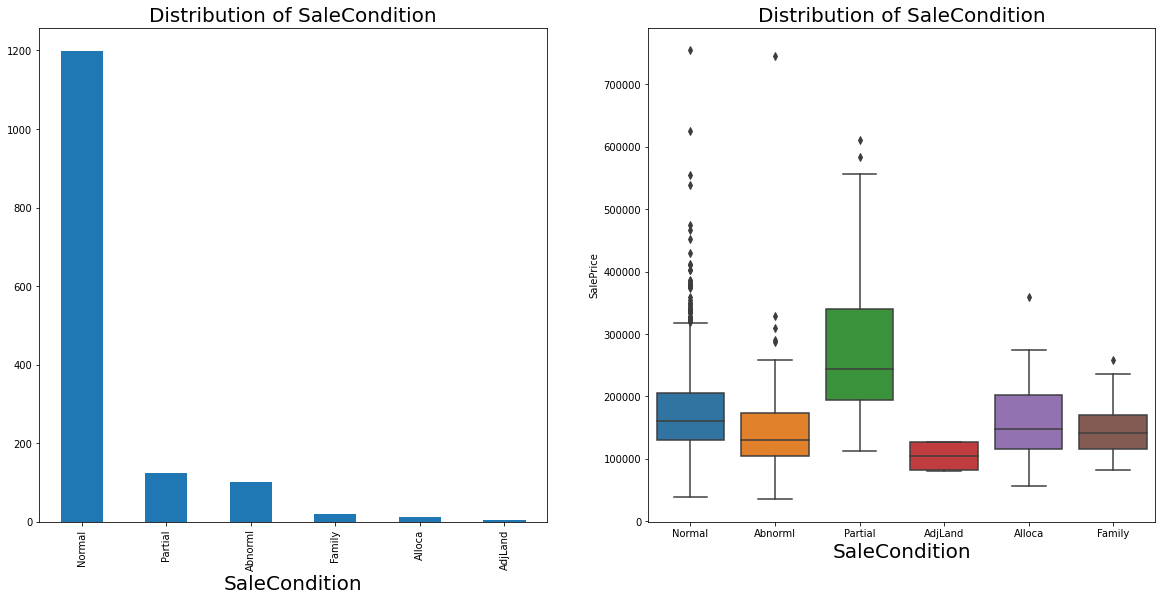

116


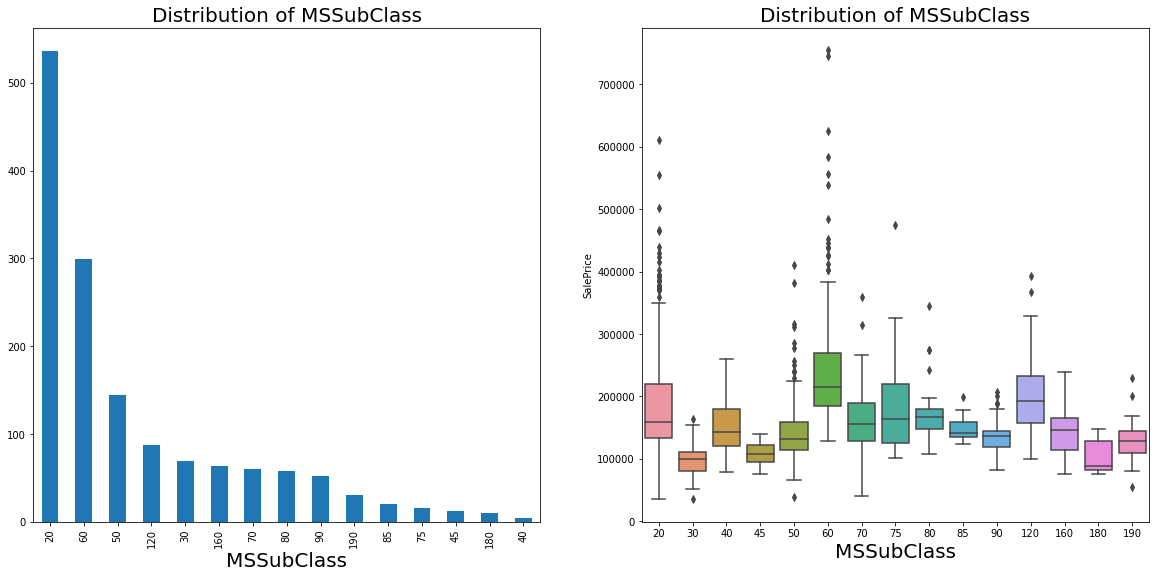

116


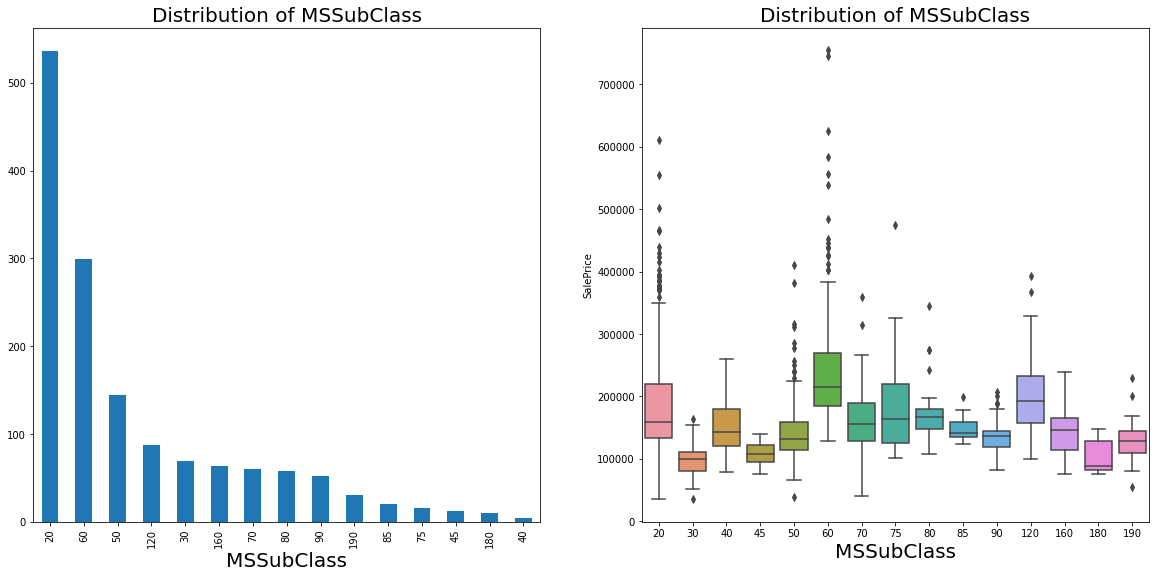

116


In [124]:
# The following code was used to viualise all the columns and identify important patterns. 


for col in cat_cols:


    plt.figure(figsize=(20,20))
    plt.subplot(2,2,1)
    data[col].value_counts().plot(kind='bar')
    plt.xlabel(col,fontsize=20)
    plt.title('Distribution of {}'.format(col),fontsize=20)
    plt.subplot(2,2,2)
    sns.boxplot(y=data['SalePrice'],x=data[col])
    plt.xlabel(col,fontsize=20)
    plt.title('Distribution of {}'.format(col),fontsize=20)
    plt.show()
    print(116)


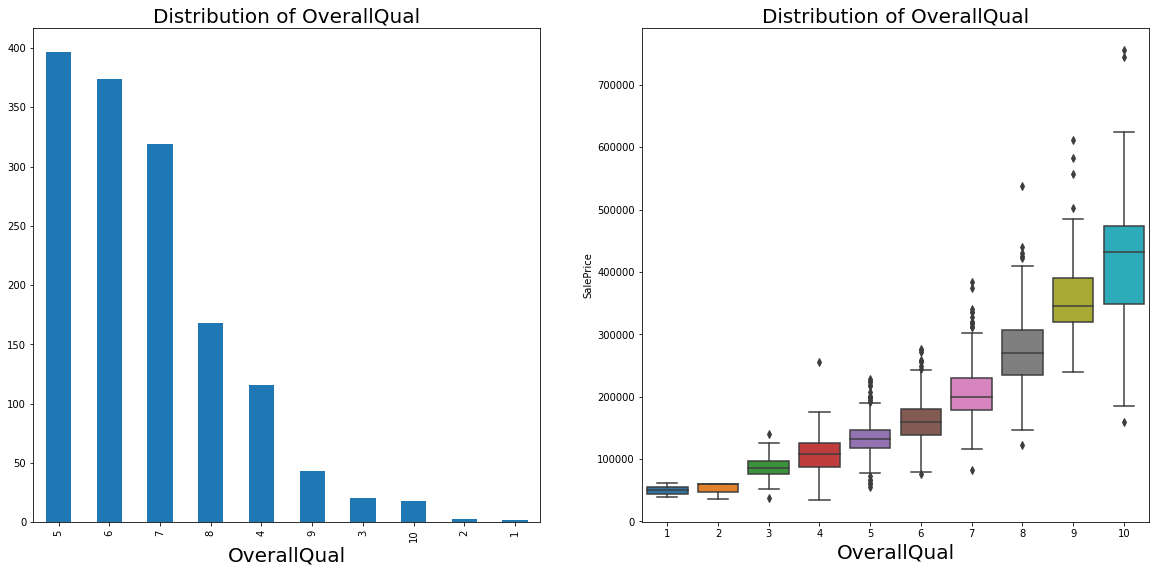

116


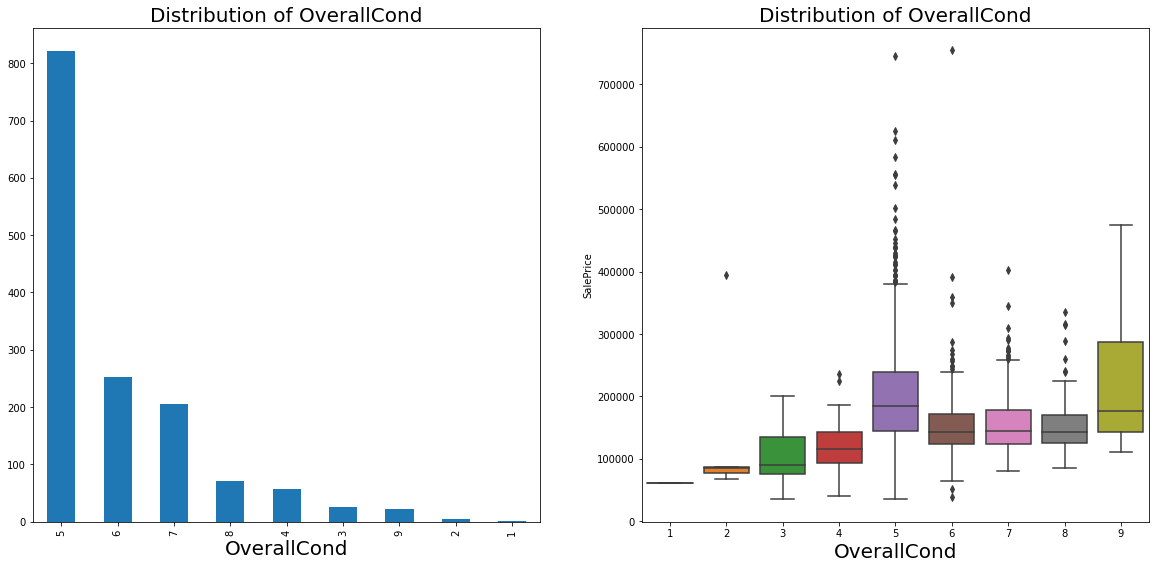

116


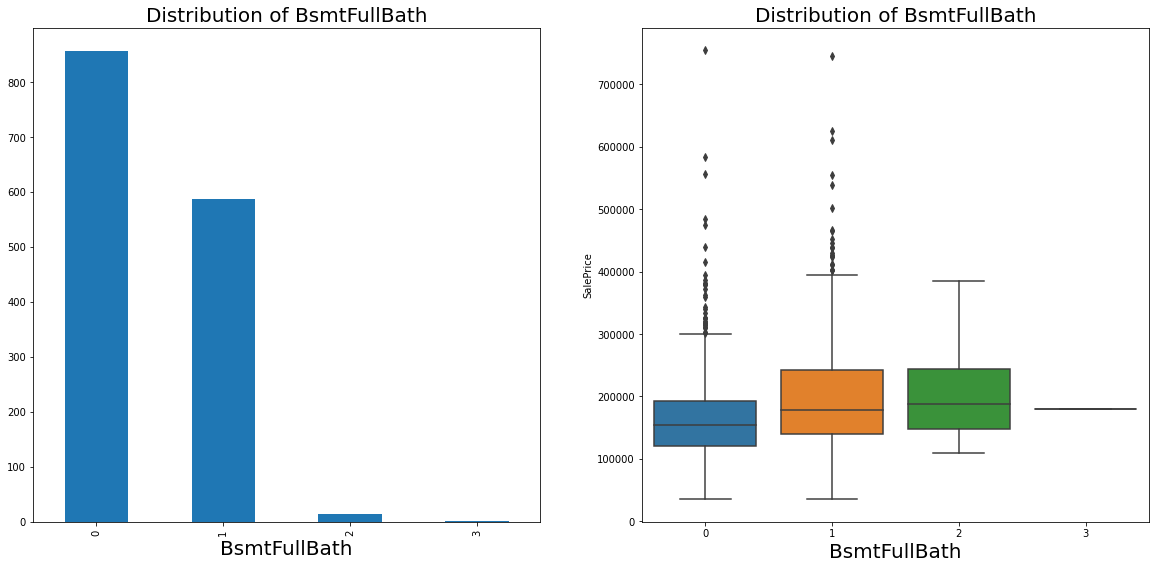

116


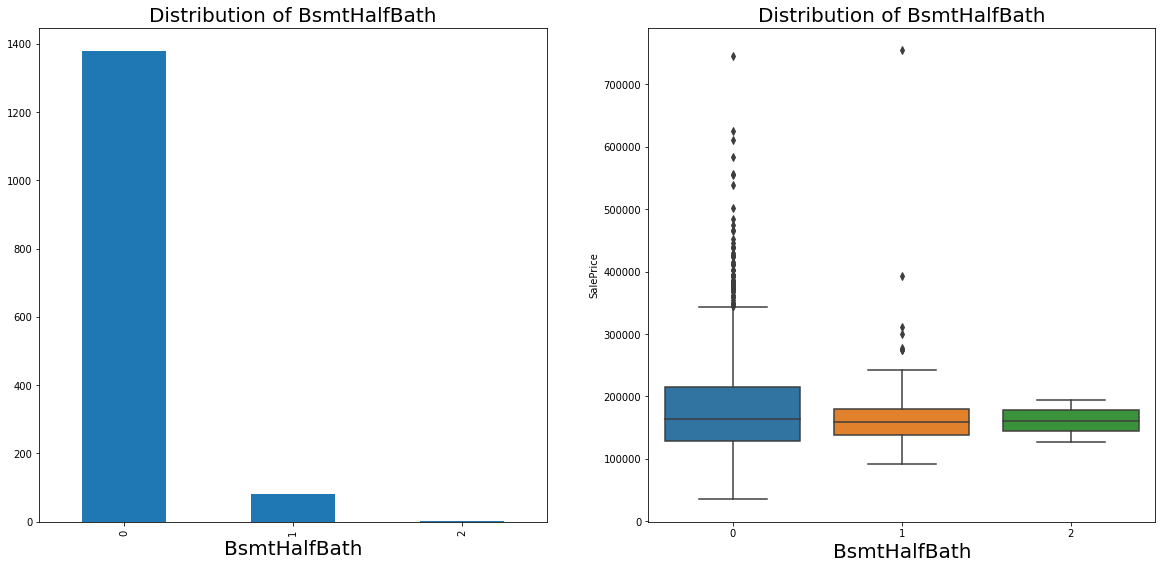

116


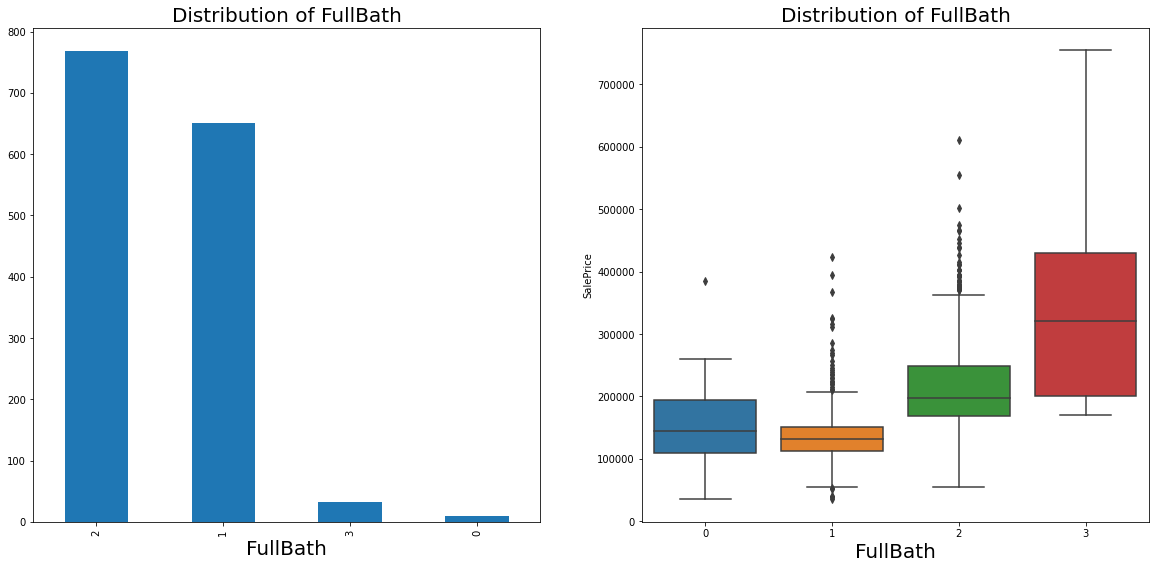

116


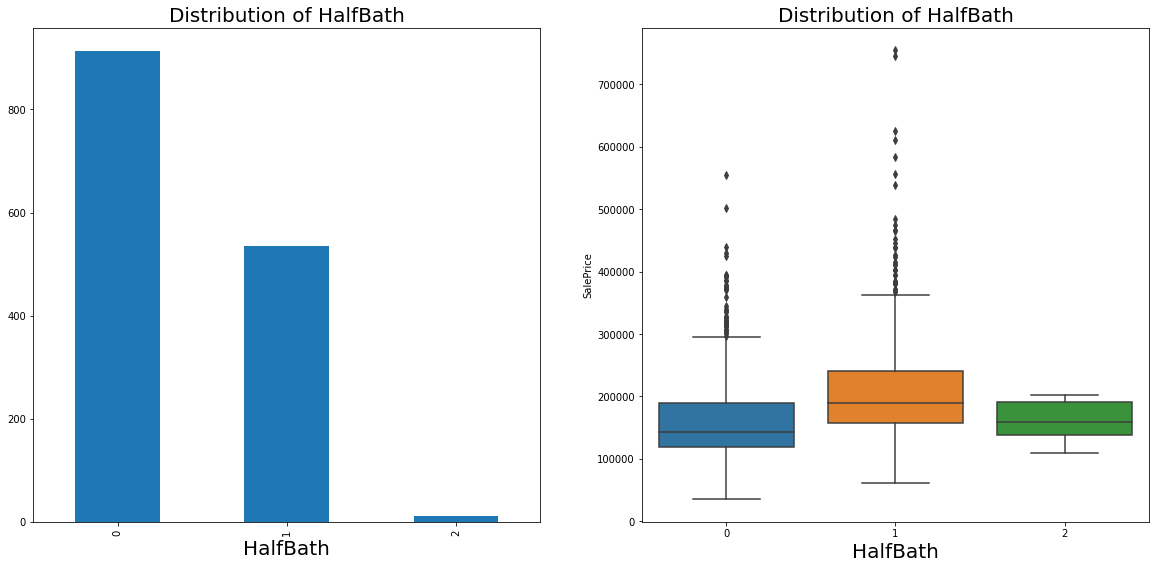

116


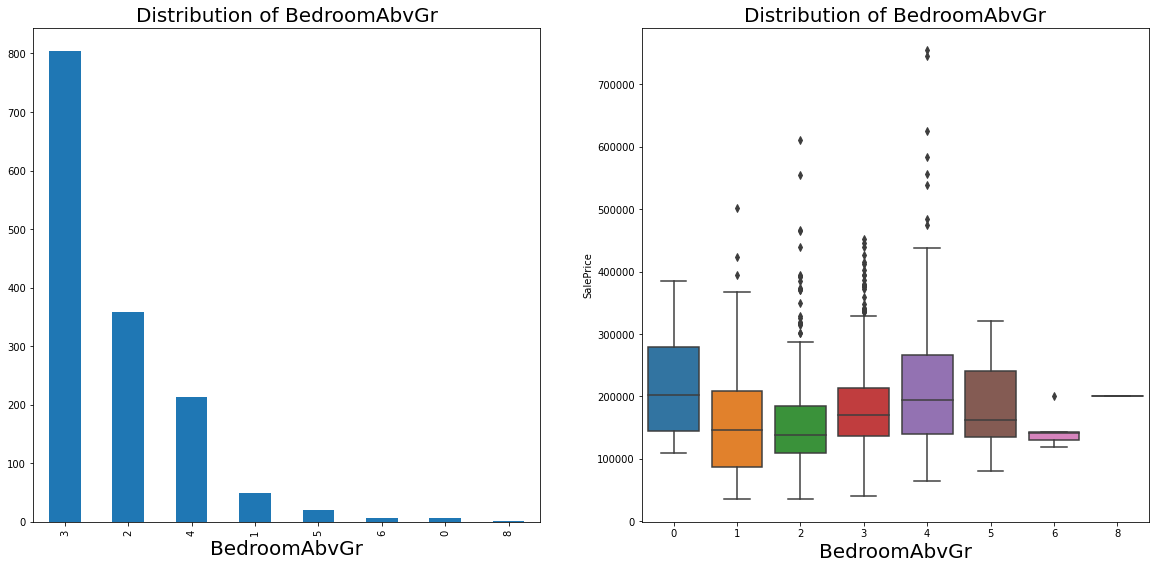

116


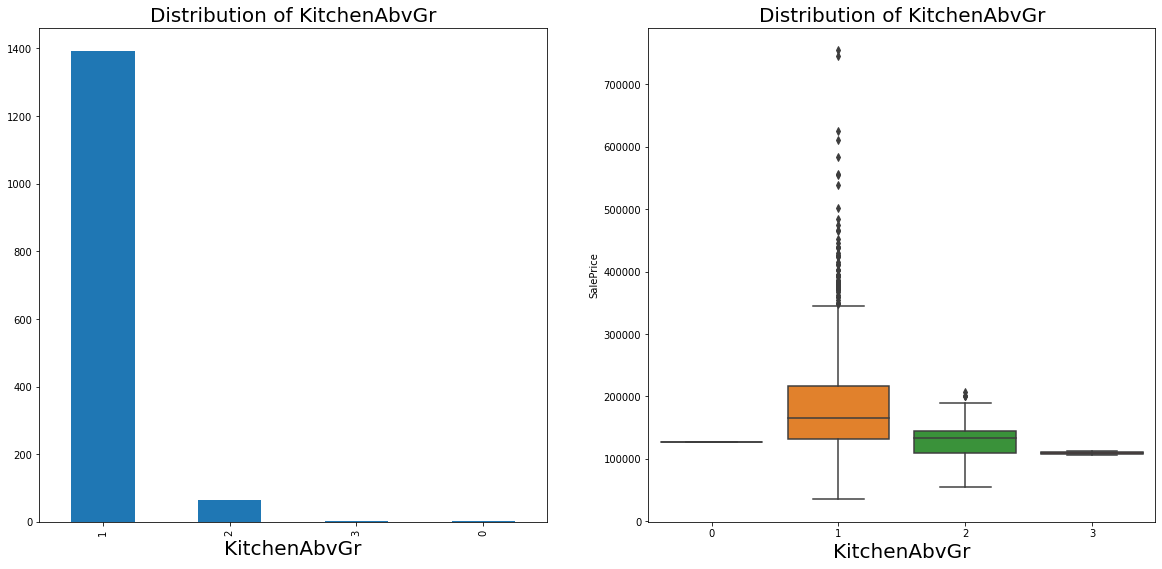

116


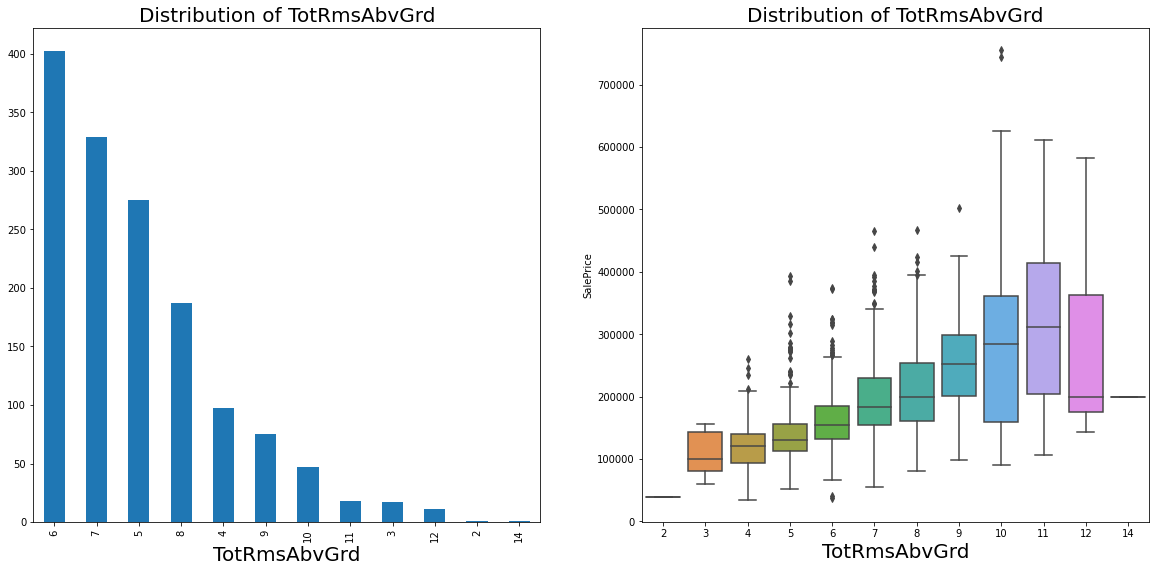

116


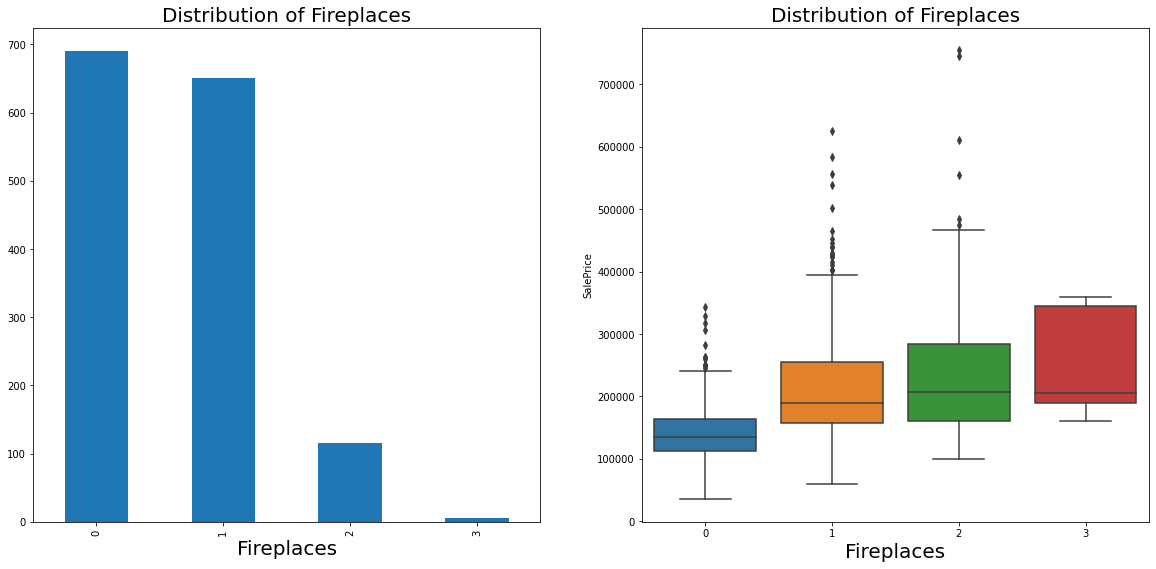

116


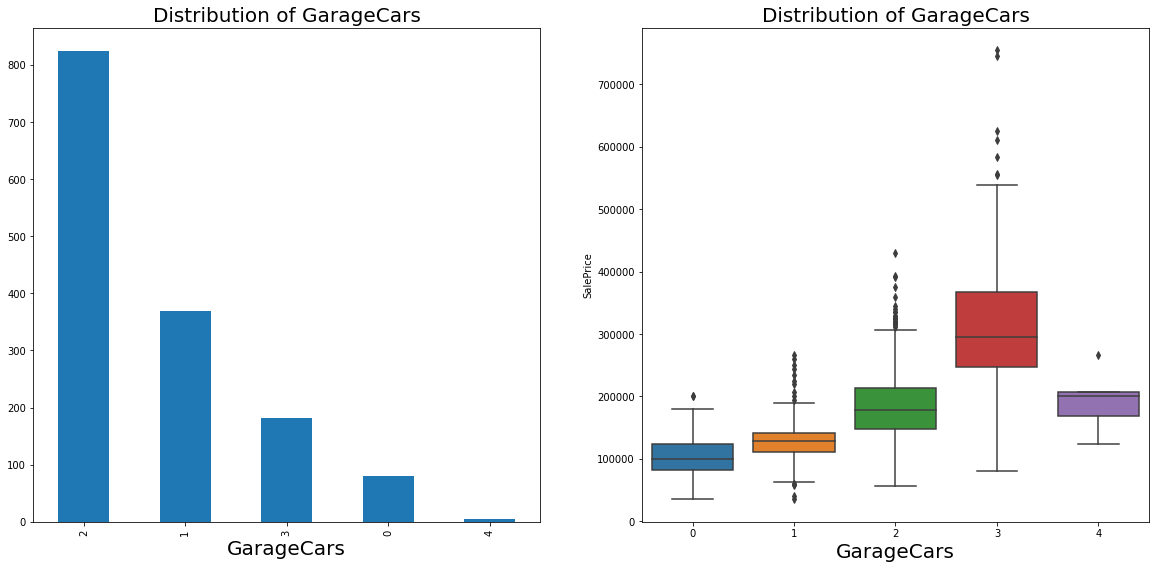

116


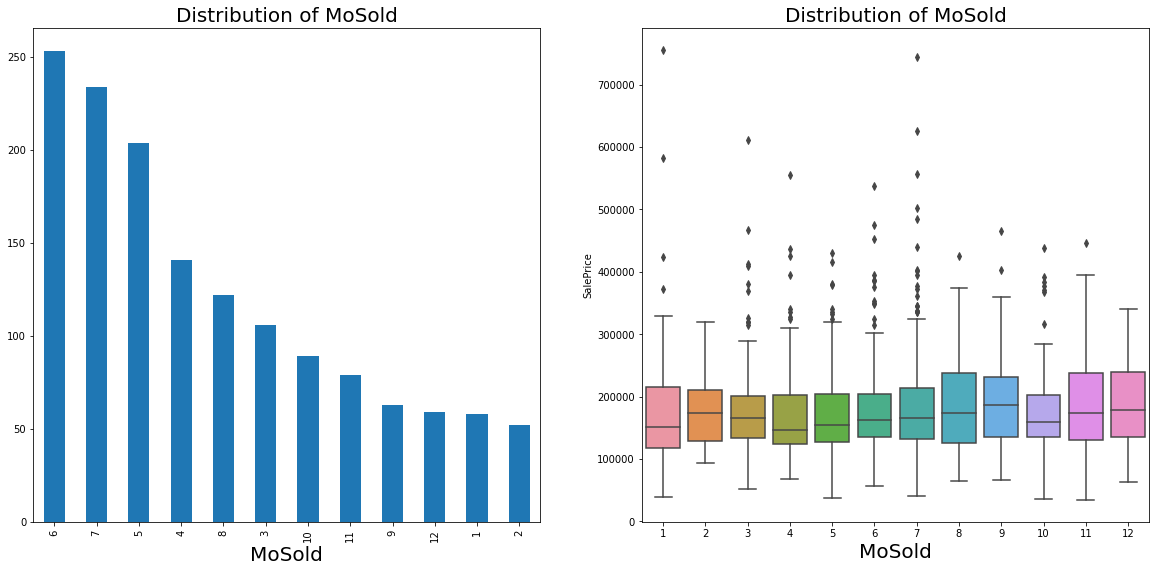

116


In [125]:
# The following code was used to viualise all the columns and identify important patterns. 

for col in num_discrete_cols:
    plt.figure(figsize=(20,20))
    plt.subplot(2,2,1)
    data[col].value_counts().plot(kind='bar')
    plt.xlabel(col,fontsize=20)
    plt.title('Distribution of {}'.format(col),fontsize=20)
    plt.subplot(2,2,2)
    sns.boxplot(y=data['SalePrice'],x=data[col])
    plt.xlabel(col,fontsize=20)
    plt.title('Distribution of {}'.format(col),fontsize=20)
    plt.show()
    print(116)



In [126]:
# Distribution of data in categorical columns in text format 
for col in cat_cols:
    print(col)
    print(data[col].value_counts()*100/len(data))
    print('='*70)

MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Street
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
Alley
No alley access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64
LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411


# EDA of Important variables

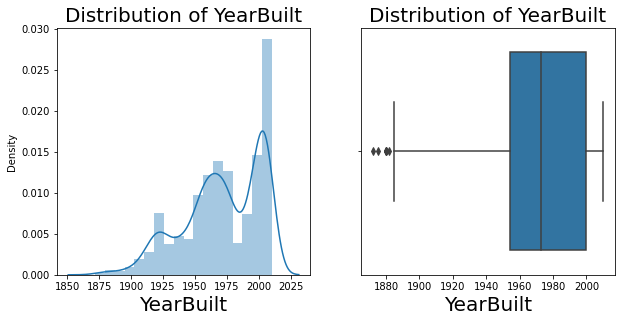

Skewness -0.613461172488183
Kurtosis -0.43955194159361977


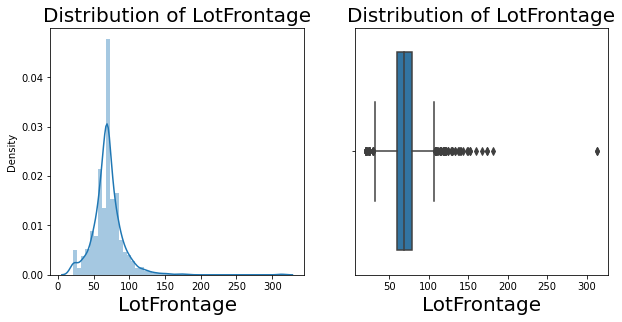

Skewness 2.4091466665496006
Kurtosis 21.91295419680548


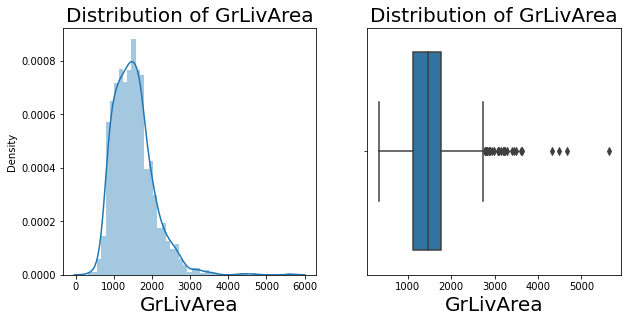

Skewness 1.3665603560164552
Kurtosis 4.895120580693174


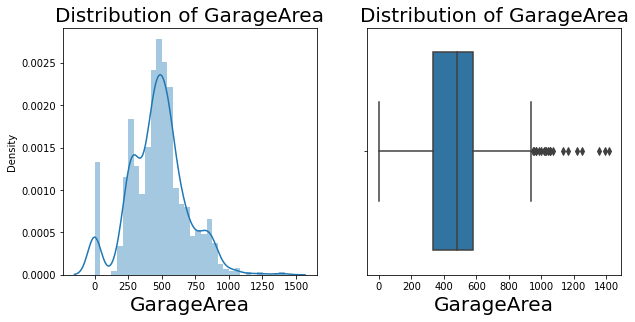

Skewness 0.17998090674623907
Kurtosis 0.9170672022708684


In [127]:
for col in ['YearBuilt','LotFrontage','GrLivArea','GarageArea']:

    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    sns.distplot(x=data[col])
    plt.xlabel(col,fontsize=20)
    plt.title('Distribution of {}'.format(col),fontsize=20)


    plt.subplot(2,2,2)
    sns.boxplot(x=data[col])
    plt.xlabel(col,fontsize=20)
    plt.title('Distribution of {}'.format(col),fontsize=20)
    plt.show()
    print("Skewness",data[col].skew())
    print("Kurtosis",data[col].kurt())
    print('='*116)

> observation 

1. Year built is not normally distributed but rather has 3 local peaks, so this variable can be bucketed. Has few outliers
2. LotFrontAge is highly skewed, contains loutliers, in order to use it for linear regresssion, we can perform log transform on it. 
3. The skewness of GrLivArea is 1.366 indicating positve skewness, to improve model performance we can perform log transformation. Contains few outliers
4. Though GarageArea is not perfectly a normal distribution, the skewness is low and can be considered good for modelling


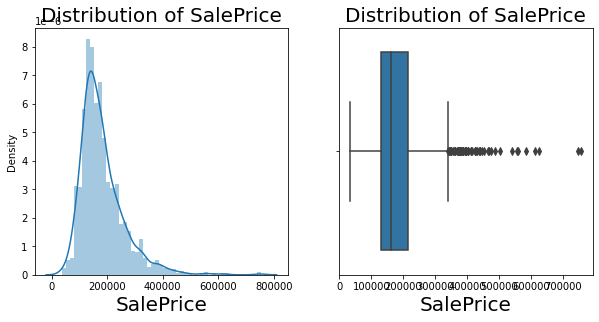

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


In [128]:
col='SalePrice'
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(x=data[col])
plt.xlabel(col,fontsize=20)
plt.title('Distribution of {}'.format(col),fontsize=20)


plt.subplot(2,2,2)
sns.boxplot(x=data[col])
plt.xlabel(col,fontsize=20)
plt.title('Distribution of {}'.format(col),fontsize=20)
plt.show()
print("Skewness",data[col].skew())
print("Kurtosis",data[col].kurt())
print('='*116)

Sale price being the target variable, is of prime importance. It can be seen that it has a positive skew of 1.88. One of the assumption of linear regression is that the target variable is normally distributed. Hence we can perform transformation on the target variable to convert it into a normally distributed variable

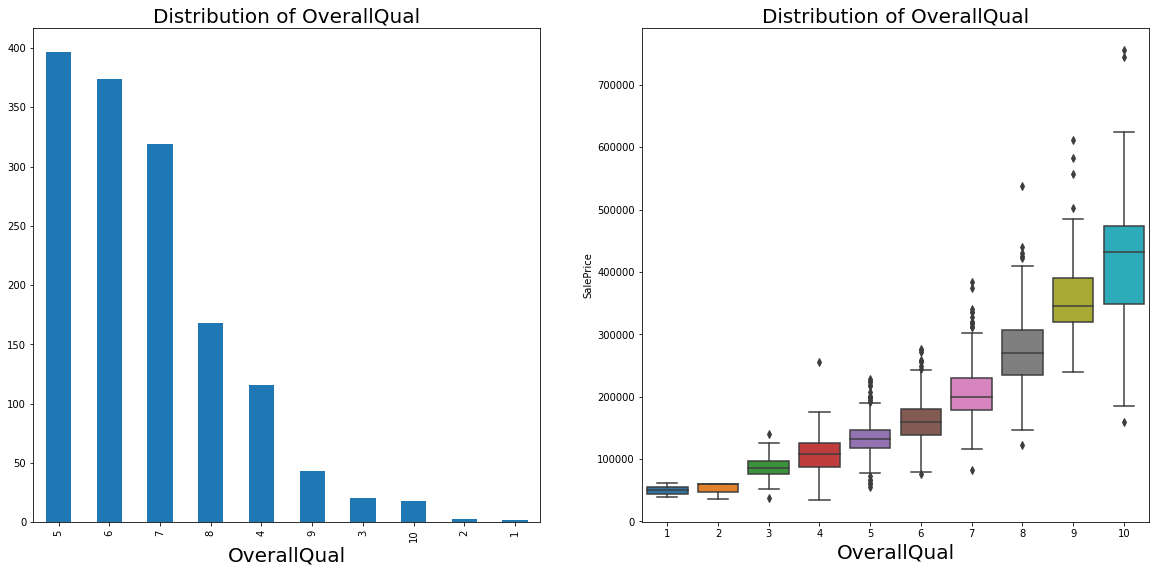

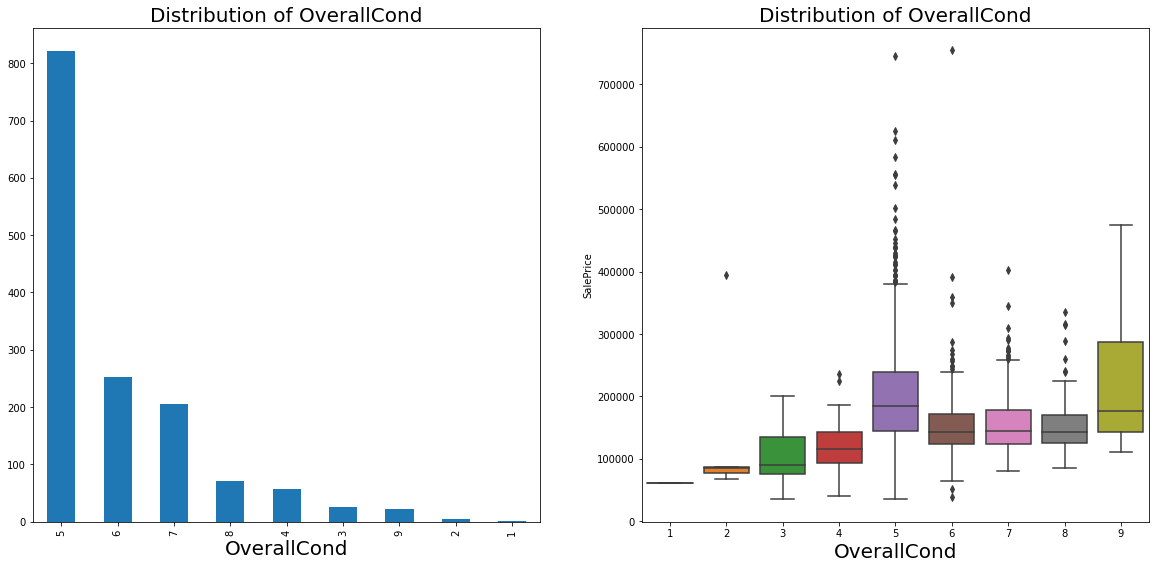

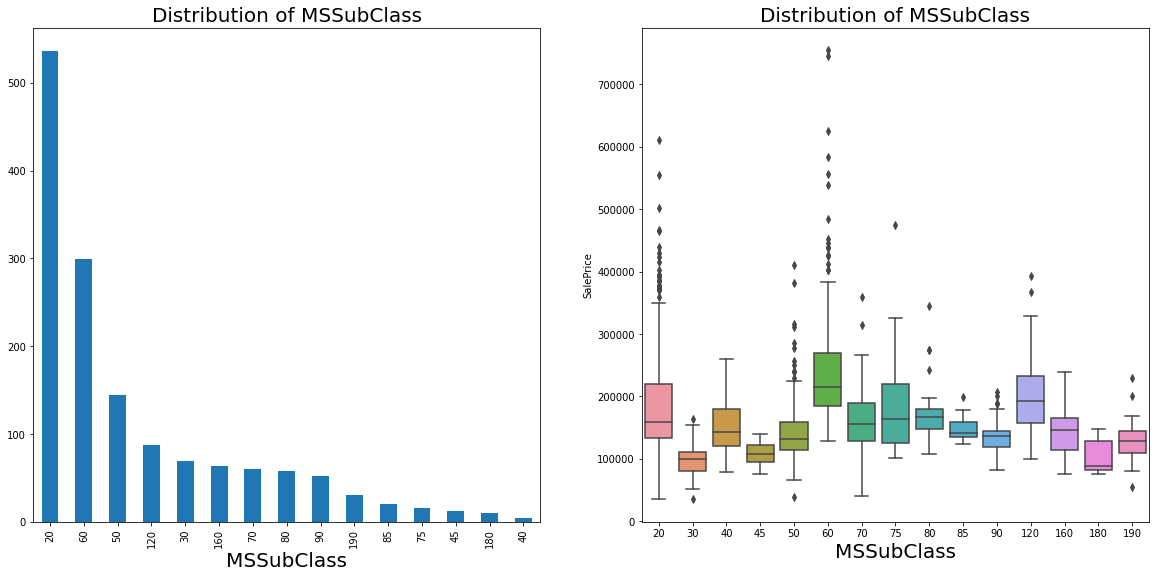

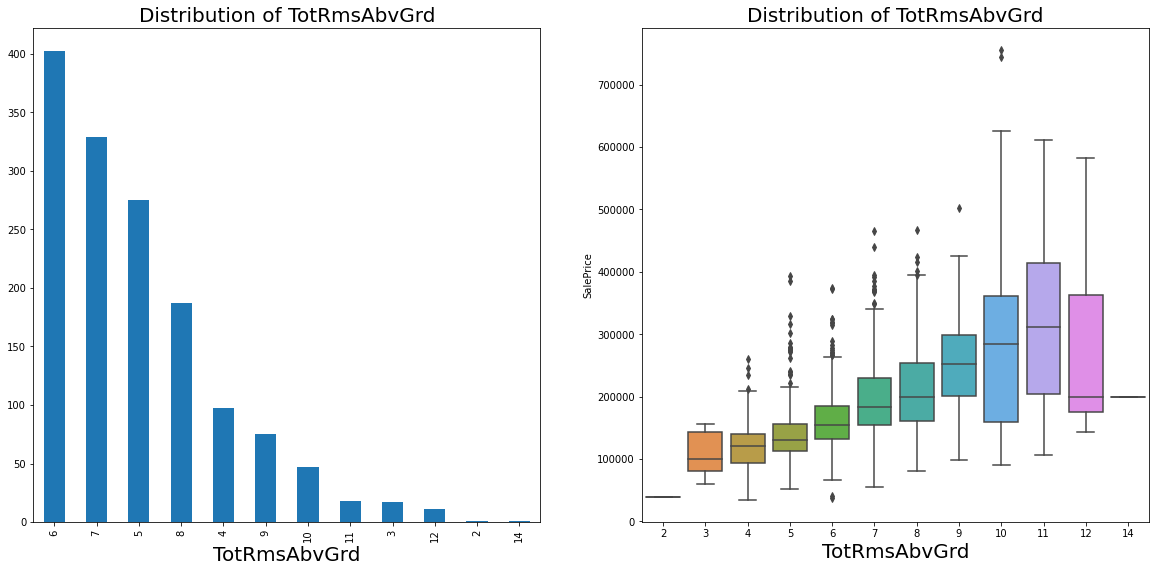

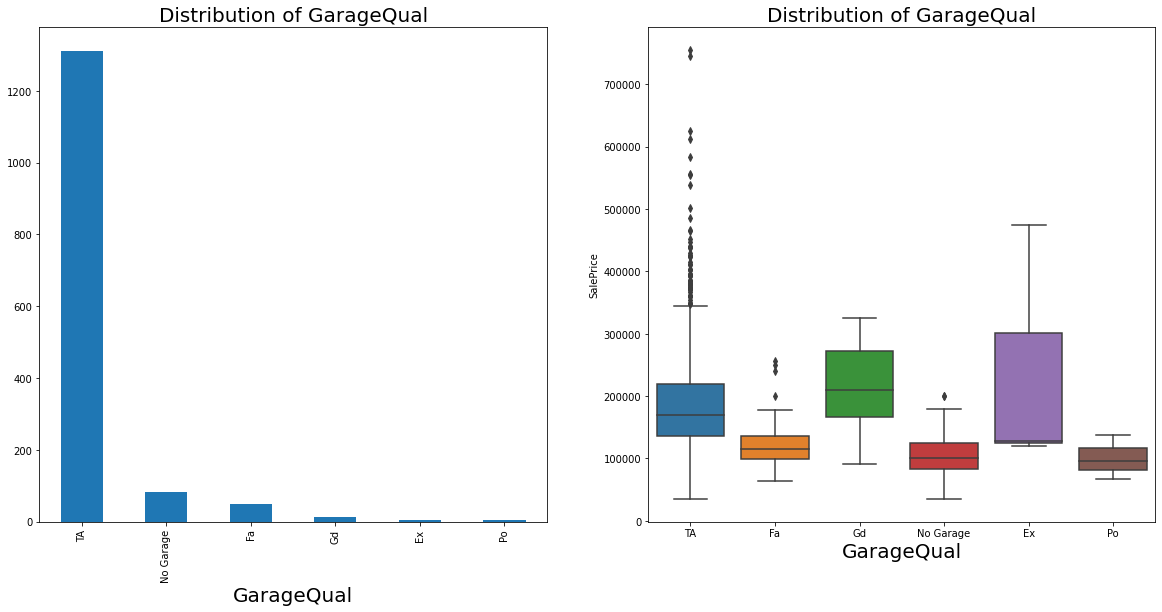

In [129]:
for col in ['OverallQual','OverallCond','MSSubClass','TotRmsAbvGrd','GarageQual']:

    plt.figure(figsize=(20,20))
    plt.subplot(2,2,1)
    data[col].value_counts().plot(kind='bar')
    plt.xlabel(col,fontsize=20)
    plt.title('Distribution of {}'.format(col),fontsize=20)

    plt.subplot(2,2,2)
    sns.boxplot(y=data['SalePrice'],x=data[col])
    plt.xlabel(col,fontsize=20)
    plt.title('Distribution of {}'.format(col),fontsize=20)
    plt.show()
    print('='*116)

> Observation
1. The price of the house increase at an exponential rate of the overall condition. Most of the houses have condition of average to very good
2. Surprisingly, the median price of the house is highest when the overall condition is average and even the number of houses are rated as average more often
3. 2-STORY 1946 & NEWER houses have the median sales price
4. MOst houses have 5-7 rooms aboove ground.
5. Almost all houses have similiar garange mainataince, that is average. 



**Note** 

Identifying columns that do not have varaince in them. That is if a value occurs for more than 90 % of the record, then that column does not help in prediction and thus can be dropped

We also group togethor lables that occur in less than 5 % of the records as others

In [130]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'MSSubClass']

In [131]:
#Identifying columns that do not have varaince in them. 
#That is if a value occurs for more than 85 % of the record, then that column does not help in prediction and thus can be dropped

#We also group togethor lables that occur in less than 5 % of the records as others

cat_cols_to_remove=[]
for col in cat_cols:
    print('*'*20,col)

    if max(data[col].value_counts().values*100/len(data))> 85:
        print('dropping column {} as it has no variance'.format(col) )
        print(data[col].value_counts()*100/len(data))
        data.drop(col,axis=1,inplace=True)
        cat_cols_to_remove.append(col)

    else:
        for val,occ in zip(data[col].value_counts().keys(),data[col].value_counts().values*100/len(data)):
            if  occ < 3:
                data[col]=data[col].replace(val,'other')

******************** MSZoning
******************** Street
dropping column Street as it has no variance
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
******************** Alley
dropping column Alley as it has no variance
No alley access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64
******************** LotShape
******************** LandContour
dropping column LandContour as it has no variance
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
******************** Utilities
dropping column Utilities as it has no variance
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
******************** LotConfig
******************** LandSlope
dropping column LandSlope as it has no variance
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
******************** Neighborhood
******************** Condition1
dropping column Condi

In [132]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice',
       'Age'],
      dtype='object')

In [133]:
print(data.shape)

(1460, 61)


> Observation 

21 columns were dropped because they had no variance

Text(0.5, 1.0, 'GrLivarea vs Sale Price')

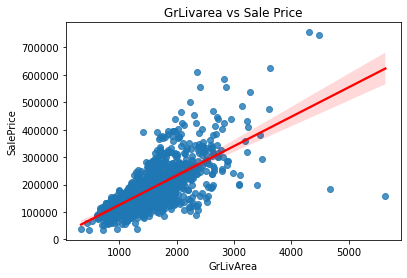

In [134]:
sns.regplot(data=data,x='GrLivArea',y='SalePrice',line_kws={"color": "red"})
plt.title('GrLivarea vs Sale Price')

It appears that SalePrice is linearly dependant on GrLivArea with a positive slope

Text(0.5, 1.0, 'Year built vs Sale Price')

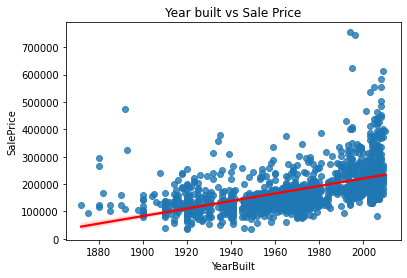

In [135]:
sns.regplot(data=data,x='YearBuilt',y='SalePrice',line_kws={"color": "red"})
plt.title('Year built vs Sale Price')

The year built and sale price are directly proportional indicating that newer houses are more costlier

Text(0.5, 1.0, 'Year YearRemodAdd vs Sale Price')

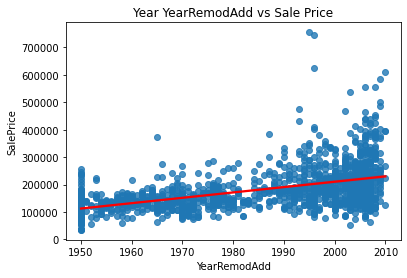

In [136]:
sns.regplot(data=data,x='YearRemodAdd',y='SalePrice',line_kws={"color": "red"})
plt.title('Year YearRemodAdd vs Sale Price')

The year remodelled and sale price are directly proportional indicating that newer houses are more costlier

Text(0.5, 1.0, 'Year built vs Sale Price')

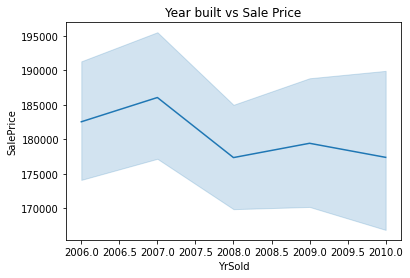

In [137]:
sns.lineplot(data=data,x='YrSold',y=data['SalePrice'])
plt.title('Year built vs Sale Price')

## Correlation

<AxesSubplot:>

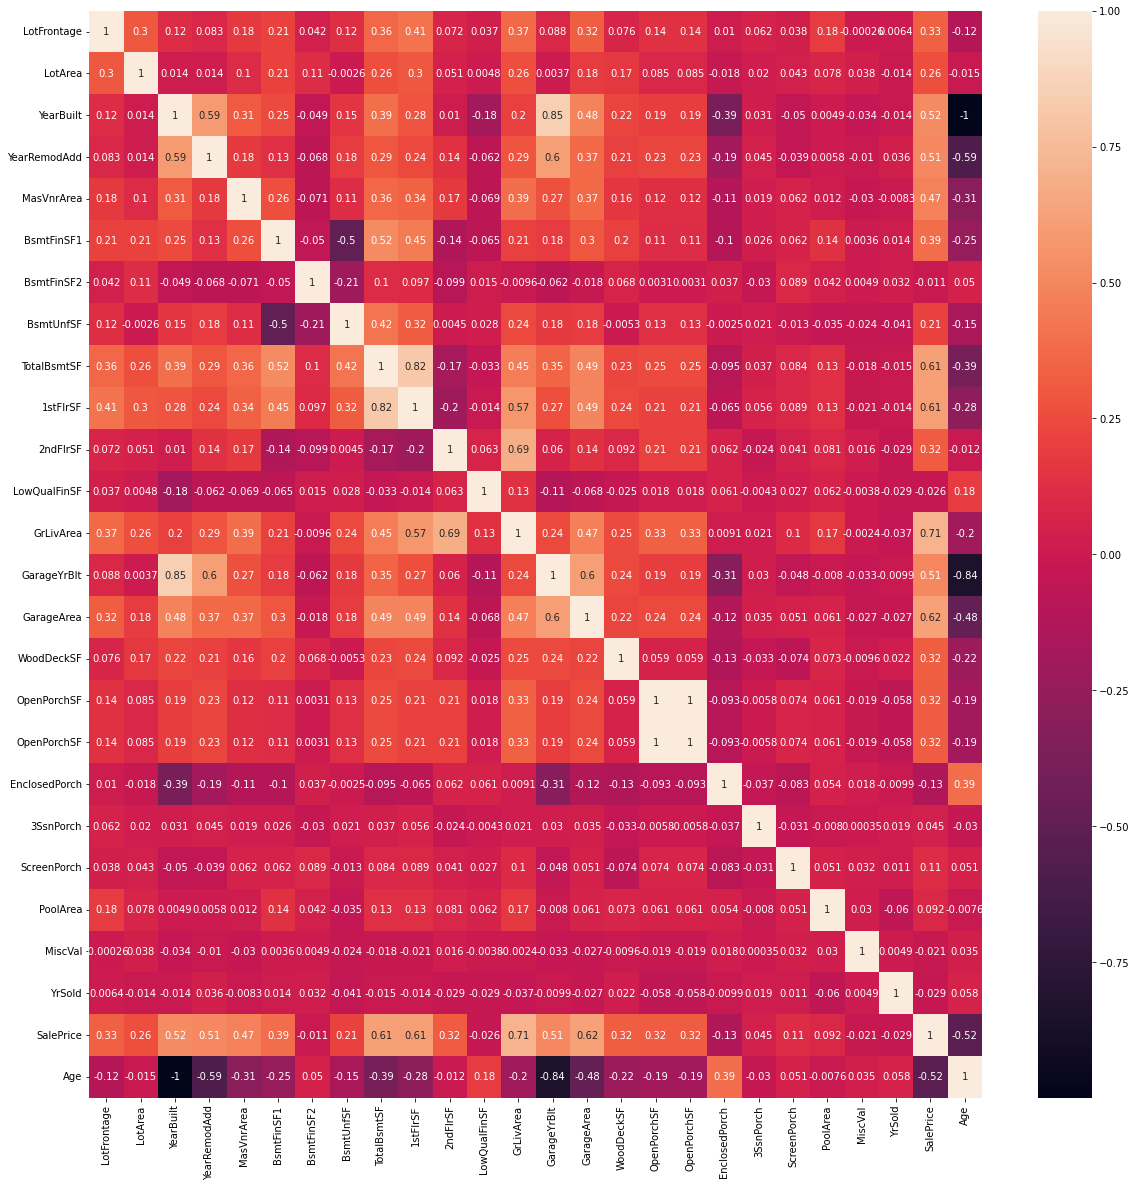

In [138]:
plt.figure(figsize=(20,20))
sns.heatmap(data[num_cont_cols].corr(),annot=True)

In [139]:
# top correlation with target variable
target_corr=data[num_cont_cols].corr().nlargest(10,'SalePrice')['SalePrice']
target_corr


SalePrice       1.000000
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
GarageYrBlt     0.508043
YearRemodAdd    0.507101
MasVnrArea      0.472614
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

## Pairplots


In [140]:
# The following code was used to viualise all the columns and identify important patterns. 
# However, keeping all the graphs would make inferences difficult and the file size too large.
# hence, only the important features are plotted again and observations are explained 

# One could uncomment the below snippet to visualise all graphs 
"""
sns.pairplot(data,x_vars=num_cont_cols,y_vars=num_cont_cols)
"""

'\nsns.pairplot(data,x_vars=num_cont_cols,y_vars=num_cont_cols)\n'

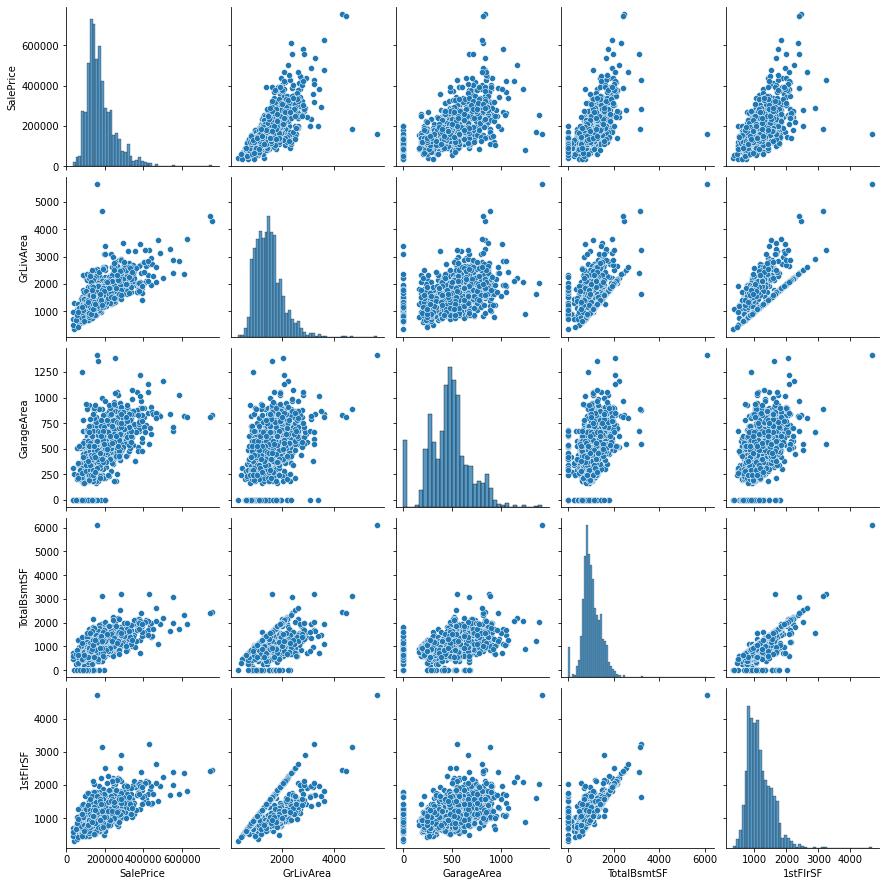

In [141]:
# pair plot for the top 5 variables
sns.pairplot(data,x_vars=target_corr.keys()[:5],y_vars=target_corr.keys()[:5])

# Data preperation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

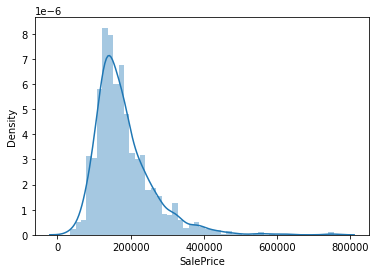

In [142]:
# Distribution of target variable
sns.distplot(data['SalePrice'])

> observation

It can be seen that the target variable is not normally distributed. However, the ML models generally work better on normally distributed variable. Hence we attempt to use other transformations

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

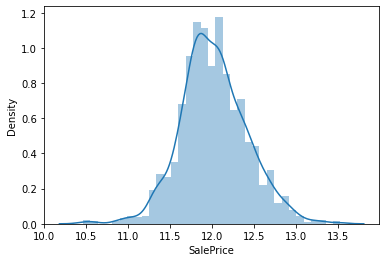

In [143]:
sns.distplot(np.log((data['SalePrice'])))

> Observtion 

It can be seen that the log of the target variable appears to be a better variable than just the price variable. Hence we transform the target variable

In [144]:
data['log_SalePrice']=np.log(data['SalePrice'])
data.drop('SalePrice',axis=1,inplace=True)

In [145]:
data.shape

(1460, 61)

In [146]:
data['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [147]:
data=pd.get_dummies(data,drop_first=True)

In [148]:
data.shape

(1460, 137)

In [149]:
num_cont_cols.remove('SalePrice')

In [150]:
#capping numerical columns to 0.25 and 97.5 percentiles
for col in num_cont_cols:
    lq=data[[col]].quantile(q=2.5/100).values[0]
    hq=data[[col]].quantile(q=97.5/100).values[0]
    data[col].apply(lambda x : lq if x < lq else x )
    data[col].apply(lambda x : hq if x > lq else x )

In [151]:
# creating dependant variables and independent variables
X=data.drop(['Id','log_SalePrice'],axis=1)
y=data['log_SalePrice']

In [152]:
# Splitting into test and train sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [153]:
# scaling numerical columns 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[num_cont_cols]=scaler.fit_transform(X_train[num_cont_cols])
X_test[num_cont_cols]=scaler.transform(X_test[num_cont_cols])


# Model building

In [154]:
X_train.shape

(1022, 135)

In [155]:
X_test.shape

(438, 135)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [157]:
# Using RFECV to determine the number of features to select
linreg=LinearRegression()
rfecv = RFECV(estimator=linreg, cv=5)
rfecv.fit(X_train,y_train)

RFECV(cv=5, estimator=LinearRegression())

In [158]:
print('optimum number of features:',rfecv.n_features_)

optimum number of features: 31


In [159]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
rfe=RFE(mod,n_features_to_select=31)
rfe=rfe.fit(X_train,y_train)

rfe_col=X_train.columns[rfe.support_]
X_train=X_train[rfe_col]
X_test=X_test[rfe_col]

## Simple linear regression 

In [160]:
# here we define a custom function that will help us in fitting a model easily

# Code used from previous assignment
def lin_fit(remove_col,append_col=None):
    try:
        imp_cols.remove(remove_col)
    except Exception as e:
        print(e)
        pass
    if append_col==None:
        pass
    else:
        imp_cols.append(append_col)
    # we use X_train here because we wont be using the fit method on the test data
    X_train_sm = sm.add_constant(X_train[imp_cols])
    lr = sm.OLS(y_train, X_train_sm)
    res= lr.fit()
    y_pred_prob=res.predict(X_train_sm)
    pd.set_option('display.max_rows', 500)
    #metric(y_pred_prob,y_train)
    return lr,res,y_pred_prob

In [161]:
# Custom function to calculate the variance inflation factor6

# Code used from previous assignment
def vi_factor():
    vif = pd.DataFrame()
    vif['Features'] = X_train[imp_cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[imp_cols].values, i) for i in range(X_train[imp_cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [162]:
imp_cols=rfe_col.to_list()

In [163]:
imp_cols

['OverallQual',
 'YearBuilt',
 '1stFlrSF',
 '2ndFlrSF',
 'GarageCars',
 'Age',
 'MSSubClass_30',
 'MSSubClass_160',
 'MSZoning_RM',
 'MSZoning_other',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'BldgType_Duplex',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_other',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtQual_other',
 'BsmtExposure_Gd',
 'BsmtFinType1_Unf',
 'BsmtFinType1_other',
 'HeatingQC_other',
 'GarageType_other',
 'Fence_GdWo']

In [164]:

model_1,result_1,y_pred_prob=lin_fit(remove_col=None,append_col=None)

list.remove(x): x not in list


In [165]:
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     210.5
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:39:52   Log-Likelihood:                 530.99
No. Observations:                1022   AIC:                            -998.0
Df Residuals:                     990   BIC:                            -840.2
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.6321      0.055    209.717      0.000      11.523      11.741
OverallQual              0.0801      0.006     13.509      0.000       0.068       0.092
YearBuilt               -0.0580      0.106     -0.548      0.584      -0.266       0.150
1stFlrSF                 0.1140      0.007     16.993      0.000       0.101       0.127
2ndFlrSF                 0.1040      0.006     18.094      0.000       0.093       0.115
GarageCars               0.0688      0.008      8.154      0.000       0.052       0.085
Age                     -0.1013      0.105     -0.964      0.335      -0.308       0.105
MSSubClass_30           -0.1154      0.025     -4.573      0.000      -0.165      -0.066
MSSubClass_160          -0.1861      0.026     -7.062      0.000      -0.238      -0.134
MSZoning_RM             -0.0914      0.016     -5.651      0.000      -0.123      -0.060
MSZoning_other          -0.2046      0.034     -5.966      0.000      -0.272      -0.137
Neighborhood_Crawfor     0.1538      0.028      5.507      0.000       0.099       0.209
Neighborhood_Edwards    -0.0817      0.019     -4.317      0.000      -0.119      -0.045
Neighborhood_NridgHt     0.0907      0.023      3.867      0.000       0.045       0.137
Neighborhood_Somerst     0.0956      0.023      4.198      0.000       0.051       0.140
BldgType_Duplex         -0.1116      0.026     -4.318      0.000      -0.162      -0.061
Exterior1st_CemntBd     -0.1049      0.038     -2.773      0.006      -0.179      -0.031
Exterior1st_HdBoard     -0.1124      0.030     -3.697      0.000      -0.172      -0.053
Exterior1st_MetalSd     -0.0937      0.030     -3.086      0.002      -0.153      -0.034
Exterior1st_Plywood     -0.0832      0.032     -2.575      0.010      -0.147      -0.020
Exterior1st_VinylSd     -0.0771      0.030     -2.547      0.011      -0.137      -0.018
Exterior1st_Wd Sdng     -0.1246      0.031     -4.059      0.000      -0.185      -0.064
Exterior1st_other       -0.1700      0.034     -5.069      0.000      -0.236      -0.104
BsmtQual_Gd             -0.0675      0.021     -3.283      0.001      -0.108      -0.027
BsmtQual_TA             -0.0889      0.026     -3.446      0.001      -0.140      -0.038
BsmtQual_other          -0.0973      0.041     -2.385      0.017      -0.177      -0.017
BsmtExposure_Gd          0.0884      0.017      5.185      0.000       0.055       0.122
BsmtFinType1_Unf        -0.0795      0.011     -7.139      0.000      -0.101      -0.058
BsmtFinType1_other      -0.1587      0.044     -3.645      0.000      -0.244      -0.073
HeatingQC_other         -0.2954      0.148     -2.002      0.046      -0.585      -0.006
GarageType_other        -0.1105      0.032     -3.402      0.001      -0.174      -0.047
Fence_GdWo              -0.0791      0.026     -2.996    

In [166]:
vi_factor()

Features     VIF
1              YearBuilt  535.92
5                    Age  528.49
0            OverallQual   34.23
4             GarageCars   11.99
19   Exterior1st_VinylSd   10.87
23           BsmtQual_TA    9.71
22           BsmtQual_Gd    6.46
17   Exterior1st_MetalSd    5.43
16   Exterior1st_HdBoard    5.06
20   Exterior1st_Wd Sdng    4.72
24        BsmtQual_other    3.69
18   Exterior1st_Plywood    2.84
21     Exterior1st_other    2.71
27    BsmtFinType1_other    2.54
2               1stFlrSF    2.07
15   Exterior1st_CemntBd    1.98
8            MSZoning_RM    1.88
26      BsmtFinType1_Unf    1.69
12  Neighborhood_NridgHt    1.52
7         MSSubClass_160    1.49
13  Neighborhood_Somerst    1.45
3               2ndFlrSF    1.43
25       BsmtExposure_Gd    1.37
14       BldgType_Duplex    1.30
6          MSSubClass_30    1.28
11  Neighborhood_Edwards    1.26
10  Neighborhood_Crawfor    1.17
9         MSZoning_other    1.10
29      GarageType_other    1.08
30            Fence_GdWo    1.07
28       HeatingQC_other    1.02

In [167]:

model_2,result_2,y_pred_prob=lin_fit(remove_col='YearBuilt',append_col=None)
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     217.7
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:39:52   Log-Likelihood:                 530.83
No. Observations:                1022   AIC:                            -999.7
Df Residuals:                     991   BIC:                            -846.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.6328      0.055    209.859      0.000      11.524      11.742
OverallQual              0.0799      0.006     13.511      0.000       0.068       0.091
1stFlrSF                 0.1141      0.007     17.033      0.000       0.101       0.127
2ndFlrSF                 0.1042      0.006     18.152      0.000       0.093       0.115
GarageCars               0.0688      0.008      8.167      0.000       0.052       0.085
Age                     -0.0440      0.010     -4.426      0.000      -0.063      -0.024
MSSubClass_30           -0.1154      0.025     -4.573      0.000      -0.165      -0.066
MSSubClass_160          -0.1860      0.026     -7.061      0.000      -0.238      -0.134
MSZoning_RM             -0.0909      0.016     -5.631      0.000      -0.123      -0.059
MSZoning_other          -0.2038      0.034     -5.951      0.000      -0.271      -0.137
Neighborhood_Crawfor     0.1551      0.028      5.582      0.000       0.101       0.210
Neighborhood_Edwards    -0.0820      0.019     -4.335      0.000      -0.119      -0.045
Neighborhood_NridgHt     0.0906      0.023      3.863      0.000       0.045       0.137
Neighborhood_Somerst     0.0954      0.023      4.191      0.000       0.051       0.140
BldgType_Duplex         -0.1118      0.026     -4.331      0.000      -0.162      -0.061
Exterior1st_CemntBd     -0.1052      0.038     -2.781      0.006      -0.179      -0.031
Exterior1st_HdBoard     -0.1125      0.030     -3.700      0.000      -0.172      -0.053
Exterior1st_MetalSd     -0.0931      0.030     -3.071      0.002      -0.153      -0.034
Exterior1st_Plywood     -0.0832      0.032     -2.576      0.010      -0.147      -0.020
Exterior1st_VinylSd     -0.0772      0.030     -2.549      0.011      -0.137      -0.018
Exterior1st_Wd Sdng     -0.1238      0.031     -4.039      0.000      -0.184      -0.064
Exterior1st_other       -0.1688      0.033     -5.045      0.000      -0.234      -0.103
BsmtQual_Gd             -0.0674      0.021     -3.280      0.001      -0.108      -0.027
BsmtQual_TA             -0.0885      0.026     -3.434      0.001      -0.139      -0.038
BsmtQual_other          -0.0964      0.041     -2.366      0.018      -0.176      -0.016
BsmtExposure_Gd          0.0888      0.017      5.216      0.000       0.055       0.122
BsmtFinType1_Unf        -0.0792      0.011     -7.126      0.000      -0.101      -0.057
BsmtFinType1_other      -0.1598      0.043     -3.674      0.000      -0.245      -0.074
HeatingQC_other         -0.2940      0.147     -1.993      0.047      -0.583      -0.005
GarageType_other        -0.1107      0.032     -3.410      0.001      -0.174      -0.047
Fence_GdWo              -0.0795      0.026     -3.013      0.003      -0.131      -0.028
=========================================================

In [168]:
vi_factor()

Features    VIF
0            OverallQual  34.00
3             GarageCars  11.98
18   Exterior1st_VinylSd  10.87
22           BsmtQual_TA   9.69
21           BsmtQual_Gd   6.46
16   Exterior1st_MetalSd   5.42
15   Exterior1st_HdBoard   5.06
19   Exterior1st_Wd Sdng   4.70
4                    Age   4.67
23        BsmtQual_other   3.68
17   Exterior1st_Plywood   2.84
20     Exterior1st_other   2.69
26    BsmtFinType1_other   2.54
1               1stFlrSF   2.07
14   Exterior1st_CemntBd   1.98
7            MSZoning_RM   1.88
25      BsmtFinType1_Unf   1.68
11  Neighborhood_NridgHt   1.52
6         MSSubClass_160   1.49
12  Neighborhood_Somerst   1.45
2               2ndFlrSF   1.43
24       BsmtExposure_Gd   1.37
13       BldgType_Duplex   1.30
5          MSSubClass_30   1.28
10  Neighborhood_Edwards   1.26
9   Neighborhood_Crawfor   1.16
8         MSZoning_other   1.09
28      GarageType_other   1.08
29            Fence_GdWo   1.07
27       HeatingQC_other   1.02

In [169]:

model_3,result_3,y_pred_prob=lin_fit(remove_col='HeatingQC_other',append_col=None)
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:39:53   Log-Likelihood:                 528.79
No. Observations:                1022   AIC:                            -997.6
Df Residuals:                     992   BIC:                            -849.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.6344      0.056    209.598      0.000      11.525      11.743
OverallQual              0.0799      0.006     13.488      0.000       0.068       0.091
1stFlrSF                 0.1145      0.007     17.066      0.000       0.101       0.128
2ndFlrSF                 0.1046      0.006     18.199      0.000       0.093       0.116
GarageCars               0.0680      0.008      8.066      0.000       0.051       0.085
Age                     -0.0441      0.010     -4.427      0.000      -0.064      -0.025
MSSubClass_30           -0.1139      0.025     -4.510      0.000      -0.163      -0.064
MSSubClass_160          -0.1845      0.026     -6.998      0.000      -0.236      -0.133
MSZoning_RM             -0.0933      0.016     -5.788      0.000      -0.125      -0.062
MSZoning_other          -0.2039      0.034     -5.944      0.000      -0.271      -0.137
Neighborhood_Crawfor     0.1552      0.028      5.574      0.000       0.101       0.210
Neighborhood_Edwards    -0.0822      0.019     -4.340      0.000      -0.119      -0.045
Neighborhood_NridgHt     0.0907      0.023      3.864      0.000       0.045       0.137
Neighborhood_Somerst     0.0954      0.023      4.183      0.000       0.051       0.140
BldgType_Duplex         -0.1114      0.026     -4.307      0.000      -0.162      -0.061
Exterior1st_CemntBd     -0.1046      0.038     -2.762      0.006      -0.179      -0.030
Exterior1st_HdBoard     -0.1124      0.030     -3.691      0.000      -0.172      -0.053
Exterior1st_MetalSd     -0.0947      0.030     -3.119      0.002      -0.154      -0.035
Exterior1st_Plywood     -0.0834      0.032     -2.578      0.010      -0.147      -0.020
Exterior1st_VinylSd     -0.0771      0.030     -2.542      0.011      -0.137      -0.018
Exterior1st_Wd Sdng     -0.1234      0.031     -4.022      0.000      -0.184      -0.063
Exterior1st_other       -0.1686      0.034     -5.034      0.000      -0.234      -0.103
BsmtQual_Gd             -0.0675      0.021     -3.279      0.001      -0.108      -0.027
BsmtQual_TA             -0.0889      0.026     -3.444      0.001      -0.140      -0.038
BsmtQual_other          -0.0959      0.041     -2.350      0.019      -0.176      -0.016
BsmtExposure_Gd          0.0891      0.017      5.227      0.000       0.056       0.123
BsmtFinType1_Unf        -0.0785      0.011     -7.055      0.000      -0.100      -0.057
BsmtFinType1_other      -0.1602      0.044     -3.677      0.000      -0.246      -0.075
GarageType_other        -0.1103      0.033     -3.390      0.001      -0.174      -0.046
Fence_GdWo              -0.0791      0.026     -2.992      0.003      -0.131      -0.027
==============================================================================
Omnibus:                      680.714   Durbin-Watson:             

In [170]:
vi_factor()

Features    VIF
0            OverallQual  34.00
3             GarageCars  11.96
18   Exterior1st_VinylSd  10.87
22           BsmtQual_TA   9.69
21           BsmtQual_Gd   6.46
16   Exterior1st_MetalSd   5.42
15   Exterior1st_HdBoard   5.06
19   Exterior1st_Wd Sdng   4.70
4                    Age   4.67
23        BsmtQual_other   3.68
17   Exterior1st_Plywood   2.84
20     Exterior1st_other   2.69
26    BsmtFinType1_other   2.54
1               1stFlrSF   2.07
14   Exterior1st_CemntBd   1.98
7            MSZoning_RM   1.87
25      BsmtFinType1_Unf   1.68
11  Neighborhood_NridgHt   1.52
6         MSSubClass_160   1.49
12  Neighborhood_Somerst   1.45
2               2ndFlrSF   1.42
24       BsmtExposure_Gd   1.37
13       BldgType_Duplex   1.30
5          MSSubClass_30   1.27
10  Neighborhood_Edwards   1.26
9   Neighborhood_Crawfor   1.16
8         MSZoning_other   1.09
27      GarageType_other   1.08
28            Fence_GdWo   1.07

In [171]:

model_4,result_4,y_pred_prob=lin_fit(remove_col='BsmtQual_other',append_col=None)
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     231.2
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:39:53   Log-Likelihood:                 525.95
No. Observations:                1022   AIC:                            -993.9
Df Residuals:                     993   BIC:                            -850.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5885      0.052    222.541      0.000      11.486      11.691
OverallQual              0.0821      0.006     14.017      0.000       0.071       0.094
1stFlrSF                 0.1156      0.007     17.243      0.000       0.102       0.129
2ndFlrSF                 0.1052      0.006     18.300      0.000       0.094       0.117
GarageCars               0.0672      0.008      7.963      0.000       0.051       0.084
Age                     -0.0519      0.009     -5.520      0.000      -0.070      -0.033
MSSubClass_30           -0.1124      0.025     -4.444      0.000      -0.162      -0.063
MSSubClass_160          -0.1886      0.026     -7.155      0.000      -0.240      -0.137
MSZoning_RM             -0.0915      0.016     -5.670      0.000      -0.123      -0.060
MSZoning_other          -0.2011      0.034     -5.853      0.000      -0.269      -0.134
Neighborhood_Crawfor     0.1595      0.028      5.728      0.000       0.105       0.214
Neighborhood_Edwards    -0.0804      0.019     -4.240      0.000      -0.118      -0.043
Neighborhood_NridgHt     0.0980      0.023      4.202      0.000       0.052       0.144
Neighborhood_Somerst     0.0968      0.023      4.239      0.000       0.052       0.142
BldgType_Duplex         -0.1125      0.026     -4.343      0.000      -0.163      -0.062
Exterior1st_CemntBd     -0.1008      0.038     -2.659      0.008      -0.175      -0.026
Exterior1st_HdBoard     -0.1125      0.031     -3.688      0.000      -0.172      -0.053
Exterior1st_MetalSd     -0.0922      0.030     -3.034      0.002      -0.152      -0.033
Exterior1st_Plywood     -0.0821      0.032     -2.533      0.011      -0.146      -0.018
Exterior1st_VinylSd     -0.0759      0.030     -2.498      0.013      -0.136      -0.016
Exterior1st_Wd Sdng     -0.1214      0.031     -3.949      0.000      -0.182      -0.061
Exterior1st_other       -0.1660      0.034     -4.947      0.000      -0.232      -0.100
BsmtQual_Gd             -0.0423      0.018     -2.401      0.017      -0.077      -0.008
BsmtQual_TA             -0.0499      0.020     -2.519      0.012      -0.089      -0.011
BsmtExposure_Gd          0.0927      0.017      5.448      0.000       0.059       0.126
BsmtFinType1_Unf        -0.0799      0.011     -7.175      0.000      -0.102      -0.058
BsmtFinType1_other      -0.2166      0.036     -5.946      0.000      -0.288      -0.145
GarageType_other        -0.1092      0.033     -3.349      0.001      -0.173      -0.045
Fence_GdWo              -0.0815      0.026     -3.077      0.002      -0.133      -0.030
==============================================================================
Omnibus:                      675.654   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24376.80

In [172]:
vi_factor()

Features    VIF
0            OverallQual  33.48
3             GarageCars  11.78
18   Exterior1st_VinylSd  10.39
22           BsmtQual_TA   6.48
21           BsmtQual_Gd   5.27
16   Exterior1st_MetalSd   5.23
15   Exterior1st_HdBoard   4.80
19   Exterior1st_Wd Sdng   4.56
4                    Age   3.92
17   Exterior1st_Plywood   2.75
20     Exterior1st_other   2.64
1               1stFlrSF   2.02
14   Exterior1st_CemntBd   1.95
7            MSZoning_RM   1.86
24      BsmtFinType1_Unf   1.68
25    BsmtFinType1_other   1.53
11  Neighborhood_NridgHt   1.48
6         MSSubClass_160   1.48
12  Neighborhood_Somerst   1.45
2               2ndFlrSF   1.38
23       BsmtExposure_Gd   1.36
13       BldgType_Duplex   1.29
5          MSSubClass_30   1.27
10  Neighborhood_Edwards   1.26
9   Neighborhood_Crawfor   1.15
8         MSZoning_other   1.09
26      GarageType_other   1.08
27            Fence_GdWo   1.07

In [173]:

model_5,result_5,y_pred_prob=lin_fit(remove_col='BsmtQual_Gd',append_col=None)
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     238.4
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:39:53   Log-Likelihood:                 522.99
No. Observations:                1022   AIC:                            -990.0
Df Residuals:                     994   BIC:                            -852.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5411      0.048    238.884      0.000      11.446      11.636
OverallQual              0.0827      0.006     14.106      0.000       0.071       0.094
1stFlrSF                 0.1178      0.007     17.680      0.000       0.105       0.131
2ndFlrSF                 0.1055      0.006     18.294      0.000       0.094       0.117
GarageCars               0.0687      0.008      8.145      0.000       0.052       0.085
Age                     -0.0493      0.009     -5.269      0.000      -0.068      -0.031
MSSubClass_30           -0.1100      0.025     -4.339      0.000      -0.160      -0.060
MSSubClass_160          -0.1918      0.026     -7.264      0.000      -0.244      -0.140
MSZoning_RM             -0.0891      0.016     -5.516      0.000      -0.121      -0.057
MSZoning_other          -0.1992      0.034     -5.785      0.000      -0.267      -0.132
Neighborhood_Crawfor     0.1587      0.028      5.689      0.000       0.104       0.213
Neighborhood_Edwards    -0.0780      0.019     -4.111      0.000      -0.115      -0.041
Neighborhood_NridgHt     0.1134      0.022      5.039      0.000       0.069       0.158
Neighborhood_Somerst     0.0995      0.023      4.349      0.000       0.055       0.144
BldgType_Duplex         -0.1150      0.026     -4.430      0.000      -0.166      -0.064
Exterior1st_CemntBd     -0.0942      0.038     -2.486      0.013      -0.169      -0.020
Exterior1st_HdBoard     -0.1072      0.031     -3.513      0.000      -0.167      -0.047
Exterior1st_MetalSd     -0.0863      0.030     -2.841      0.005      -0.146      -0.027
Exterior1st_Plywood     -0.0821      0.033     -2.525      0.012      -0.146      -0.018
Exterior1st_VinylSd     -0.0717      0.030     -2.357      0.019      -0.131      -0.012
Exterior1st_Wd Sdng     -0.1160      0.031     -3.772      0.000      -0.176      -0.056
Exterior1st_other       -0.1595      0.034     -4.756      0.000      -0.225      -0.094
BsmtQual_TA             -0.0154      0.014     -1.126      0.260      -0.042       0.011
BsmtExposure_Gd          0.0979      0.017      5.783      0.000       0.065       0.131
BsmtFinType1_Unf        -0.0794      0.011     -7.117      0.000      -0.101      -0.058
BsmtFinType1_other      -0.1791      0.033     -5.429      0.000      -0.244      -0.114
GarageType_other        -0.1116      0.033     -3.417      0.001      -0.176      -0.047
Fence_GdWo              -0.0810      0.027     -3.052      0.002      -0.133      -0.029
==============================================================================
Omnibus:                      658.955   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22616.955
Skew:                          -2.418   Prob(JB):                         0.00
Kurtosis

In [174]:
vi_factor()

Features    VIF
0            OverallQual  30.04
3             GarageCars  11.77
18   Exterior1st_VinylSd  10.00
16   Exterior1st_MetalSd   5.10
15   Exterior1st_HdBoard   4.66
19   Exterior1st_Wd Sdng   4.47
4                    Age   3.92
21           BsmtQual_TA   3.57
20     Exterior1st_other   2.61
17   Exterior1st_Plywood   2.60
14   Exterior1st_CemntBd   1.92
1               1stFlrSF   1.90
7            MSZoning_RM   1.85
23      BsmtFinType1_Unf   1.68
6         MSSubClass_160   1.48
12  Neighborhood_Somerst   1.44
24    BsmtFinType1_other   1.36
22       BsmtExposure_Gd   1.34
2               2ndFlrSF   1.34
11  Neighborhood_NridgHt   1.32
13       BldgType_Duplex   1.28
5          MSSubClass_30   1.27
10  Neighborhood_Edwards   1.26
9   Neighborhood_Crawfor   1.15
8         MSZoning_other   1.09
25      GarageType_other   1.07
26            Fence_GdWo   1.07

In [175]:

model_6,result_6,y_pred_prob=lin_fit(remove_col='BsmtQual_TA',append_col=None)
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:39:53   Log-Likelihood:                 522.34
No. Observations:                1022   AIC:                            -990.7
Df Residuals:                     995   BIC:                            -857.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5250      0.046    249.796      0.000      11.434      11.616
OverallQual              0.0837      0.006     14.412      0.000       0.072       0.095
1stFlrSF                 0.1174      0.007     17.645      0.000       0.104       0.130
2ndFlrSF                 0.1061      0.006     18.486      0.000       0.095       0.117
GarageCars               0.0695      0.008      8.269      0.000       0.053       0.086
Age                     -0.0534      0.009     -6.194      0.000      -0.070      -0.036
MSSubClass_30           -0.1078      0.025     -4.267      0.000      -0.157      -0.058
MSSubClass_160          -0.1942      0.026     -7.380      0.000      -0.246      -0.143
MSZoning_RM             -0.0879      0.016     -5.455      0.000      -0.120      -0.056
MSZoning_other          -0.1981      0.034     -5.754      0.000      -0.266      -0.131
Neighborhood_Crawfor     0.1612      0.028      5.795      0.000       0.107       0.216
Neighborhood_Edwards    -0.0774      0.019     -4.077      0.000      -0.115      -0.040
Neighborhood_NridgHt     0.1135      0.022      5.043      0.000       0.069       0.158
Neighborhood_Somerst     0.1013      0.023      4.439      0.000       0.057       0.146
BldgType_Duplex         -0.1162      0.026     -4.479      0.000      -0.167      -0.065
Exterior1st_CemntBd     -0.0928      0.038     -2.448      0.015      -0.167      -0.018
Exterior1st_HdBoard     -0.1071      0.031     -3.509      0.000      -0.167      -0.047
Exterior1st_MetalSd     -0.0861      0.030     -2.835      0.005      -0.146      -0.027
Exterior1st_Plywood     -0.0801      0.032     -2.468      0.014      -0.144      -0.016
Exterior1st_VinylSd     -0.0699      0.030     -2.301      0.022      -0.129      -0.010
Exterior1st_Wd Sdng     -0.1149      0.031     -3.738      0.000      -0.175      -0.055
Exterior1st_other       -0.1584      0.034     -4.725      0.000      -0.224      -0.093
BsmtExposure_Gd          0.0996      0.017      5.910      0.000       0.067       0.133
BsmtFinType1_Unf        -0.0785      0.011     -7.051      0.000      -0.100      -0.057
BsmtFinType1_other      -0.1669      0.031     -5.354      0.000      -0.228      -0.106
GarageType_other        -0.1093      0.033     -3.353      0.001      -0.173      -0.045
Fence_GdWo              -0.0835      0.026     -3.158      0.002      -0.135      -0.032
==============================================================================
Omnibus:                      660.822   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22808.124
Skew:                          -2.426   Prob(JB):                         0.00
Kurtosis:                      25.629   Cond. No.                         118.
==================

In [176]:
vi_factor()

Features    VIF
0            OverallQual  29.67
3             GarageCars  11.77
18   Exterior1st_VinylSd   9.77
16   Exterior1st_MetalSd   4.90
15   Exterior1st_HdBoard   4.46
19   Exterior1st_Wd Sdng   4.37
4                    Age   2.97
20     Exterior1st_other   2.57
17   Exterior1st_Plywood   2.55
1               1stFlrSF   1.89
14   Exterior1st_CemntBd   1.89
7            MSZoning_RM   1.84
22      BsmtFinType1_Unf   1.67
6         MSSubClass_160   1.46
12  Neighborhood_Somerst   1.42
21       BsmtExposure_Gd   1.32
11  Neighborhood_NridgHt   1.31
13       BldgType_Duplex   1.27
5          MSSubClass_30   1.27
10  Neighborhood_Edwards   1.26
2               2ndFlrSF   1.26
23    BsmtFinType1_other   1.26
9   Neighborhood_Crawfor   1.14
8         MSZoning_other   1.09
24      GarageType_other   1.07
25            Fence_GdWo   1.06

In [177]:
model_7,result_7,y_pred_prob=lin_fit(remove_col='Exterior1st_VinylSd',append_col=None)
result_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:40:19   Log-Likelihood:                 519.63
No. Observations:                1022   AIC:                            -987.3
Df Residuals:                     996   BIC:                            -859.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4629      0.038    305.553      0.000      11.389      11.537
OverallQual              0.0840      0.006     14.442      0.000       0.073       0.095
1stFlrSF                 0.1197      0.007     18.156      0.000       0.107       0.133
2ndFlrSF                 0.1047      0.006     18.308      0.000       0.094       0.116
GarageCars               0.0693      0.008      8.223      0.000       0.053       0.086
Age                     -0.0484      0.008     -5.789      0.000      -0.065      -0.032
MSSubClass_30           -0.1091      0.025     -4.310      0.000      -0.159      -0.059
MSSubClass_160          -0.1862      0.026     -7.123      0.000      -0.238      -0.135
MSZoning_RM             -0.0917      0.016     -5.704      0.000      -0.123      -0.060
MSZoning_other          -0.2030      0.034     -5.895      0.000      -0.271      -0.135
Neighborhood_Crawfor     0.1634      0.028      5.863      0.000       0.109       0.218
Neighborhood_Edwards    -0.0807      0.019     -4.257      0.000      -0.118      -0.044
Neighborhood_NridgHt     0.1084      0.022      4.832      0.000       0.064       0.152
Neighborhood_Somerst     0.0996      0.023      4.358      0.000       0.055       0.144
BldgType_Duplex         -0.1147      0.026     -4.415      0.000      -0.166      -0.064
Exterior1st_CemntBd     -0.0299      0.026     -1.135      0.257      -0.081       0.022
Exterior1st_HdBoard     -0.0463      0.015     -3.023      0.003      -0.076      -0.016
Exterior1st_MetalSd     -0.0261      0.016     -1.672      0.095      -0.057       0.005
Exterior1st_Plywood     -0.0219      0.020     -1.075      0.282      -0.062       0.018
Exterior1st_Wd Sdng     -0.0572      0.018     -3.211      0.001      -0.092      -0.022
Exterior1st_other       -0.1014      0.023     -4.482      0.000      -0.146      -0.057
BsmtExposure_Gd          0.1009      0.017      5.974      0.000       0.068       0.134
BsmtFinType1_Unf        -0.0794      0.011     -7.123      0.000      -0.101      -0.058
BsmtFinType1_other      -0.1594      0.031     -5.131      0.000      -0.220      -0.098
GarageType_other        -0.1063      0.033     -3.258      0.001      -0.170      -0.042
Fence_GdWo              -0.0829      0.026     -3.129      0.002      -0.135      -0.031
==============================================================================
Omnibus:                      662.674   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23011.639
Skew:                          -2.435   Prob(JB):                         0.00
Kurtosis:                      25.731   Cond. No.                         59.2
==============================================================================

Notes:
[1] Standard Errors 

In [178]:
vi_factor()

Features    VIF
0            OverallQual  14.69
3             GarageCars  11.41
4                    Age   2.97
18   Exterior1st_Wd Sdng   2.01
16   Exterior1st_MetalSd   1.87
7            MSZoning_RM   1.83
21      BsmtFinType1_Unf   1.66
15   Exterior1st_HdBoard   1.64
1               1stFlrSF   1.54
19     Exterior1st_other   1.48
6         MSSubClass_160   1.45
12  Neighborhood_Somerst   1.42
17   Exterior1st_Plywood   1.39
11  Neighborhood_NridgHt   1.31
20       BsmtExposure_Gd   1.31
5          MSSubClass_30   1.27
13       BldgType_Duplex   1.26
22    BsmtFinType1_other   1.26
10  Neighborhood_Edwards   1.22
2               2ndFlrSF   1.21
14   Exterior1st_CemntBd   1.16
9   Neighborhood_Crawfor   1.14
8         MSZoning_other   1.08
23      GarageType_other   1.07
24            Fence_GdWo   1.06

In [179]:

model_8,result_8,y_pred_prob=lin_fit(remove_col='Exterior1st_Plywood',append_col=None)
result_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     266.6
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:40:49   Log-Likelihood:                 519.04
No. Observations:                1022   AIC:                            -988.1
Df Residuals:                     997   BIC:                            -864.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4555      0.037    310.609      0.000      11.383      11.528
OverallQual              0.0845      0.006     14.566      0.000       0.073       0.096
1stFlrSF                 0.1192      0.007     18.126      0.000       0.106       0.132
2ndFlrSF                 0.1049      0.006     18.339      0.000       0.094       0.116
GarageCars               0.0691      0.008      8.202      0.000       0.053       0.086
Age                     -0.0501      0.008     -6.086      0.000      -0.066      -0.034
MSSubClass_30           -0.1079      0.025     -4.266      0.000      -0.158      -0.058
MSSubClass_160          -0.1910      0.026     -7.411      0.000      -0.242      -0.140
MSZoning_RM             -0.0890      0.016     -5.604      0.000      -0.120      -0.058
MSZoning_other          -0.2021      0.034     -5.870      0.000      -0.270      -0.135
Neighborhood_Crawfor     0.1643      0.028      5.900      0.000       0.110       0.219
Neighborhood_Edwards    -0.0789      0.019     -4.177      0.000      -0.116      -0.042
Neighborhood_NridgHt     0.1108      0.022      4.959      0.000       0.067       0.155
Neighborhood_Somerst     0.1012      0.023      4.437      0.000       0.056       0.146
BldgType_Duplex         -0.1176      0.026     -4.551      0.000      -0.168      -0.067
Exterior1st_CemntBd     -0.0267      0.026     -1.022      0.307      -0.078       0.025
Exterior1st_HdBoard     -0.0412      0.015     -2.829      0.005      -0.070      -0.013
Exterior1st_MetalSd     -0.0212      0.015     -1.418      0.157      -0.050       0.008
Exterior1st_Wd Sdng     -0.0520      0.017     -3.032      0.002      -0.086      -0.018
Exterior1st_other       -0.0961      0.022     -4.352      0.000      -0.139      -0.053
BsmtExposure_Gd          0.0978      0.017      5.876      0.000       0.065       0.130
BsmtFinType1_Unf        -0.0786      0.011     -7.067      0.000      -0.100      -0.057
BsmtFinType1_other      -0.1592      0.031     -5.124      0.000      -0.220      -0.098
GarageType_other        -0.1080      0.033     -3.313      0.001      -0.172      -0.044
Fence_GdWo              -0.0827      0.026     -3.120      0.002      -0.135      -0.031
==============================================================================
Omnibus:                      660.439   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22716.658
Skew:                          -2.426   Prob(JB):                         0.00
Kurtosis:                      25.582   Cond. No.                         58.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [180]:
vi_factor()

Features    VIF
0            OverallQual  14.23
3             GarageCars  11.35
4                    Age   2.77
17   Exterior1st_Wd Sdng   1.87
7            MSZoning_RM   1.78
16   Exterior1st_MetalSd   1.73
20      BsmtFinType1_Unf   1.66
1               1stFlrSF   1.54
15   Exterior1st_HdBoard   1.51
18     Exterior1st_other   1.41
12  Neighborhood_Somerst   1.40
6         MSSubClass_160   1.40
11  Neighborhood_NridgHt   1.29
19       BsmtExposure_Gd   1.28
5          MSSubClass_30   1.26
21    BsmtFinType1_other   1.26
13       BldgType_Duplex   1.23
10  Neighborhood_Edwards   1.21
2               2ndFlrSF   1.19
14   Exterior1st_CemntBd   1.15
9   Neighborhood_Crawfor   1.14
8         MSZoning_other   1.08
22      GarageType_other   1.07
23            Fence_GdWo   1.06

In [181]:
#using all the 20 important columns given by RFE
model_9,result_9,y_pred_prob=lin_fit(remove_col='Exterior1st_CemntBd',append_col=None)
result_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     278.1
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:40:58   Log-Likelihood:                 518.50
No. Observations:                1022   AIC:                            -989.0
Df Residuals:                     998   BIC:                            -870.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4522      0.037    311.743      0.000      11.380      11.524
OverallQual              0.0847      0.006     14.603      0.000       0.073       0.096
1stFlrSF                 0.1184      0.007     18.123      0.000       0.106       0.131
2ndFlrSF                 0.1048      0.006     18.329      0.000       0.094       0.116
GarageCars               0.0696      0.008      8.276      0.000       0.053       0.086
Age                     -0.0499      0.008     -6.061      0.000      -0.066      -0.034
MSSubClass_30           -0.1072      0.025     -4.239      0.000      -0.157      -0.058
MSSubClass_160          -0.1920      0.026     -7.458      0.000      -0.243      -0.142
MSZoning_RM             -0.0922      0.016     -5.916      0.000      -0.123      -0.062
MSZoning_other          -0.2024      0.034     -5.880      0.000      -0.270      -0.135
Neighborhood_Crawfor     0.1619      0.028      5.834      0.000       0.107       0.216
Neighborhood_Edwards    -0.0792      0.019     -4.195      0.000      -0.116      -0.042
Neighborhood_NridgHt     0.1102      0.022      4.937      0.000       0.066       0.154
Neighborhood_Somerst     0.0987      0.023      4.353      0.000       0.054       0.143
BldgType_Duplex         -0.1164      0.026     -4.509      0.000      -0.167      -0.066
Exterior1st_HdBoard     -0.0396      0.014     -2.733      0.006      -0.068      -0.011
Exterior1st_MetalSd     -0.0189      0.015     -1.283      0.200      -0.048       0.010
Exterior1st_Wd Sdng     -0.0497      0.017     -2.923      0.004      -0.083      -0.016
Exterior1st_other       -0.0940      0.022     -4.275      0.000      -0.137      -0.051
BsmtExposure_Gd          0.0976      0.017      5.865      0.000       0.065       0.130
BsmtFinType1_Unf        -0.0784      0.011     -7.045      0.000      -0.100      -0.057
BsmtFinType1_other      -0.1588      0.031     -5.112      0.000      -0.220      -0.098
GarageType_other        -0.1071      0.033     -3.285      0.001      -0.171      -0.043
Fence_GdWo              -0.0832      0.026     -3.140      0.002      -0.135      -0.031
==============================================================================
Omnibus:                      664.217   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23058.176
Skew:                          -2.443   Prob(JB):                         0.00
Kurtosis:                      25.751   Cond. No.                         57.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
vi_factor()

Features    VIF
0            OverallQual  14.09
3             GarageCars  11.34
4                    Age   2.77
16   Exterior1st_Wd Sdng   1.84
7            MSZoning_RM   1.72
15   Exterior1st_MetalSd   1.70
19      BsmtFinType1_Unf   1.66
1               1stFlrSF   1.53
14   Exterior1st_HdBoard   1.49
17     Exterior1st_other   1.40
6         MSSubClass_160   1.40
12  Neighborhood_Somerst   1.39
11  Neighborhood_NridgHt   1.29
18       BsmtExposure_Gd   1.28
5          MSSubClass_30   1.26
20    BsmtFinType1_other   1.26
13       BldgType_Duplex   1.23
10  Neighborhood_Edwards   1.21
2               2ndFlrSF   1.19
9   Neighborhood_Crawfor   1.13
8         MSZoning_other   1.08
21      GarageType_other   1.07
22            Fence_GdWo   1.06

In [183]:
#using all the 20 important columns given by RFE
model_10,result_10,y_pred_prob=lin_fit(remove_col='Exterior1st_MetalSd',append_col=None)
result_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     290.5
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:41:03   Log-Likelihood:                 517.66
No. Observations:                1022   AIC:                            -989.3
Df Residuals:                     999   BIC:                            -875.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4464      0.036    313.855      0.000      11.375      11.518
OverallQual              0.0846      0.006     14.580      0.000       0.073       0.096
1stFlrSF                 0.1190      0.007     18.247      0.000       0.106       0.132
2ndFlrSF                 0.1052      0.006     18.420      0.000       0.094       0.116
GarageCars               0.0700      0.008      8.321      0.000       0.053       0.086
Age                     -0.0533      0.008     -6.871      0.000      -0.069      -0.038
MSSubClass_30           -0.1066      0.025     -4.214      0.000      -0.156      -0.057
MSSubClass_160          -0.1957      0.026     -7.646      0.000      -0.246      -0.145
MSZoning_RM             -0.0906      0.016     -5.834      0.000      -0.121      -0.060
MSZoning_other          -0.2030      0.034     -5.897      0.000      -0.271      -0.135
Neighborhood_Crawfor     0.1623      0.028      5.848      0.000       0.108       0.217
Neighborhood_Edwards    -0.0803      0.019     -4.255      0.000      -0.117      -0.043
Neighborhood_NridgHt     0.1086      0.022      4.871      0.000       0.065       0.152
Neighborhood_Somerst     0.0953      0.023      4.230      0.000       0.051       0.140
BldgType_Duplex         -0.1183      0.026     -4.586      0.000      -0.169      -0.068
Exterior1st_HdBoard     -0.0338      0.014     -2.455      0.014      -0.061      -0.007
Exterior1st_Wd Sdng     -0.0410      0.016     -2.630      0.009      -0.072      -0.010
Exterior1st_other       -0.0856      0.021     -4.077      0.000      -0.127      -0.044
BsmtExposure_Gd          0.0981      0.017      5.899      0.000       0.065       0.131
BsmtFinType1_Unf        -0.0773      0.011     -6.969      0.000      -0.099      -0.056
BsmtFinType1_other      -0.1562      0.031     -5.037      0.000      -0.217      -0.095
GarageType_other        -0.1056      0.033     -3.241      0.001      -0.170      -0.042
Fence_GdWo              -0.0839      0.026     -3.165      0.002      -0.136      -0.032
==============================================================================
Omnibus:                      668.709   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23852.447
Skew:                          -2.459   Prob(JB):                         0.00
Kurtosis:                      26.150   Cond. No.                         57.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
vi_factor()

Features    VIF
0            OverallQual  13.14
3             GarageCars  11.34
4                    Age   2.32
7            MSZoning_RM   1.71
18      BsmtFinType1_Unf   1.65
15   Exterior1st_Wd Sdng   1.56
1               1stFlrSF   1.50
6         MSSubClass_160   1.38
12  Neighborhood_Somerst   1.38
14   Exterior1st_HdBoard   1.36
11  Neighborhood_NridgHt   1.29
16     Exterior1st_other   1.28
17       BsmtExposure_Gd   1.28
5          MSSubClass_30   1.26
19    BsmtFinType1_other   1.26
13       BldgType_Duplex   1.22
10  Neighborhood_Edwards   1.20
2               2ndFlrSF   1.17
9   Neighborhood_Crawfor   1.13
8         MSZoning_other   1.08
20      GarageType_other   1.07
21            Fence_GdWo   1.05

In [185]:

model_11,result_11,y_pred_prob=lin_fit(remove_col='Exterior1st_HdBoard',append_col=None)
result_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     302.5
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:41:07   Log-Likelihood:                 514.59
No. Observations:                1022   AIC:                            -985.2
Df Residuals:                    1000   BIC:                            -876.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4365      0.036    314.714      0.000      11.365      11.508
OverallQual              0.0843      0.006     14.501      0.000       0.073       0.096
1stFlrSF                 0.1198      0.007     18.342      0.000       0.107       0.133
2ndFlrSF                 0.1058      0.006     18.482      0.000       0.095       0.117
GarageCars               0.0709      0.008      8.421      0.000       0.054       0.087
Age                     -0.0545      0.008     -7.021      0.000      -0.070      -0.039
MSSubClass_30           -0.1024      0.025     -4.048      0.000      -0.152      -0.053
MSSubClass_160          -0.2013      0.026     -7.876      0.000      -0.251      -0.151
MSZoning_RM             -0.0861      0.015     -5.568      0.000      -0.116      -0.056
MSZoning_other          -0.1967      0.034     -5.714      0.000      -0.264      -0.129
Neighborhood_Crawfor     0.1671      0.028      6.022      0.000       0.113       0.222
Neighborhood_Edwards    -0.0764      0.019     -4.052      0.000      -0.113      -0.039
Neighborhood_NridgHt     0.1150      0.022      5.177      0.000       0.071       0.159
Neighborhood_Somerst     0.1038      0.022      4.650      0.000       0.060       0.148
BldgType_Duplex         -0.1184      0.026     -4.580      0.000      -0.169      -0.068
Exterior1st_Wd Sdng     -0.0342      0.015     -2.222      0.027      -0.064      -0.004
Exterior1st_other       -0.0795      0.021     -3.800      0.000      -0.120      -0.038
BsmtExposure_Gd          0.0996      0.017      5.979      0.000       0.067       0.132
BsmtFinType1_Unf        -0.0740      0.011     -6.700      0.000      -0.096      -0.052
BsmtFinType1_other      -0.1522      0.031     -4.900      0.000      -0.213      -0.091
GarageType_other        -0.1070      0.033     -3.277      0.001      -0.171      -0.043
Fence_GdWo              -0.0836      0.027     -3.149      0.002      -0.136      -0.032
==============================================================================
Omnibus:                      668.203   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24129.319
Skew:                          -2.452   Prob(JB):                         0.00
Kurtosis:                      26.293   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
vi_factor()

Features    VIF
0            OverallQual  12.30
3             GarageCars  11.33
4                    Age   2.28
7            MSZoning_RM   1.68
17      BsmtFinType1_Unf   1.62
14   Exterior1st_Wd Sdng   1.51
1               1stFlrSF   1.48
6         MSSubClass_160   1.37
12  Neighborhood_Somerst   1.34
16       BsmtExposure_Gd   1.28
15     Exterior1st_other   1.26
5          MSSubClass_30   1.26
11  Neighborhood_NridgHt   1.26
18    BsmtFinType1_other   1.25
13       BldgType_Duplex   1.22
10  Neighborhood_Edwards   1.20
2               2ndFlrSF   1.15
9   Neighborhood_Crawfor   1.12
8         MSZoning_other   1.08
19      GarageType_other   1.07
20            Fence_GdWo   1.05

In [187]:

model_12,result_12,y_pred_prob=lin_fit(remove_col='Exterior1st_Wd Sdng',append_col=None)
result_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     316.1
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:41:13   Log-Likelihood:                 512.07
No. Observations:                1022   AIC:                            -982.1
Df Residuals:                    1001   BIC:                            -878.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.4378      0.036    314.168      0.000      11.366      11.509
OverallQual              0.0834      0.006     14.351      0.000       0.072       0.095
1stFlrSF                 0.1196      0.007     18.276      0.000       0.107       0.132
2ndFlrSF                 0.1062      0.006     18.535      0.000       0.095       0.117
GarageCars               0.0708      0.008      8.395      0.000       0.054       0.087
Age                     -0.0602      0.007     -8.191      0.000      -0.075      -0.046
MSSubClass_30           -0.1048      0.025     -4.140      0.000      -0.155      -0.055
MSSubClass_160          -0.1992      0.026     -7.783      0.000      -0.249      -0.149
MSZoning_RM             -0.0869      0.015     -5.612      0.000      -0.117      -0.057
MSZoning_other          -0.1940      0.034     -5.630      0.000      -0.262      -0.126
Neighborhood_Crawfor     0.1642      0.028      5.910      0.000       0.110       0.219
Neighborhood_Edwards    -0.0783      0.019     -4.151      0.000      -0.115      -0.041
Neighborhood_NridgHt     0.1156      0.022      5.195      0.000       0.072       0.159
Neighborhood_Somerst     0.1032      0.022      4.615      0.000       0.059       0.147
BldgType_Duplex         -0.1160      0.026     -4.483      0.000      -0.167      -0.065
Exterior1st_other       -0.0685      0.020     -3.365      0.001      -0.108      -0.029
BsmtExposure_Gd          0.0997      0.017      5.971      0.000       0.067       0.132
BsmtFinType1_Unf        -0.0758      0.011     -6.867      0.000      -0.097      -0.054
BsmtFinType1_other      -0.1523      0.031     -4.895      0.000      -0.213      -0.091
GarageType_other        -0.1078      0.033     -3.294      0.001      -0.172      -0.044
Fence_GdWo              -0.0847      0.027     -3.184      0.001      -0.137      -0.033
==============================================================================
Omnibus:                      670.560   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24316.994
Skew:                          -2.464   Prob(JB):                         0.00
Kurtosis:                      26.383   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
vi_factor()

Features    VIF
0            OverallQual  12.09
3             GarageCars  11.33
4                    Age   1.99
7            MSZoning_RM   1.68
16      BsmtFinType1_Unf   1.61
1               1stFlrSF   1.48
6         MSSubClass_160   1.37
12  Neighborhood_Somerst   1.34
15       BsmtExposure_Gd   1.28
5          MSSubClass_30   1.26
11  Neighborhood_NridgHt   1.26
17    BsmtFinType1_other   1.25
13       BldgType_Duplex   1.22
10  Neighborhood_Edwards   1.20
14     Exterior1st_other   1.19
2               2ndFlrSF   1.15
9   Neighborhood_Crawfor   1.12
8         MSZoning_other   1.08
18      GarageType_other   1.07
19            Fence_GdWo   1.05

In [189]:
model_13,result_13,y_pred_prob=lin_fit(remove_col='OverallQual',append_col=None)
result_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     267.3
Date:                Sat, 02 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:41:18   Log-Likelihood:                 416.47
No. Observations:                1022   AIC:                            -792.9
Df Residuals:                    1002   BIC:                            -694.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.9060      0.018    671.621      0.000      11.871      11.941
1stFlrSF                 0.1601      0.006     24.724      0.000       0.147       0.173
2ndFlrSF                 0.1416      0.006     24.950      0.000       0.131       0.153
GarageCars               0.0873      0.009      9.517      0.000       0.069       0.105
Age                     -0.1022      0.007    -13.802      0.000      -0.117      -0.088
MSSubClass_30           -0.1109      0.028     -3.992      0.000      -0.165      -0.056
MSSubClass_160          -0.2115      0.028     -7.533      0.000      -0.267      -0.156
MSZoning_RM             -0.0615      0.017     -3.644      0.000      -0.095      -0.028
MSZoning_other          -0.2054      0.038     -5.430      0.000      -0.280      -0.131
Neighborhood_Crawfor     0.2126      0.030      7.025      0.000       0.153       0.272
Neighborhood_Edwards    -0.1072      0.021     -5.206      0.000      -0.148      -0.067
Neighborhood_NridgHt     0.1939      0.024      8.191      0.000       0.147       0.240
Neighborhood_Somerst     0.1548      0.024      6.389      0.000       0.107       0.202
BldgType_Duplex         -0.1945      0.028     -7.006      0.000      -0.249      -0.140
Exterior1st_other       -0.0514      0.022     -2.303      0.021      -0.095      -0.008
BsmtExposure_Gd          0.1280      0.018      7.031      0.000       0.092       0.164
BsmtFinType1_Unf        -0.0627      0.012     -5.200      0.000      -0.086      -0.039
BsmtFinType1_other      -0.2142      0.034     -6.333      0.000      -0.281      -0.148
GarageType_other        -0.1526      0.036     -4.268      0.000      -0.223      -0.082
Fence_GdWo              -0.1091      0.029     -3.742      0.000      -0.166      -0.052
==============================================================================
Omnibus:                      617.282   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19889.221
Skew:                          -2.211   Prob(JB):                         0.00
Kurtosis:                      24.154   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
vi_factor()

Features   VIF
2             GarageCars  2.33
3                    Age  1.99
6            MSZoning_RM  1.65
15      BsmtFinType1_Unf  1.58
0               1stFlrSF  1.47
5         MSSubClass_160  1.36
11  Neighborhood_Somerst  1.33
4          MSSubClass_30  1.26
14       BsmtExposure_Gd  1.26
16    BsmtFinType1_other  1.25
10  Neighborhood_NridgHt  1.25
12       BldgType_Duplex  1.22
13     Exterior1st_other  1.18
9   Neighborhood_Edwards  1.16
1               2ndFlrSF  1.15
8   Neighborhood_Crawfor  1.10
7         MSZoning_other  1.06
17      GarageType_other  1.06
18            Fence_GdWo  1.05

In [201]:
X_train=X_train[imp_cols]
X_test=X_test[imp_cols]

In [202]:
# Building simple linear regression model
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

<AxesSubplot:xlabel='1', ylabel='0'>

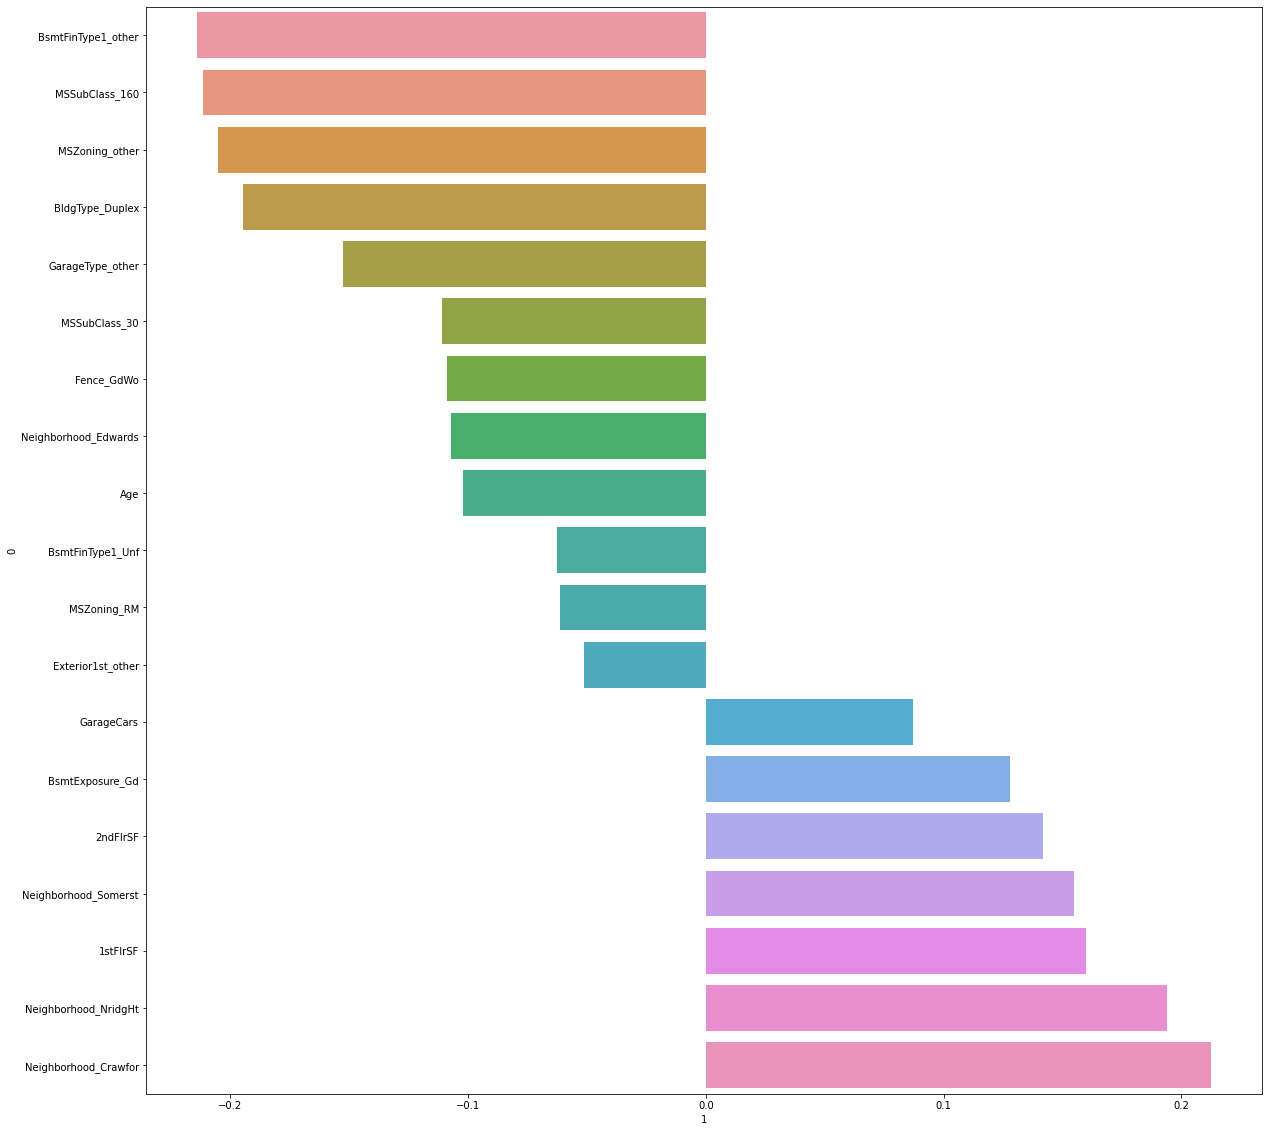

In [203]:
temp=[]
for col,val in zip(imp_cols,reg.coef_):
    temp.append([col,val])
feature_importance=(sorted(temp,key=lambda x: x[1]))
feature_importance=pd.DataFrame(feature_importance)
plt.figure(figsize=(20,20))
sns.barplot(x=feature_importance[1],y=feature_importance[0])

## Ridge

In [204]:
# Building simple Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error


ridge_reg=Ridge(alpha=0.05)
ridge_reg.fit(X_train,y_train)

print(' r sqaured score on training set:',r2_score(y_train, ridge_reg.predict(X_train)))
print(' r sqaured score on test set:',r2_score(y_test, ridge_reg.predict(X_test)))

 r sqaured score on training set: 0.8352072982332247
 r sqaured score on test set: 0.8231426872342908


In [205]:
# grid search for ridge
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


params = {'alpha': [ 0.1, 0.2, 0.3, 0.5,  0.7,1.0, 2.0, 4.0, 5.0, 7.0, 10.0, 20,50,100,500 ]}

ridge = Ridge()


# cross validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

print(model_cv.best_params_)



Fitting 7 folds for each of 15 candidates, totalling 105 fits
{'alpha': 1.0}


In [206]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004081      0.002632         0.002322        0.001419         0.1   
1       0.001648      0.000043         0.001084        0.000025         0.2   
2       0.001691      0.000061         0.001213        0.000251         0.3   
3       0.001661      0.000033         0.001101        0.000031         0.5   
4       0.001629      0.000009         0.001077        0.000009         0.7   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.1}           0.856471           0.854648           0.673506   
1  {'alpha': 0.2}           0.856562           0.854775           0.673426   
2  {'alpha': 0.3}           0.856650           0.854898           0.673345   
3  {'alpha': 0.5}           0.856818           0.855137           0.673182   
4  {'alpha': 0.7}           0.856976           0.855363           0.673019   

   split3_test_score  ...  rank_test_score  split0_train_score  \
0           0.839241  ...                7            0.830890   
1           0.839153  ...                5            0.830887   
2           0.839063  ...                4            0.830883   
3           0.838876  ...                3            0.830868   
4           0.838680  ...                2            0.830847   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.830783            0.858354            0.833186   
1            0.830780            0.858351            0.833183   
2            0.830776            0.858347            0.833178   
3            0.830761            0.858335            0.833163   
4            0.830740            0.858316            0.833141   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.849111            0.825516            0.826766   
1            0.849108            0.825513            0.826764   
2            0.849104            0.825508            0.826760   
3            0.849090            0.825492            0.826748   
4            0.849069            0.825469            0.826729   

   mean_train_score  std_train_score  
0          0.836372         0.011508  
1          0.836369         0.011508  
2          0.836365         0.011508  
3          0.836351         0.011509  
4          0.836330         0.011510  

[5 rows x 25 columns]

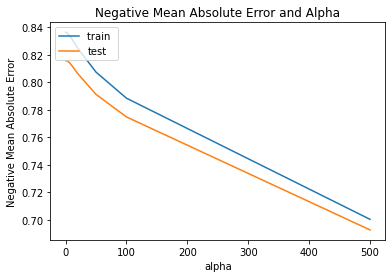

In [208]:


# Plot Mean test and Train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")

# Plotting
plt.plot(cv_results['param_alpha'], cv_results["mean_train_score"])
plt.plot(cv_results['param_alpha'], cv_results["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train ', 'test'], loc="upper left")
plt.show()

In [210]:
# grid search for ridge
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


params = {'alpha': np.linspace(0.1,2,15)}

ridge = Ridge()


# cross validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

print(model_cv.best_params_)

Fitting 7 folds for each of 15 candidates, totalling 105 fits
{'alpha': 1.05}


In [229]:
# Building simple Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error


ridge_reg=Ridge(alpha=1.05)
ridge_reg.fit(X_train,y_train)

print(' r sqaured score on training set:',r2_score(y_train, ridge_reg.predict(X_train)))
print(' r sqaured score on test set:',r2_score(y_test, ridge_reg.predict(X_test)))

 r sqaured score on training set: 0.835138392713896
 r sqaured score on test set: 0.823292006072371


<AxesSubplot:xlabel='1', ylabel='0'>

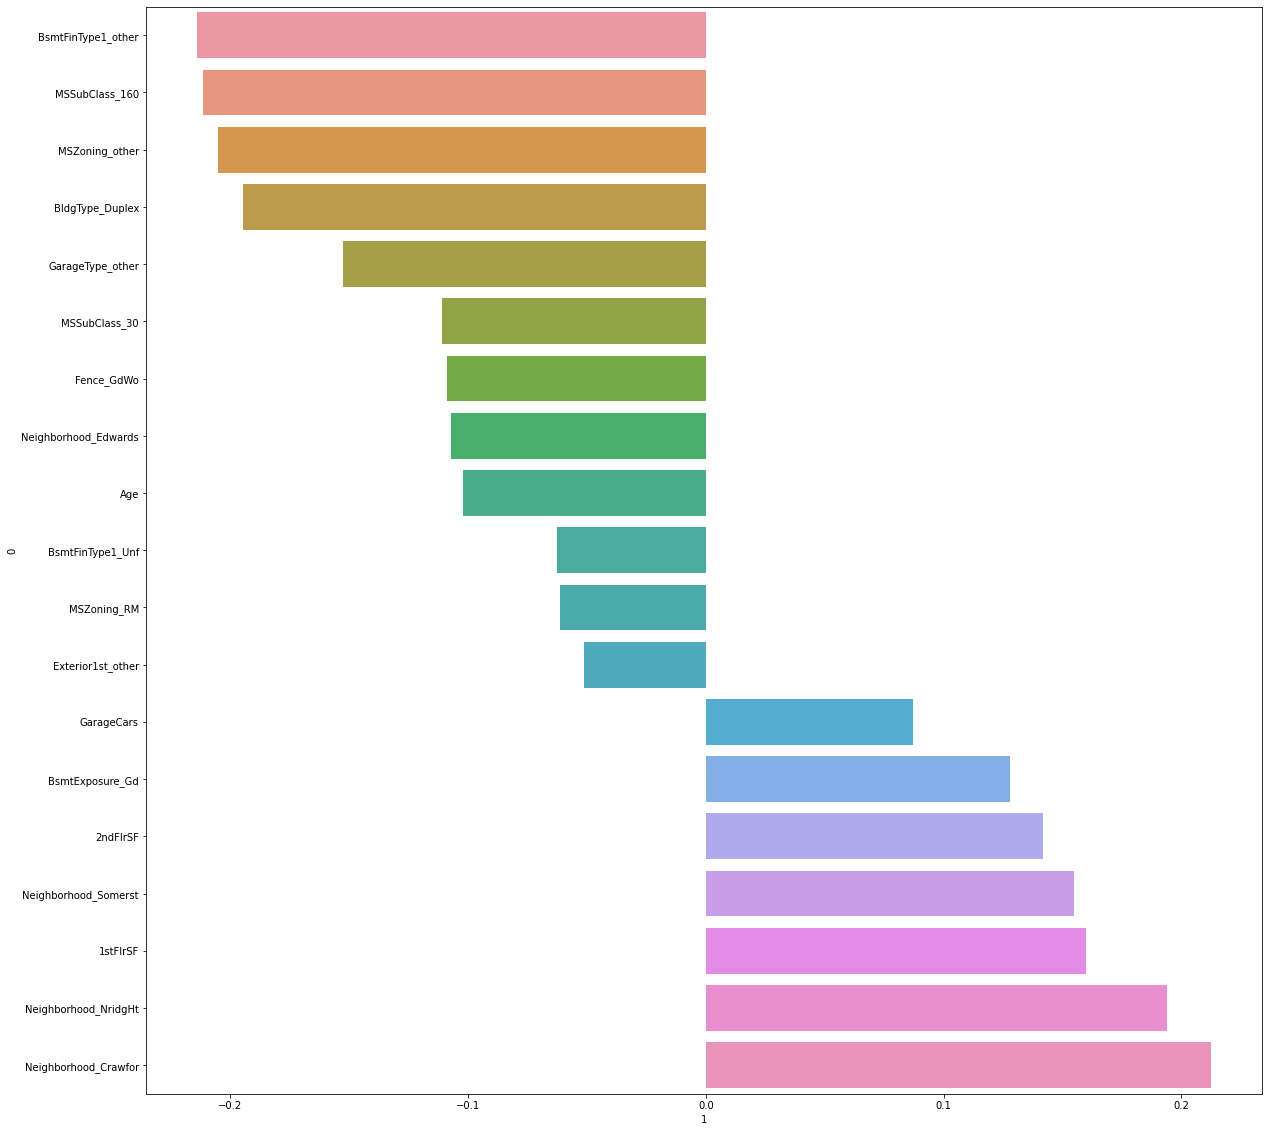

In [230]:
temp=[]
for col,val in zip(imp_cols,reg.coef_):
    temp.append([col,val])
feature_importance=(sorted(temp,key=lambda x: x[1]))
feature_importance=pd.DataFrame(feature_importance)
plt.figure(figsize=(20,20))
sns.barplot(x=feature_importance[1],y=feature_importance[0])

## Lasso

In [231]:
# Building simple Ridge regression model
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error


lasso_reg=Lasso(alpha=0.01)
lasso_reg.fit(X_train,y_train)

print(' r sqaured score on training set:',r2_score(y_train, lasso_reg.predict(X_train)))
print(' r sqaured score on test set:',r2_score(y_test, lasso_reg.predict(X_test)))

 r sqaured score on training set: 0.7460840173860446
 r sqaured score on test set: 0.7567243045968806


In [232]:
# grid search for lasso
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting


from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.5,0.75,1]}

lasso = Lasso()


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

print(model_cv.best_params_)
print(model_cv.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'alpha': 0.0001}
0.8198999836389348


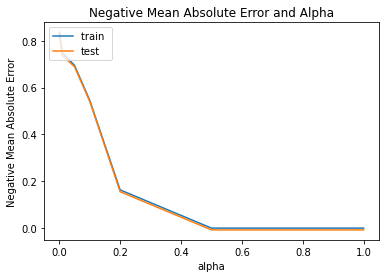

In [233]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


# Plot Mean test and Train scores with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype("float")

# Plotting
plt.plot(cv_results['param_alpha'], cv_results["mean_train_score"])
plt.plot(cv_results['param_alpha'], cv_results["mean_test_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean Absolute Error")

plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train ', 'test'], loc="upper left")
plt.show()

In [234]:
# grid search for lasso
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting


from sklearn.model_selection import GridSearchCV
params = {'alpha': np.linspace(0.00005,0.002,20)}

lasso = Lasso()


# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

print(model_cv.best_params_)
print(model_cv.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'alpha': 5e-05}
0.8199281393040391


In [235]:
# Building simple Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error


lasso_reg=Lasso(alpha=0.00005)
lasso_reg.fit(X_train,y_train)

print(' r sqaured score on training set:',r2_score(y_train, lasso_reg.predict(X_train)))
print(' r sqaured score on test set:',r2_score(y_test, lasso_reg.predict(X_test)))

 r sqaured score on training set: 0.8352015908716233
 r sqaured score on test set: 0.8232547964157981


<AxesSubplot:xlabel='1', ylabel='0'>

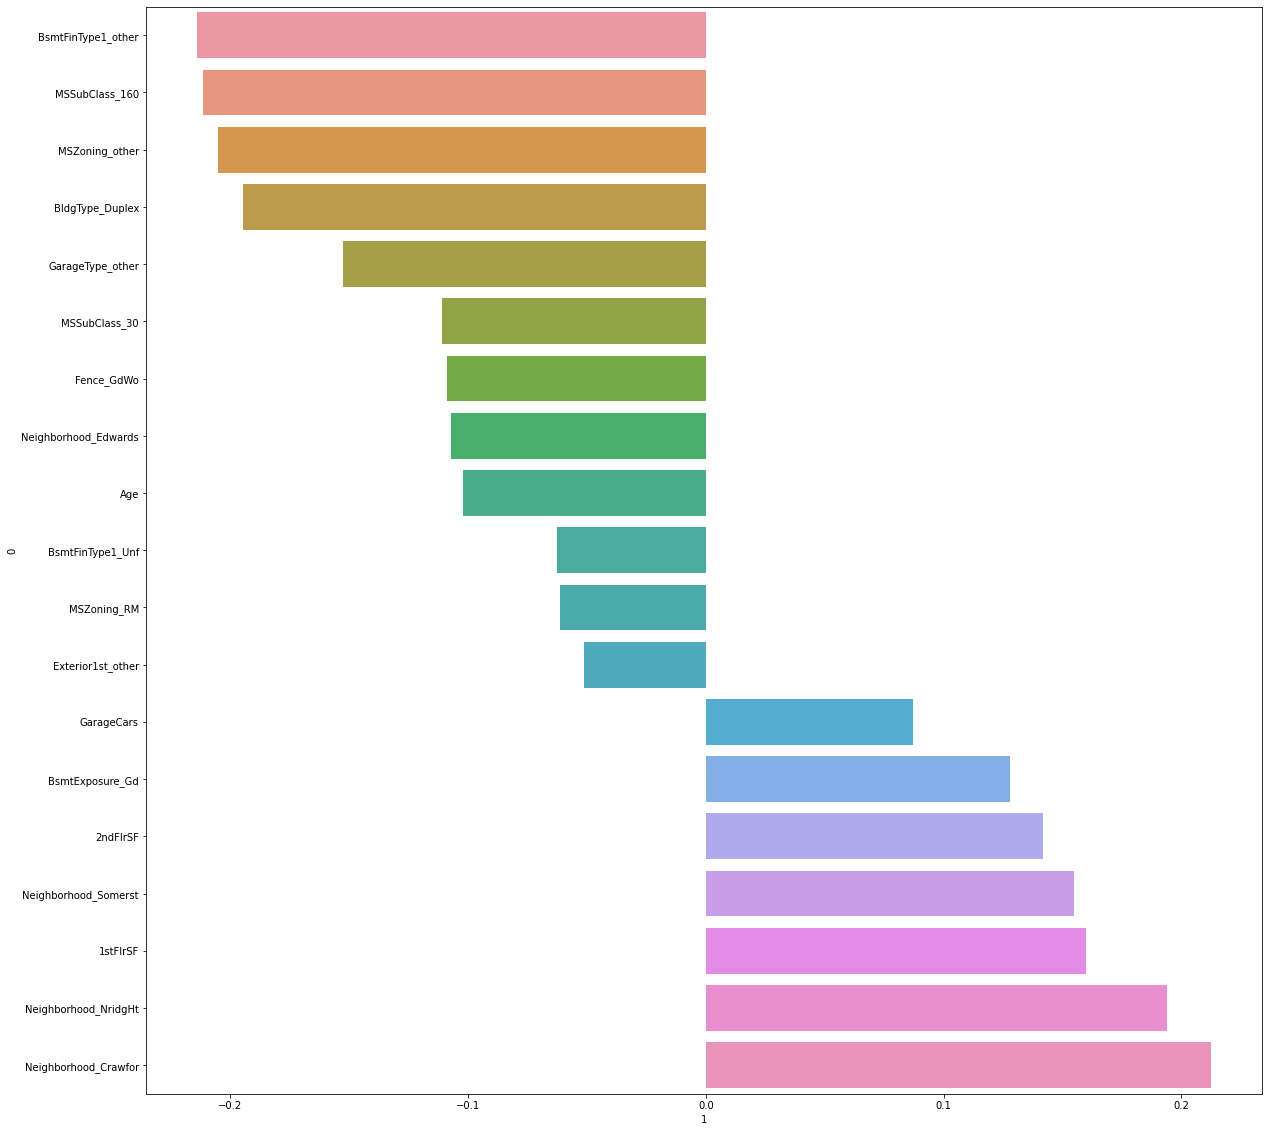

In [236]:
temp=[]
for col,val in zip(imp_cols,reg.coef_):
    temp.append([col,val])
feature_importance=(sorted(temp,key=lambda x: x[1]))
feature_importance=pd.DataFrame(feature_importance)
plt.figure(figsize=(20,20))
sns.barplot(x=feature_importance[1],y=feature_importance[0])

# Final model


In [238]:
# Building simple Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error


ridge_reg=Ridge(alpha=1.05)
ridge_reg.fit(X_train,y_train)

print(' r sqaured score on training set:',r2_score(y_train, ridge_reg.predict(X_train)))
print(' r sqaured score on test set:',r2_score(y_test, ridge_reg.predict(X_test)))

 r sqaured score on training set: 0.835138392713896
 r sqaured score on test set: 0.823292006072371


## Residual analysis of final model

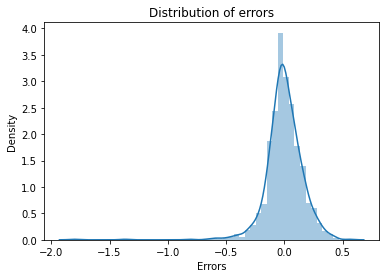

In [245]:
sns.distplot(y_train-ridge_reg.predict(X_train))
plt.xlabel('Errors')
plt.title('Distribution of errors')
plt.show()

> Observation

It can be seen that the error terms are normally distributed around 0

<AxesSubplot:xlabel='1', ylabel='0'>

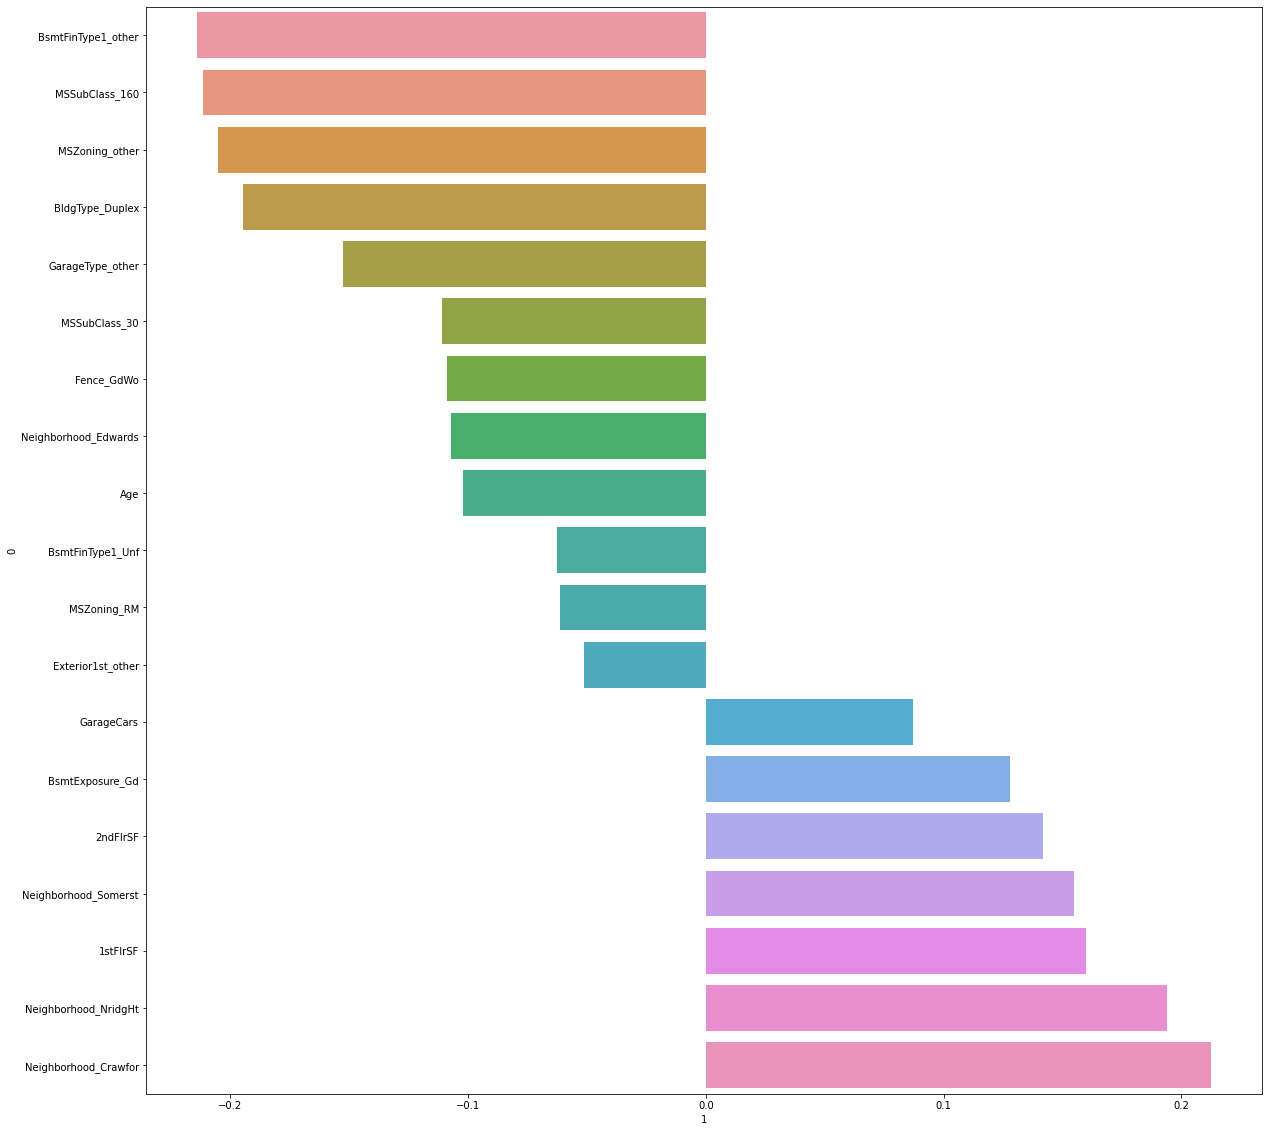

In [239]:
temp=[]
for col,val in zip(imp_cols,reg.coef_):
    temp.append([col,val])
feature_importance=(sorted(temp,key=lambda x: x[1]))
feature_importance=pd.DataFrame(feature_importance)
plt.figure(figsize=(20,20))
sns.barplot(x=feature_importance[1],y=feature_importance[0])

In [240]:
feature_importance_df.iloc[:,0]

0      Exterior1st_HdBoard
1                      Age
2           MSSubClass_160
3     Neighborhood_NridgHt
4      Exterior1st_MetalSd
5               GarageCars
6      Exterior1st_Plywood
7           MSZoning_other
8                 2ndFlrSF
9      Exterior1st_CemntBd
10           MSSubClass_30
11    Neighborhood_Somerst
12                1stFlrSF
13         BldgType_Duplex
14               YearBuilt
15    Neighborhood_Edwards
16             OverallQual
17    Neighborhood_Crawfor
18             MSZoning_RM
Name: 0, dtype: object

> Final observation

The final score is 0.824 on the test score when we use a ridge model with alpha being 1.05

The top variables are given below